## <a name="table">Table of Contents</a> 

1. [Pre-Process Data](#PreProcess)  

2. [Use Case A: Clustering of Electric Vehicle Data to find Data for Spontaneous Shopers](#UseCaseA)  
    2.1 [Feature Selection](#UseCaseAFeatureSelection) <br />
    2.2 [Clusters Understanding](#UseCaseAClusterUnderstanding) <br />
    2.3 [Silhoutte Results](#UseCaseASilhoutteResults) <br />
    2.4 [Visualization of clusters for use case A](#UseCaseAVisualization)<br />
    2.5 [Experiment: Time To Load Cluster Visualizations](#UseCaseATimeExperiment)<br />
     
     
3. [Use Case B: Clustering of Electric Vehicle Data to find Data for Methodical Shopers](#UseCaseB)  
    3.1 [Feature Selection](#UseCaseBFeatureSelection)<br />
    3.2 [Clusters Understanding](#UseCaseBClusterUnderstanding)<br />
    3.3 [Silhoutte Results](#UseCaseBSilhoutteResults)<br />
    3.4 [Visualization of clusters for use case B](#UseCaseBVisualization)<br />
    3.5 [Experiment: Time To Load Cluster Visualizations](#UseCaseBTimeExperiment)<br />
    

4. [Use Case C: Clustering of Electric Vehicle Data to find Data for Users with disabilities etc..](#UseCaseC)  
    4.1 [Feature Selection](#UseCaseCFeatureSelection)<br />
    4.2 [Clusters Understanding](#UseCaseCClusterUnderstanding)<br />
    4.3 [Silhoutte Results](#UseCaseCSilhoutteResults)<br />
    4.4 [Visualization of clusters for use case C](#UseCaseCVisualization)<br />
    4.5 [Experiment: Time To Load Cluster Visualizations](#UseCaseCTimeExperiment)<br />


5. [Use Case D: Clustering of Electric Vehicle Data for Automobile Owner and Manufacturer to find Data for specific electronic equipment](#UseCaseD)  
    5.1 [Feature Selection](#UseCaseDFeatureSelection)<br />
    5.2 [Clusters Understanding](#UseCaseDClusterUnderstanding)<br />
    5.3 [Silhoutte Results](#UseCaseDSilhoutteResults)<br />
    5.4 [Visualization of clusters for use case D](#UseCaseDVisualization)<br />
    5.5 [Experiment: Time To Load Cluster Visualizations](#UseCaseDTimeExperiment)<br />

    
    
    
6. [Use Case E: : Clustering of Electric Vehicle Data for Automobile Manufacturers to find vehicles manufacturered in the same country](#UseCaseE)  
    6.1 [Feature Selection](#UseCaseEFeatureSelection)<br />
    6.2 [Clusters Understanding](#UseCaseEClusterUnderstanding)<br />
    6.3 [Silhoutte Results](#UseCaseESilhoutteResults)<br />
    6.4 [Visualization of clusters for use case E](#UseCaseEVisualization)<br />
    6.5 [Experiment: Time To Load Cluster Visualizations](#UseCaseETimeExperiment)<br />



## <a name="PreProcess"> 1. Pre-Processing Data</a>

In [1]:
# Import packages for clustering, processing data, dimensionality management and visualizing.
import seaborn as sns
import re
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation
from matplotlib.pyplot import figure
from pyclustertend import hopkins
from scipy import stats

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
from sklearn.tree import _tree, DecisionTreeClassifier

from sklearn.cluster import KMeans, DBSCAN
from sklearn import preprocessing
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics.pairwise import euclidean_distances


from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import folium

import io
import sys

import folium

from PyQt5 import QtCore, QtGui, QtWidgets
from PyQt5.QtWebEngineWidgets import QWebEngineView 
from PyQt5.QtWebEngineWidgets import QWebEngineSettings as QWebSettings
from folium import IFrame


import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import collections, numpy
from matplotlib import animation
from pyclustertend import hopkins
from scipy import stats

import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

from sklearn.cluster import KMeans, DBSCAN
from sklearn import preprocessing
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics.pairwise import euclidean_distances


from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import folium





In [2]:
from numpy import array
from numpy import argmax
import ast

electrical_cars_df = pd.read_excel("electronic_vehicles_final.xlsx", sheet_name="Sheet1")

def getFinalPartOfLink(x):
    regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
    
    if isinstance(x, str):
        #print("isinstance of string ...")
        url = re.findall(regex,x)

        lst_of_links = [x[0] for x in url]
        if len(lst_of_links) != 0:
            for lnks in lst_of_links:
                #print("lnks is: ",lnks.rsplit('/', 1)[-1])
                return lnks.rsplit('/', 1)[-1]
        else:
            return x
    else:
        return ""

def check_if_float(x_str):
    try:
        float(x_str)
        return True

    except ValueError:
        return False
    
def findEmptyLists(x):
    if x == [""]:
        return np.nan
    else:
        return x
    
def getElectricRangeValue(x):
    x = x.replace("\n", "")
    x = ast.literal_eval(x)
    if len(x) == 1 and check_if_float(x[0]) == True:
        if float(x[0]) < 2000.0:
            return float(x[0])   
        else:
            return None
    else:
        return None
    
def check_if_int(x_str):
    try:
        int(x_str)
        return True

    except ValueError:
        return False
    
def getYearValue(x):
    x = x.replace("\n", "")
    x = ast.literal_eval(x)
    if len(x) == 1 and check_if_int(x[0]) == True:
        if int(x[0]) > 1900:
            return int(x[0])   
        else:
            return None
    else:
        return None
            
            
def convertMilesToKms(x):
    return x / 0.62137  
            
    
def getMotor(x):
    if isinstance(x, str):
        if 'synchronous' in x or 'Synchronous'in x:
            return "Synchronous_motor" 
        else:
            return x
    else:
        return x

def getCountry(x):
    if isinstance(x, str):
        if 'U.S.' in x:
            return "United_States" 
        else:
            return x
    else:
        return x

def getBodyStyles(x):
    #Retrieve only end of link for dbpedia properties included
    x = ast.literal_eval(x)
    i = 0
    for els in x:
        #print("els is: ",els)
        regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
        url = re.findall(regex,els)      
        lst_of_links = [x[0] for x in url]
        if lst_of_links != 0:
            for lnks in lst_of_links:
                #print("lnks is: ",lnks.rsplit('/', 1)[-1])
                x[i] = lnks.rsplit('/', 1)[-1]
        #print("x is: ",x)
        i += 1
    return x

def removeSpecialCharacters(x):
    x = x.strip()
    x = x.replace("\n", "")
    x = x.replace("* ", '","')
    x = x.replace("_", " ")
    x = x.replace('"",', '')
    x = x.replace('Mainland ','')
    x = x.replace('mainland ','')
    
    #print("x is: ",x)

    return x


def getCountriesExcluded(x):
    areasServed = ["Canada","Mexico","North Korea","United States","South Korea",'China',"East Asia","Europe","Indonesia","Egypt","Israel","South Africa","North America","Hong Kong","Iran"]
    returned_areas = []
    if x == ["Worldwide"]:
        returned_areas = areasServed
    elif "Worldwide, except" in x:
        for countries in areasServed:
            if countries not in x:
                returned_areas.append(countries) 
    elif len(x)==1 and "except" in x[0]:
        string_x = x[0].replace('Worldwide, except ','')
        string_x = string_x.replace('and ','')
        string_x = string_x.replace(', ','", "')
        string_x = '["' + string_x + '"]'
        lst = ast.literal_eval(string_x)
        for countries in areasServed:
            if countries not in lst:
                returned_areas.append(countries)
    elif "Worldwide" in x[0]:
        returned_areas = areasServed
    elif "Europe" in x[0]:
        returned_areas = ["Europe"]            
    else:
        returned_areas = x
    return returned_areas

def findTransmissionTypes(x):
    #Retrieve only end of link for dbpedia properties included
    x = ast.literal_eval(x)
    new_lst = []
    i = 0
    foundContinuous = False
    foundAutomatic = False
    for els in x:
        if foundContinuous == False and "Continuous" in els:
            foundContinuous = True
            x.append("Continuously_variable_transmission")
        
        if foundAutomatic == False and ("Automatic" in els or "automatic" in els) :
            foundAutomatic = True
            x.append("Automatic")
    return x

def findEngineStyles(x):
    if "Petrol:" in x:
        x.append("Petrol_engine")
    if "Diesel:" in x:
        x.append("Diesel_engine")
    return x

def removeIncorrectHeights(x):
    if x < 1:
        return None
    else:
        return x

def removeIncorrectWidth(x):
    if x < 1:
        return None
    else:
        return x

def removeIncorrectLength(x):
    if x < 1:
        return None
    else:
        return x
    
def removeIncorrectWheelbase(x):
    if x < 1:
        return None
    else:
        return x
    
def getCoordinate(x):
    x = ast.literal_eval(x)
    return x[0]

def addColumnsForHeight(electrical_cars_df):
    """

    Processing the Height field

    """
    electrical_cars_df['Height'] = electrical_cars_df['Height'].apply(removeIncorrectHeights)
    electrical_cars_df = electrical_cars_df[pd.to_numeric(electrical_cars_df['Height'], errors='coerce').notnull()]
    return electrical_cars_df
    
def addColumnsForWidth(electrical_cars_df):
    """

    Processing the Width field

    """
    electrical_cars_df['Width'] = electrical_cars_df['Width'].apply(removeIncorrectWidth)
    electrical_cars_df = electrical_cars_df[pd.to_numeric(electrical_cars_df['Width'], errors='coerce').notnull()]
    return electrical_cars_df
    
def addColumnsForWheelbase(electrical_cars_df):
    """

    Processing the Width field

    """
    electrical_cars_df['Wheelbase'] = electrical_cars_df['Wheelbase'].apply(removeIncorrectWheelbase)
    electrical_cars_df = electrical_cars_df[pd.to_numeric(electrical_cars_df['Wheelbase'], errors='coerce').notnull()]
    return electrical_cars_df
    
def addColumnsForLength(electrical_cars_df):
    """

    Processing the Width field

    """
    electrical_cars_df['Length'] = electrical_cars_df['Length'].apply(removeIncorrectLength)
    electrical_cars_df = electrical_cars_df[pd.to_numeric(electrical_cars_df['Length'], errors='coerce').notnull()]
    return electrical_cars_df
    
def addColumnsForBodyStyle(electrical_cars_df):
    """

    Processing the bodyStyle field

    """
    bodyStyles = ["2","3","4","5",'Van','Electric Mobile Chair','Station_wagon']
    electrical_cars_df["Body Style"] = electrical_cars_df["Body Style"].apply(getBodyStyles)
    dataset_column_length = len(electrical_cars_df.columns)
    bodyStyleIndex = []
    for i in range(len(bodyStyles)):
        bodyStyleIndex.append((i+1,bodyStyles[i]))
    #One-Hot Encoding
    for style in bodyStyles:
        electrical_cars_df["BodyStyle_"+style]=electrical_cars_df["Body Style"].map(lambda x: style in x)
    electrical_cars_df.iloc[:,dataset_column_length:] = electrical_cars_df.iloc[:,dataset_column_length:].astype(int)
    electrical_cars_df = electrical_cars_df.drop('Body Style', 1)
    return electrical_cars_df

def addColumnsForAreasServed(electrical_cars_df):
    """

    Processing the AreaServed field

    """
    dataset_column_length = len(electrical_cars_df.columns)
    areasServed = ["Canada","Mexico","North Korea","United States","South Korea",'China',"East Asia","Europe","Indonesia","Egypt","Israel","South Africa","North America","Hong Kong","Iran"]
    dct_of_areas = {'North America':["Canada","United States"], 'East Asia':["North Korea","South Korea"],'Middle East' :[]}
    electrical_cars_df["Area Served"] = electrical_cars_df["Area Served"].apply(removeSpecialCharacters)
    electrical_cars_df["Area Served"] = electrical_cars_df["Area Served"].apply(getBodyStyles)
    electrical_cars_df["Area Served"] = electrical_cars_df["Area Served"].apply(getCountriesExcluded)
    electrical_cars_df["Area Served"] = electrical_cars_df["Area Served"].apply(findEmptyLists)
    electrical_cars_df = electrical_cars_df.dropna(subset=['Area Served'])
    areaServedIndex = []
    for i in range(len(areasServed)):
        areaServedIndex.append((i+1,areasServed[i]))
    #One-Hot Encoding
    for area in areasServed:
        electrical_cars_df["AreaServed_"+area]=electrical_cars_df["Area Served"].map(lambda x: area in x)
    electrical_cars_df.iloc[:,dataset_column_length:] = electrical_cars_df.iloc[:,dataset_column_length:].astype(int)
    electrical_cars_df = electrical_cars_df.drop('Area Served', 1)
    return electrical_cars_df

def addColumnsForEngines(electrical_cars_df):
    """

    Processing the Engines field

    """
    dataset_column_length = len(electrical_cars_df.columns)
    engines = ["0.8","0.9","1","1.1","1.2","1.3","1.4","1.5","1.6","1.7","1.8","1.9","2","2.2","2.3","2.4","2.5","2.7","2.8","2.9","3","3.2","3.3","3.5","3.7","4","4.1","4.5","4.2","4.3","4.6","4.7","4.8","5.3","5.7","6","6.2","6.6","7.2","9","40","55","61.34","78","1108","704","899","903","Electric_motor","Diesel_engine","Petrol_engine"]
    electrical_cars_df["Engine"] = electrical_cars_df["Engine"].apply(getBodyStyles)
    electrical_cars_df["Engine"] = electrical_cars_df["Engine"].apply(findEngineStyles)
    engineStyleIndex = []
    for i in range(len(engines)):
        engineStyleIndex.append((i+1,engines[i]))
    #One-Hot Encoding
    for engine in engines:
        electrical_cars_df["EngineStyle_"+engine]=electrical_cars_df["Engine"].map(lambda x: engine in x)
    electrical_cars_df.iloc[:,dataset_column_length:] = electrical_cars_df.iloc[:,dataset_column_length:].astype(int)
    electrical_cars_df = electrical_cars_df.drop('Engine', 1)
    return electrical_cars_df

def addColumnsForDrivetrain(electrical_cars_df):
    """

    Processing the Drivetrain field

    """
    dataset_column_length = len(electrical_cars_df.columns)
    drivetrains = ["Hybrid_vehicle_drivetrain"]
    electrical_cars_df["Drivetrain"] = electrical_cars_df["Drivetrain"].apply(getFinalPartOfLink)
    drivetrainsIndex = []
    for i in range(len(drivetrains)):
        drivetrainsIndex.append((i+1,drivetrains[i]))
    #One-Hot Encoding
    for drivetrain in drivetrains:
        electrical_cars_df["Drivetrain_"+ drivetrain]=electrical_cars_df["Drivetrain"].map(lambda x: drivetrain == x)
    electrical_cars_df.iloc[:,dataset_column_length:] = electrical_cars_df.iloc[:,dataset_column_length:].astype(int)
    electrical_cars_df = electrical_cars_df.drop('Drivetrain', 1)
    return electrical_cars_df
 
def addColumnsForDoors(electrical_cars_df):
    """

    Processing the Doors field

    """
    dataset_column_length = len(electrical_cars_df.columns)
    doors = ["Butterfly_doors","Vehicle_canopy","Scissor_doors","Suicide_door","Gull-wing_door"]
    electrical_cars_df["Doors"] = electrical_cars_df["Doors"].apply(getFinalPartOfLink)
    doorsIndex = []
    for i in range(len(doors)):
        doorsIndex.append((i+1,doors[i]))
    #One-Hot Encoding
    for door in doors:
        electrical_cars_df["Doors_"+ door]=electrical_cars_df["Doors"].map(lambda x: door == x)
    electrical_cars_df.iloc[:,dataset_column_length:] = electrical_cars_df.iloc[:,dataset_column_length:].astype(int)
    dataset_column_length = len(electrical_cars_df.columns)
    electrical_cars_df = electrical_cars_df.drop('Doors', 1)
    return electrical_cars_df

def addColumnsForMotors(electrical_cars_df):
    """

    Processing the Motor field

    """
    dataset_column_length = len(electrical_cars_df.columns)
    motors = ["Synchronous_motor"]
    electrical_cars_df["Motor"] = electrical_cars_df["Motor"].apply(getFinalPartOfLink)
    electrical_cars_df["Motor"] = electrical_cars_df["Motor"].apply(getMotor)
    motorsIndex = []
    for i in range(len(motors)):
        motorsIndex.append((i+1,motors[i]))
    #One-Hot Encoding
    for motor in motors:
        electrical_cars_df["Motor_"+ str(motor)]=electrical_cars_df["Motor"].map(lambda x: motor == x)
    electrical_cars_df.iloc[:,dataset_column_length:] = electrical_cars_df.iloc[:,dataset_column_length:].astype(int)
    electrical_cars_df = electrical_cars_df.drop('Motor', 1)
    return electrical_cars_df

def addColumnsForTransmission(electrical_cars_df):
    """

    Processing the Transmission Type

    """
    dataset_column_length = len(electrical_cars_df.columns)
    transmissions = ["1","2","3","4","5","6","7","8","10","Automatic","Continuously_variable_transmission"]
    electrical_cars_df["Transmission Type"] = electrical_cars_df["Transmission Type"].apply(findTransmissionTypes)
    electrical_cars_df["Transmission Type"] = electrical_cars_df["Transmission Type"].apply(findEmptyLists)
    electrical_cars_df = electrical_cars_df.dropna(subset=['Transmission Type'])
    transmissionStyleIndex = []
    for i in range(len(transmissions)):
        transmissionStyleIndex.append((i+1,transmissions[i]))
    #One-Hot Encoding
    for transmission in transmissions:
        electrical_cars_df["Transmission_"+transmission]=electrical_cars_df["Transmission Type"].map(lambda x: transmission in x)
    electrical_cars_df.iloc[:,dataset_column_length:] = electrical_cars_df.iloc[:,dataset_column_length:].astype(int)
    electrical_cars_df = electrical_cars_df.drop('Transmission Type', 1)
    return electrical_cars_df



def addColumnsForElectricRanges(electrical_cars_df):
    """

    Processing the Electric Ranges

    """
    dataset_column_length = len(electrical_cars_df.columns)
    electrical_cars_df["Electric Range"] = electrical_cars_df["Electric Range"].apply(getElectricRangeValue)
    gtzero = electrical_cars_df[electrical_cars_df['Name'] == 'Italdesign GTZERO']
    if len(gtzero) > 0:
        index_gtzero = electrical_cars_df[electrical_cars_df['Name'] == 'Italdesign GTZERO'].index[0]
        electrical_cars_df.at[index_gtzero,'Electric Range']= convertMilesToKms(gtzero["Electric Range"])

    audi = electrical_cars_df[electrical_cars_df['Name'] == 'Audi AI:RACE']
    if len(audi) > 0:
        index_audi = electrical_cars_df[electrical_cars_df['Name'] == 'Audi AI:RACE'].index[0]
        electrical_cars_df.at[index_audi,'Electric Range']= convertMilesToKms(audi["Electric Range"])
    electrical_cars_df = electrical_cars_df[pd.to_numeric(electrical_cars_df['Electric Range'], errors='coerce').notnull()]
    return electrical_cars_df

def addColumnsForLayout(electrical_cars_df):
    """

    Processing the bodyStyle field

    """
    dataset_column_length = len(electrical_cars_df.columns)
    layouts = ["Mid-engine,_four-wheel-drive_layout","Individual-wheel_drive","Front-engine,_front-wheel-drive_layout","Rear-engine_design","Longitudinal_engine","Rear-wheel_drive","Mid-engine_design","Four-wheel_drive","Front-engine,_rear-wheel-drive_layout","Front-wheel_drive",'All-wheel_drive','Rear-engine,_rear-wheel-drive_layout','Front-engine,_four-wheel-drive_layout',"Rear_mid-engine,_rear-wheel-drive_layout"]
    electrical_cars_df["Layout"] = electrical_cars_df["Layout"].apply(getBodyStyles)
    electrical_cars_df["Layout"] = electrical_cars_df["Layout"].apply(findEmptyLists)
    electrical_cars_df = electrical_cars_df.dropna(subset=['Layout'])
    layoutIndex = []
    for i in range(len(layouts)):
        layoutIndex.append((i+1,layouts[i]))
    #One-Hot Encoding
    for layout in layouts:
        electrical_cars_df["Layout_"+layout]=electrical_cars_df["Layout"].map(lambda x: layout in x)
    electrical_cars_df.iloc[:,dataset_column_length:] = electrical_cars_df.iloc[:,dataset_column_length:].astype(int)
    electrical_cars_df = electrical_cars_df.drop('Layout', 1)
    return electrical_cars_df

def addColumnsForStartYear(electrical_cars_df):
    """

    Production Start Year

    """
    electrical_cars_df["Production Start Year"] = electrical_cars_df["Production Start Year"].apply(getYearValue)
    electrical_cars_df = electrical_cars_df[pd.to_numeric(electrical_cars_df['Production Start Year'], errors='coerce').notnull()]
    return electrical_cars_df
    
def addColumnsForEndYear(electrical_cars_df):
    """

    Production End Year

    """
    electrical_cars_df["Production End Year"] = electrical_cars_df["Production End Year"].apply(getYearValue)
    electrical_cars_df = electrical_cars_df[pd.to_numeric(electrical_cars_df['Production End Year'], errors='coerce').notnull()]
    return electrical_cars_df

def addColumnsForLocationCountry(electrical_cars_df):
    """

    Processing the Motor field

    """
    dataset_column_length = len(electrical_cars_df.columns)

    locationCountries = ["China","South Korea","Germany","Japan","United Kingdom","United_States","Italy","Sweden","France","Czech Republic"]
    electrical_cars_df["Location Country"] = electrical_cars_df["Location Country"].apply(getFinalPartOfLink)
    electrical_cars_df["Location Country"] = electrical_cars_df["Location Country"].apply(getCountry)
    locationCountriesIndex = []
    for i in range(len(locationCountries)):
        locationCountriesIndex.append((i+1,locationCountries[i]))

    #One-Hot Encoding
    for locationCountry in locationCountries:
        electrical_cars_df["LocationCountry_"+ str(locationCountry)]=electrical_cars_df["Location Country"].map(lambda x: locationCountry == x)

    electrical_cars_df.iloc[:,dataset_column_length:] = electrical_cars_df.iloc[:,dataset_column_length:].astype(int)
    electrical_cars_df = electrical_cars_df.drop('Location Country', 1)
    return electrical_cars_df

electrical_cars_df = pd.read_excel("electronic_vehicles_final.xlsx", sheet_name="Sheet1")

def edit_data_frame_with_columns(lst_of_features,electrical_cars_df):
    electrical_cars_df = electrical_cars_df.drop('Charging', 1)
    electrical_cars_df = electrical_cars_df.drop('Manufacturer', 1)
    electrical_cars_df = electrical_cars_df.drop('Type of car', 1)
    electrical_cars_df = electrical_cars_df.drop('In Production Since',1)
    
    if 'Latitude' in lst_of_features:
        electrical_cars_df["Latitude"] = electrical_cars_df["Latitude"].apply(getCoordinate)
    else:
        electrical_cars_df = electrical_cars_df.drop('Latitude', 1)
        
    if 'Longitude' in lst_of_features:
        electrical_cars_df["Longitude"] = electrical_cars_df["Longitude"].apply(getCoordinate)
    else:
        electrical_cars_df = electrical_cars_df.drop('Longitude', 1)
    
    if 'Height' in lst_of_features:
        electrical_cars_df = addColumnsForHeight(electrical_cars_df)
    else:
        electrical_cars_df = electrical_cars_df.drop('Height', 1)

    if 'Width' in lst_of_features:  
        electrical_cars_df = addColumnsForWidth(electrical_cars_df)
    else:
        electrical_cars_df = electrical_cars_df.drop('Width', 1)
    
    if 'Length' in lst_of_features:  
        electrical_cars_df = addColumnsForLength(electrical_cars_df)
    else:    
        electrical_cars_df = electrical_cars_df.drop('Length', 1)

    
    if 'Wheelbase' in lst_of_features:
        electrical_cars_df = addColumnsForWheelbase(electrical_cars_df)
    
    else:   
        electrical_cars_df = electrical_cars_df.drop('Wheelbase', 1) 

    if 'Location Country' in lst_of_features:
        electrical_cars_df = addColumnsForLocationCountry(electrical_cars_df)
    
    else:   
        electrical_cars_df = electrical_cars_df.drop('Location Country',1)

    if 'Layout' in lst_of_features:
        electrical_cars_df = addColumnsForLayout(electrical_cars_df) 

    else:   
        electrical_cars_df = electrical_cars_df.drop('Layout', 1) 
        
    if 'Body Style' in lst_of_features:
        electrical_cars_df = addColumnsForBodyStyle(electrical_cars_df) 
    else:   
        electrical_cars_df = electrical_cars_df.drop('Body Style', 1)

    if 'Area Served' in lst_of_features:
        electrical_cars_df = addColumnsForAreasServed(electrical_cars_df) 
    else:   
        electrical_cars_df = electrical_cars_df.drop('Area Served', 1) 
    
    if 'Engine' in lst_of_features:
        electrical_cars_df = addColumnsForEngines(electrical_cars_df) 

    else:   
        electrical_cars_df = electrical_cars_df.drop('Engine', 1)
        
    if 'Drivetrain' in lst_of_features:
        electrical_cars_df = addColumnsForDrivetrain(electrical_cars_df) 

    else:   
        electrical_cars_df = electrical_cars_df.drop('Drivetrain', 1) 
        
    if 'Doors' in lst_of_features:
        electrical_cars_df = addColumnsForDoors(electrical_cars_df) 

    else:   
        electrical_cars_df = electrical_cars_df.drop('Doors', 1) 
        
    if 'Motor' in lst_of_features:
        electrical_cars_df = addColumnsForMotors(electrical_cars_df) 
    else:   
        electrical_cars_df = electrical_cars_df.drop('Motor', 1)

    if 'Transmission Type' in lst_of_features:
        electrical_cars_df = addColumnsForTransmission(electrical_cars_df) 
    else:   
        electrical_cars_df = electrical_cars_df.drop('Transmission Type', 1)

    if 'Electric Range' in lst_of_features:
        electrical_cars_df = addColumnsForElectricRanges(electrical_cars_df) 
    else:   
        electrical_cars_df = electrical_cars_df.drop('Electric Range', 1) 
        
    if 'Production Start Year' in lst_of_features:
        electrical_cars_df = addColumnsForStartYear(electrical_cars_df) 
    else:   
        electrical_cars_df = electrical_cars_df.drop('Production Start Year', 1) 
        
    if 'Production End Year' in lst_of_features:
        electrical_cars_df = addColumnsForEndYear(electrical_cars_df)  

    else:
        electrical_cars_df = electrical_cars_df.drop('Production End Year', 1)
        
    if 'Name' not in lst_of_features:
        electrical_cars_df = electrical_cars_df.drop('Name', 1)
    
    for column in  electrical_cars_df:
        true_value_per_column = electrical_cars_df.loc[(electrical_cars_df[column] == 0.0)]
        if len(true_value_per_column)+1 >= len(electrical_cars_df):
            electrical_cars_df = electrical_cars_df.drop(column, 1)
            #print("Deleting column: ",column)
    return electrical_cars_df

def find_largest_silhoutte_score_for_features(lst_of_features,electrical_cars_df,contains_categorical_variables):
    electrical_cars_df = edit_data_frame_with_columns(lst_of_features,electrical_cars_df)
    scaler = MinMaxScaler()
    data_scaled = pd.DataFrame(scaler.fit_transform(electrical_cars_df), columns=electrical_cars_df.columns)
    data_scaled.head()
    distance_metric = 'euclidean'
    linkage_types = ['ward','average','complete','single']
    if contains_categorical_variables == True:
        distance_metric = 'cosine'
        linkage_types = ['average','complete','single']
    
    linkage_types = ['ward','average','complete','single']
    max_clusters = 0
    if len(electrical_cars_df.index) > 17:
        max_clusters = 17
    else:
        max_clusters = int(len(electrical_cars_df.index)/2)
    silhoutte_scores = []
    for link in linkage_types:
        for i in range(2,max_clusters):
            cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage=link) 
            model = cluster.fit_predict(data_scaled)
            hierarchical_clustering = pd.DataFrame(model)
            silhoutte_scores.append((link,i,silhouette_score(data_scaled,hierarchical_clustering[0],metric='euclidean')))  
    silhoutte_scores.sort(key=lambda x:x[2]) #Order elements by the Silhoutte Score
    return silhoutte_scores[-1]

lst_of_features = ['Height', 'Width','Length','Wheelbase','Location Country','Layout','Area Served','Body Style','Engine','Drivetrain','Doors','Motor','Transmission Type','Electric Range','Production Start Year','Production End Year']

def find_best_features(lst,num_features,electrical_cars_df,contains_categorical):
    largest_element = None
    cars_df = electrical_cars_df.copy()
    i = 0
    current_elements = []
    optimal_num_cluster = 0
    optimal_link_type = ""
    while i < num_features:
        max_shil_score = 0
        largest_element = 0
        for items in lst:
            test_cars_df = cars_df.copy()
            new_lst = current_elements + [items]
            link, num_clusters ,score = find_largest_silhoutte_score_for_features(new_lst,test_cars_df,contains_categorical)
            if score > max_shil_score:
                largest_element = items
                max_shil_score = score
                optimal_num_cluster = num_clusters
                optimal_link_type = link 
        current_elements.append(largest_element)
        lst.remove(largest_element)
        i += 1
    return ((current_elements,optimal_link_type, optimal_num_cluster,max_shil_score))




<Figure size 2160x720 with 0 Axes>

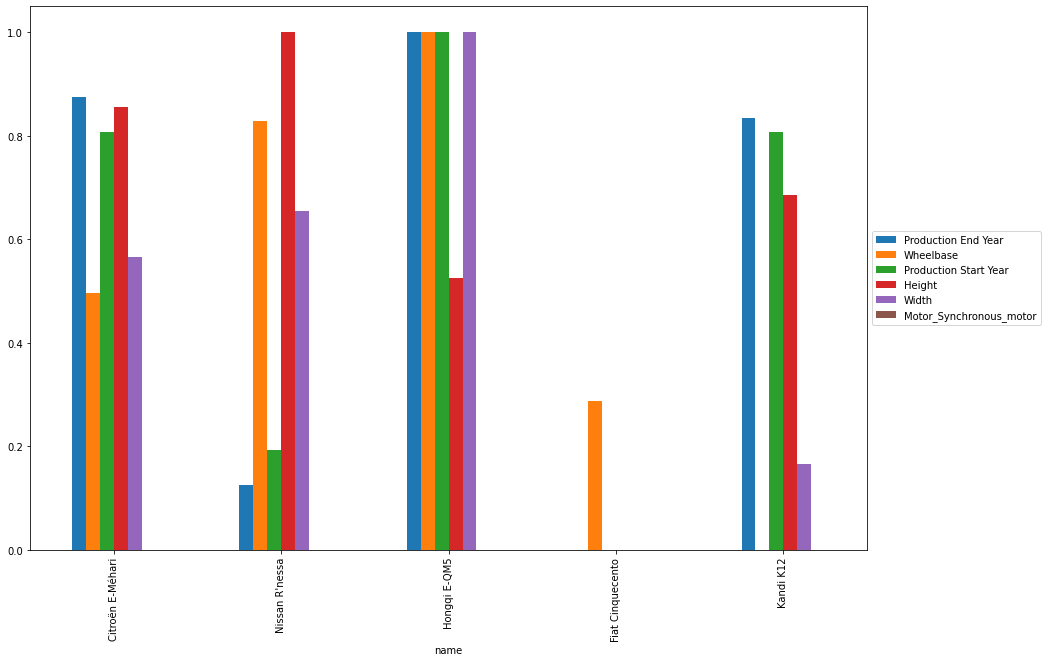

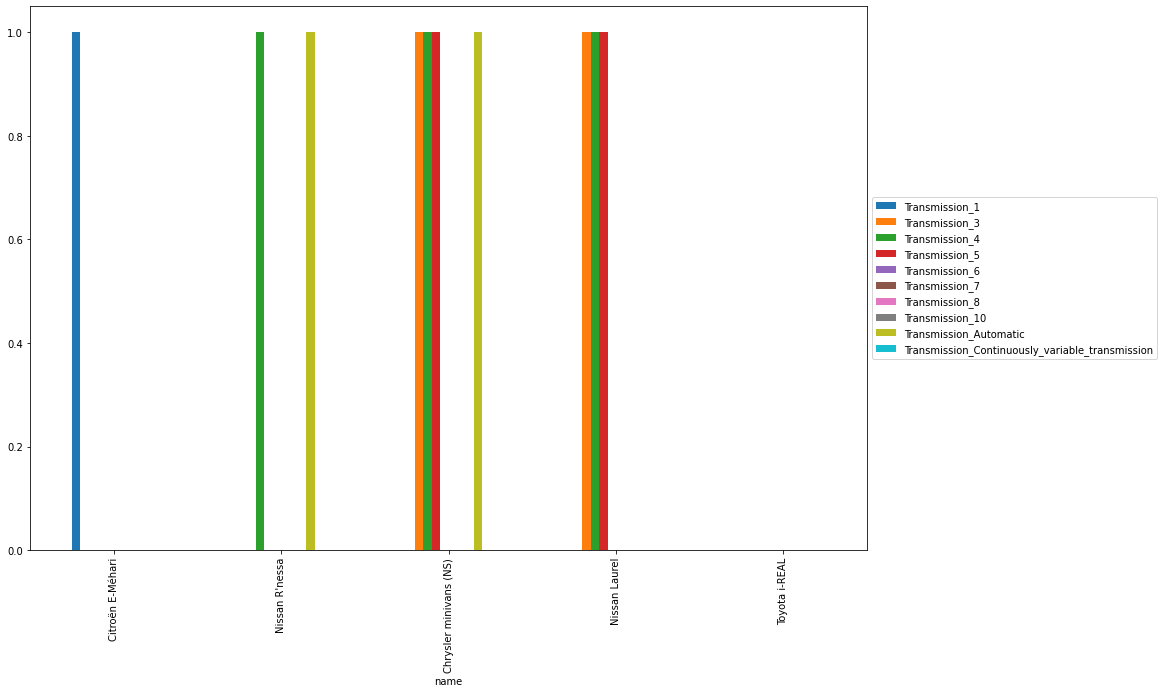

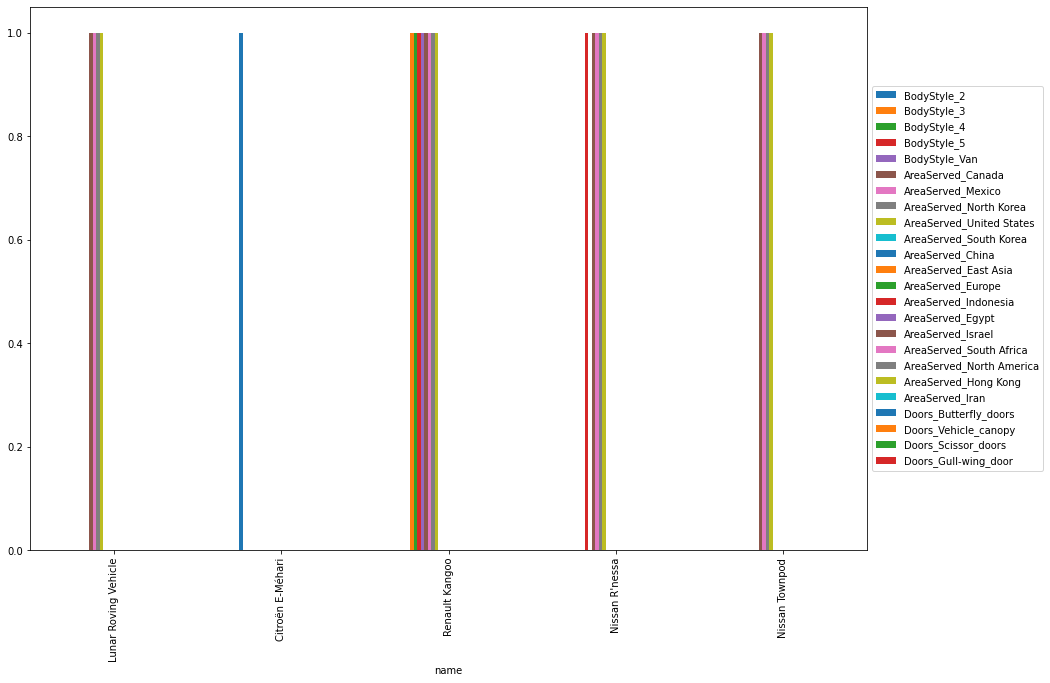

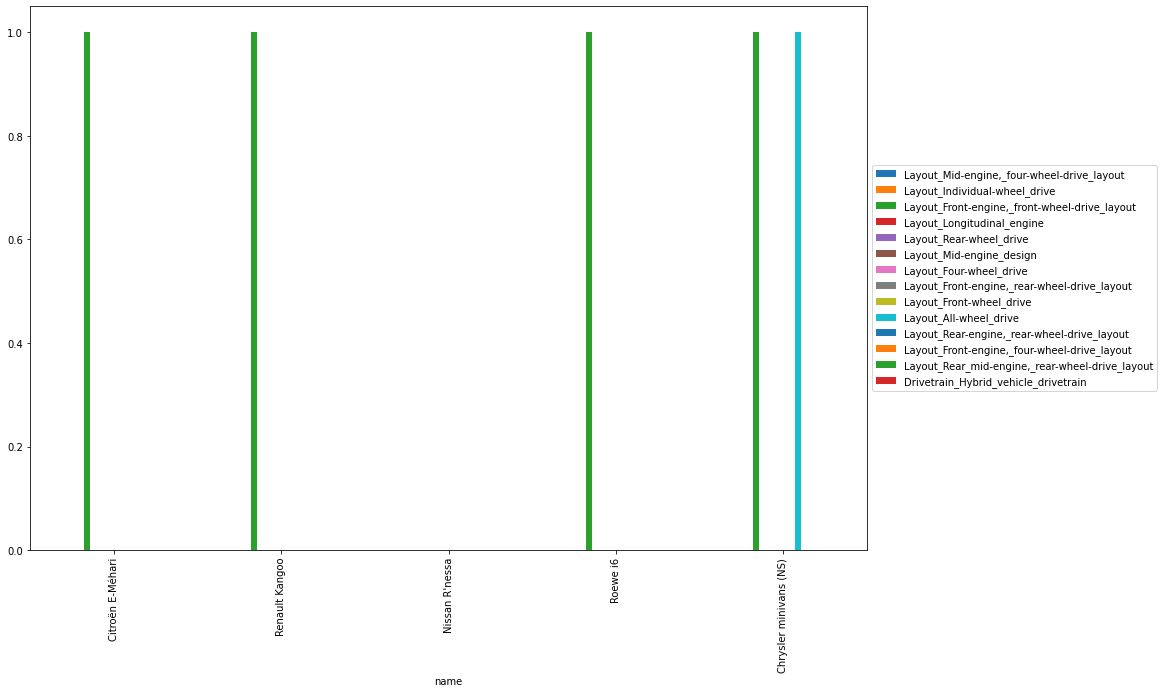

In [3]:
electrical_cars_df = pd.read_excel("electronic_vehicles_final.xlsx", sheet_name="Sheet1")
electrical_cars_df_copy = electrical_cars_df.copy()
rows = 2
columns = 2
figure = plt.figure(figsize=(30, 10))  
scaler = MinMaxScaler()
electric_car_id = electrical_cars_df_copy.iloc[0:10,0]
electrical_cars_df = pd.read_excel("electronic_vehicles_final.xlsx", sheet_name="Sheet1")
electrical_cars_df = edit_data_frame_with_columns(['Name','Motor', 'Width', 'Height','Production End Year','Wheelbase','Production Start Year',],electrical_cars_df).iloc[0:10,:]
car_names = electrical_cars_df['Name'].iloc[0:5]
columns = electrical_cars_df.iloc[0:5,1:].columns
electrical_cars_df = pd.DataFrame(scaler.fit_transform(electrical_cars_df.iloc[0:5,1:]))
electrical_cars_df.columns = columns
electrical_cars_df["name"] = car_names.values
plot1 = electrical_cars_df.plot.bar(figsize=(15,10),x = "name")
plot1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig = plot1.get_figure()
fig.savefig('DataExplorationElecVehA1.png', dpi=300, bbox_inches='tight')
electrical_cars_df = pd.read_excel("electronic_vehicles_final.xlsx", sheet_name="Sheet1")
electrical_cars_df = edit_data_frame_with_columns(['Name','Transmission Type'],electrical_cars_df).iloc[0:10,:]
car_names = electrical_cars_df['Name'].iloc[0:5]
columns = electrical_cars_df.iloc[0:5,1:].columns
electrical_cars_df = pd.DataFrame(scaler.fit_transform(electrical_cars_df.iloc[0:5,1:]))
electrical_cars_df.columns = columns
electrical_cars_df["name"] = car_names.values
plot2 = electrical_cars_df.plot.bar(figsize=(15,10),x = "name")
plot2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig2 = plot2.get_figure()
fig2.savefig('DataExplorationElecVehA2.png', dpi=300, bbox_inches='tight')
electrical_cars_df = pd.read_excel("electronic_vehicles_final.xlsx", sheet_name="Sheet1")
electrical_cars_df = edit_data_frame_with_columns(['Name','Doors','Body Style','Area Served'],electrical_cars_df).iloc[0:10,:]
car_names = electrical_cars_df['Name'].iloc[0:5]
columns = electrical_cars_df.iloc[0:5,1:].columns
electrical_cars_df = pd.DataFrame(scaler.fit_transform(electrical_cars_df.iloc[0:5,1:]))
electrical_cars_df.columns = columns
electrical_cars_df["name"] = car_names.values
plot3 = electrical_cars_df.plot.bar(figsize=(15,10),x = "name")
plot3.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig3 = plot3.get_figure()
fig3.savefig('DataExplorationElecVehA3.png', dpi=300, bbox_inches='tight')
electrical_cars_df = pd.read_excel("electronic_vehicles_final.xlsx", sheet_name="Sheet1")
electrical_cars_df = edit_data_frame_with_columns(['Name','Drivetrain', 'Layout'],electrical_cars_df).iloc[0:10,:]
car_names = electrical_cars_df['Name'].iloc[0:5]
columns = electrical_cars_df.iloc[0:5,1:].columns
electrical_cars_df = pd.DataFrame(scaler.fit_transform(electrical_cars_df.iloc[0:5,1:]))
electrical_cars_df.columns = columns
electrical_cars_df["name"] = car_names.values
plot4 = electrical_cars_df.plot.bar(figsize=(15,10),x = "name")
plot4.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig4 = plot4.get_figure()
fig4.savefig('DataExplorationElecVehA4.png', dpi=300, bbox_inches='tight')

## <a name="UseCaseA">2. Use Case A: Clustering of Electric Vehicle Data to find Data for Spontaneous Shopers </a>

### <a name="UseCaseAFeatureSelection">2.1. FeatureSelection</a> 
[Back to Table of Contents](#table)

In [4]:
electrical_cars_df = pd.read_excel("electronic_vehicles_final.xlsx", sheet_name="Sheet1")
print(find_best_features(['Production Start Year' , 'Area Served', 'Motor', 'Length','Width'],4,electrical_cars_df,True))

(['Motor', 'Area Served', 'Width', 'Production Start Year'], 'single', 2, 0.7944874979531444)


In [5]:
electrical_cars_df = pd.read_excel("electronic_vehicles_final.xlsx", sheet_name="Sheet1")
electrical_cars_df = edit_data_frame_with_columns(['Area Served', 'Motor', 'Width', 'Height', 'Production Start Year'],electrical_cars_df)
electrical_cars_df[(np.abs(stats.zscore(electrical_cars_df)) < 3).all(axis=1)]
df1_electric_vehicles = electrical_cars_df
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(df1_electric_vehicles), columns=df1_electric_vehicles.columns)
data_scaled.head()

,Production Start Year,Height,Width,AreaServed_Canada,AreaServed_Mexico,AreaServed_North Korea,AreaServed_United States,AreaServed_South Korea,AreaServed_China,AreaServed_East Asia,AreaServed_Europe,AreaServed_Indonesia,AreaServed_Egypt,AreaServed_Israel,AreaServed_South Africa,AreaServed_North America,AreaServed_Hong Kong,AreaServed_Iran,Motor_Synchronous_motor
0,0.88,0.584730,0.491054,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,0.50,0.622487,0.527833,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,1.00,0.499010,0.671968,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.96,0.664326,0.771372,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.96,0.661265,0.681909,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Testing to determine the clustering tendency of a data set.

In [6]:
hopkins(df1_electric_vehicles,len(df1_electric_vehicles))

0.12186432746862914

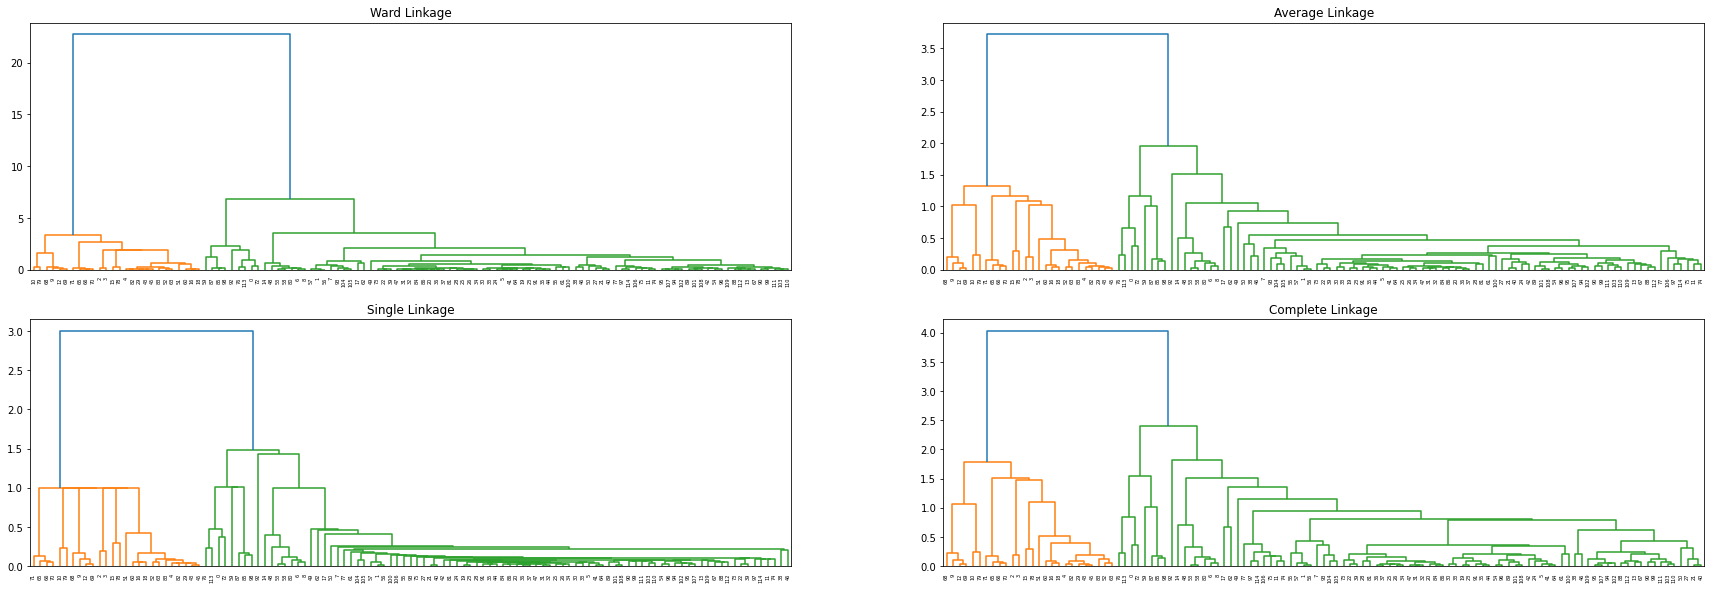

In [7]:
import scipy.cluster.hierarchy as shc
rows = 2
columns = 2
figure = plt.figure(figsize=(30, 10))  
figure.add_subplot(rows, columns, 1)
plt.title("Ward Linkage")  
shc.dendrogram(shc.linkage(data_scaled, method='ward'))
figure.add_subplot(rows, columns, 2)
plt.title("Average Linkage")  
shc.dendrogram(shc.linkage(data_scaled, method='average'))
figure.add_subplot(rows, columns, 3)
plt.title("Single Linkage")  
shc.dendrogram(shc.linkage(data_scaled, method='single'))
figure.add_subplot(rows, columns, 4)
plt.title("Complete Linkage")  
shc.dendrogram(shc.linkage(data_scaled, method='complete'))
figure.savefig('DendogramsElecVehA1.png', dpi=300, bbox_inches='tight')

## Applying Hierarchical clustering for the clusters

In [8]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=7, affinity='cosine', linkage='single')  
team_models = cluster.fit_predict(data_scaled)

Evaluating Quality of cluster with Shilhoute Score


### <a name="UseCaseAClusterUnderstanding">2.2 Feature Selection and Understanding Clusters</a> 
[Back to Table of Contents](#table)

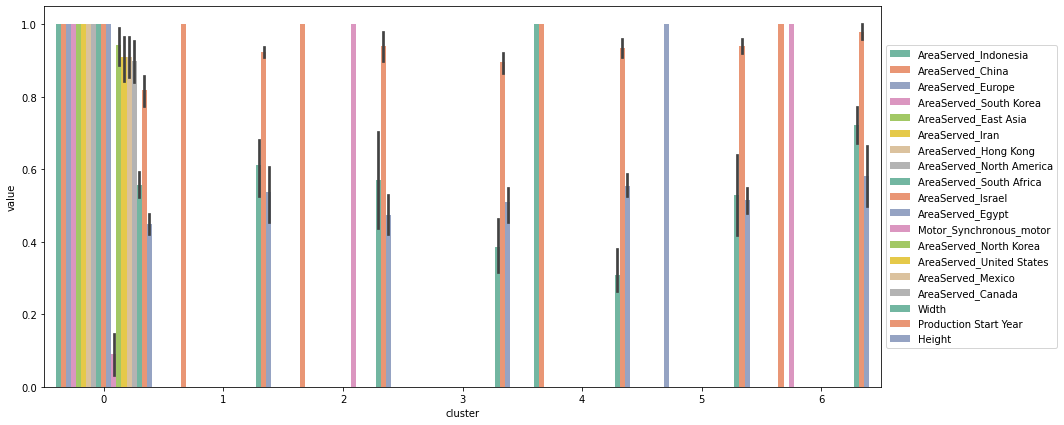

In [9]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=7, affinity='cosine', linkage='single')  
team_models = cluster.fit_predict(data_scaled)
hierarchical_clustering = pd.DataFrame(team_models)
minMaxscaler = MinMaxScaler()
scaledDataFrame = pd.DataFrame(minMaxscaler.fit_transform(df1_electric_vehicles))
scaledDataFrame.columns = df1_electric_vehicles.columns
scaledDataFrame['cluster'] = cluster.labels_
# Largest standard deviation likely to have largest importance
meansDataFrame = scaledDataFrame.groupby('cluster').mean().reset_index()
variablesDeviations = pd.DataFrame(columns=['Vars', 'Deviation'])
i = 0
while i < len(meansDataFrame.columns[1:]):
    variablesDeviations.loc[len(variablesDeviations), :] = [meansDataFrame.columns[1:][i], np.std(meansDataFrame[meansDataFrame.columns[1:][i]])]
    i+=1
includedColumns = list(variablesDeviations.sort_values('Deviation', ascending=False).head(30).Vars.values) + ['cluster']
finalData = scaledDataFrame[includedColumns].melt(id_vars='cluster')
figure, axix = plt.subplots(figsize=(15, 7))
sns.barplot(x='cluster', y='value', hue='variable', data=finalData, palette='Set2')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("electricalVehiclesAClusUnd.jpg", dpi=300)

##### Visualizing the clusters


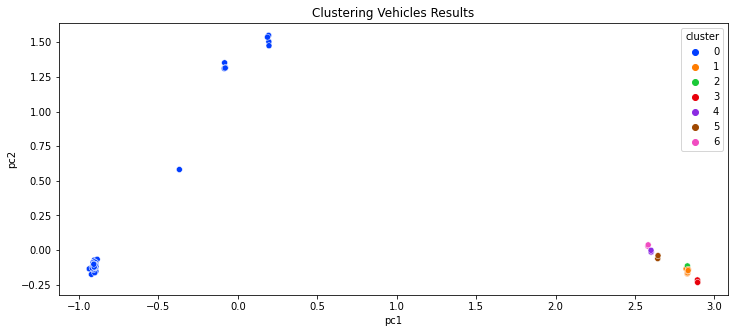

In [10]:
from sklearn.decomposition import PCA
fig, (sub1) = plt.subplots(1, figsize=(12, 5))
pca_vehicle_data = PCA(n_components=2)
principalComponents_vehicles = pca_vehicle_data.fit_transform(data_scaled)
sns.scatterplot(x=principalComponents_vehicles[:,0], y=principalComponents_vehicles[:,1], hue=team_models, palette='bright',ax=sub1);
sub1.set(xlabel="pc1", ylabel="pc2", title="Clustering Vehicles Results")
sub1.legend(title='cluster');
fig.savefig('PCAElecVehA1.png', dpi=300, bbox_inches='tight')



### <a name="UseCaseASilhoutteResults">2.3 Analysing Cluster Results with Different linkage criteria and number of clusters</a> 
[Back to Table of Contents](#table)

In [11]:

sil_scores = []
dav_scores = []
calin_scores = []
n_clusters = []
for i in range(2,17):
    cluster1 = AgglomerativeClustering(n_clusters=i, affinity='cosine', linkage='single')  
    team_models1 = cluster1.fit_predict(data_scaled)
    hierarchical_clustering = pd.DataFrame(team_models1)
    dav_scores.append(davies_bouldin_score(data_scaled,hierarchical_clustering[0]))
    sil_scores.append(silhouette_score(data_scaled,hierarchical_clustering[0],metric='cosine'))
    calin_scores.append(calinski_harabasz_score(data_scaled,hierarchical_clustering[0]))
    n_clusters.append(i)
hierarchicial_clustering_results_df = {'Num Clusters': n_clusters,'Silhouette Score': sil_scores, 'Davies Bouldin Score': dav_scores,'Calinski Harabasz Score': calin_scores}  
df_measures = pd.DataFrame(hierarchicial_clustering_results_df)  
print(df_measures.to_latex())


\begin{tabular}{lrrrr}
\toprule
{} &  Num Clusters &  Silhouette Score &  Davies Bouldin Score &  Calinski Harabasz Score \\
\midrule
0  &             2 &          0.887977 &              0.334123 &               513.472470 \\
1  &             3 &          0.867461 &              0.478673 &               273.003654 \\
2  &             4 &          0.887481 &              0.493028 &               196.190698 \\
3  &             5 &          0.906843 &              0.408107 &               159.316683 \\
4  &             6 &          0.923494 &              0.367844 &               132.266311 \\
5  &             7 &          0.942899 &              0.250411 &               114.381308 \\
6  &             8 &          0.903544 &              0.336266 &               233.940763 \\
7  &             9 &          0.862426 &              0.341969 &               228.921806 \\
8  &            10 &          0.867754 &              0.362237 &               231.606249 \\
9  &            11 &         

In [12]:
cluster1 = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')  
team_models1 = cluster1.fit_predict(data_scaled)
hierarchical_clustering1 = pd.DataFrame(team_models1)
davies_bouldin_score1 = davies_bouldin_score(data_scaled,hierarchical_clustering1[0])
silhouette_score1 = silhouette_score(data_scaled,hierarchical_clustering1[0],metric='euclidean')
calinski_harabasz_score1 = calinski_harabasz_score(data_scaled,hierarchical_clustering1[0])

cluster2 = AgglomerativeClustering(n_clusters=7, affinity='cosine', linkage='average')  
team_models2 = cluster2.fit_predict(data_scaled)
hierarchical_clustering2 = pd.DataFrame(team_models2)
davies_bouldin_score2 = davies_bouldin_score(data_scaled,hierarchical_clustering2[0])
silhouette_score2 = silhouette_score(data_scaled,hierarchical_clustering2[0],metric='cosine')
calinski_harabasz_score2 = calinski_harabasz_score(data_scaled,hierarchical_clustering2[0])

cluster3 = AgglomerativeClustering(n_clusters=7, affinity='cosine', linkage='complete')  
team_models3 = cluster3.fit_predict(data_scaled)
hierarchical_clustering3 = pd.DataFrame(team_models3)
davies_bouldin_score3 = davies_bouldin_score(data_scaled,hierarchical_clustering3[0])
silhouette_score3 = silhouette_score(data_scaled,hierarchical_clustering3[0],metric='cosine')
calinski_harabasz_score3 = calinski_harabasz_score(data_scaled,hierarchical_clustering3[0])

cluster4 = AgglomerativeClustering(n_clusters=7, affinity='cosine', linkage='single') 
team_models4 = cluster4.fit_predict(data_scaled)
hierarchical_clustering4 = pd.DataFrame(team_models4)
davies_bouldin_score4 = davies_bouldin_score(data_scaled,hierarchical_clustering4[0])
silhouette_score4 = silhouette_score(data_scaled,hierarchical_clustering4[0],metric='cosine')
calinski_harabasz_score4 = calinski_harabasz_score(data_scaled,hierarchical_clustering4[0])

hierarchicial_clustering_results_df = {'Linkage Type': ['Ward','Average(cosine)','Complete(cosine)','Single(cosine)'],'Silhouette Score': [silhouette_score1,silhouette_score2,silhouette_score3,silhouette_score4], 'Davies Bouldin Score': [davies_bouldin_score1, davies_bouldin_score2, davies_bouldin_score3, davies_bouldin_score4],'Calinski Harabasz Score': [calinski_harabasz_score1, calinski_harabasz_score2, calinski_harabasz_score3, calinski_harabasz_score4]}  
df_measures = pd.DataFrame(hierarchicial_clustering_results_df)  
print(df_measures.to_latex())


\begin{tabular}{llrrr}
\toprule
{} &      Linkage Type &  Silhouette Score &  Davies Bouldin Score &  Calinski Harabasz Score \\
\midrule
0 &              Ward &          0.629153 &              0.683888 &               351.363260 \\
1 &   Average(cosine) &          0.942899 &              0.250411 &               114.381308 \\
2 &  Complete(cosine) &          0.883578 &              0.437648 &               251.222155 \\
3 &    Single(cosine) &          0.942899 &              0.250411 &               114.381308 \\
\bottomrule
\end{tabular}



#### Determining the number of clusters for K-means Algorithm using Silhouette Visualizer

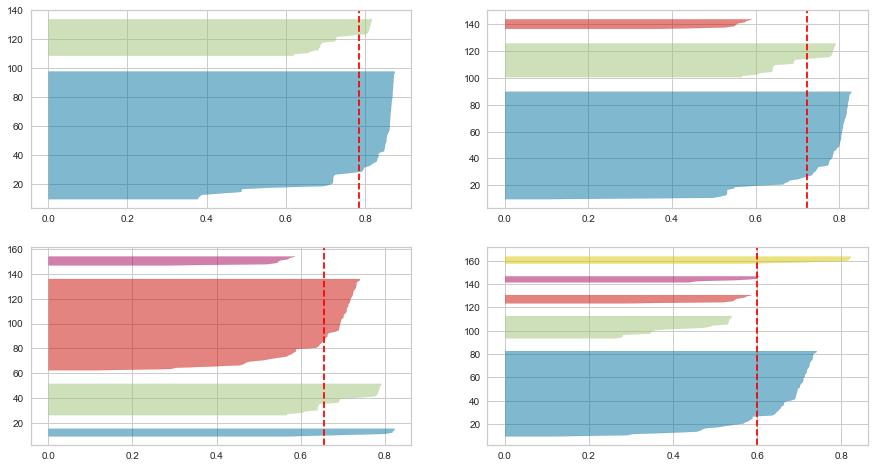

In [13]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data_scaled)

#### Criteria for DBSCAN

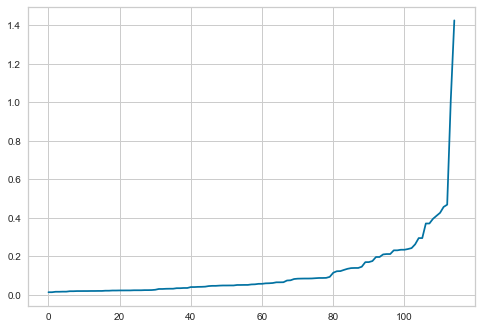

In [14]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(data_scaled)
distances, indices = nbrs.kneighbors(data_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

#### Comparing the cell types

In [15]:
kmeans_norm = KMeans(n_clusters=2).fit(data_scaled)
dbs_data = DBSCAN(eps=0.5, min_samples=2).fit(data_scaled)

silhouette_score1 = silhouette_score(data_scaled, hierarchical_clustering4[0],metric='cosine')
silhouette_score2 = silhouette_score(data_scaled, kmeans_norm.labels_, metric='euclidean')
silhouette_score3 = silhouette_score(data_scaled, kmeans_norm.labels_, metric='cosine')
silhouette_score4 = silhouette_score(data_scaled, dbs_data.labels_)

davies_bouldin_score1 = davies_bouldin_score(data_scaled,hierarchical_clustering4[0])
davies_bouldin_score2 = davies_bouldin_score(data_scaled,kmeans_norm.labels_)
davies_bouldin_score3 = davies_bouldin_score(data_scaled,kmeans_norm.labels_)
davies_bouldin_score4 = davies_bouldin_score(data_scaled,dbs_data.labels_)

calinski_harabasz_score1 = calinski_harabasz_score(data_scaled,hierarchical_clustering4[0])
calinski_harabasz_score2 = calinski_harabasz_score(data_scaled,kmeans_norm.labels_)
calinski_harabasz_score3 = calinski_harabasz_score(data_scaled,kmeans_norm.labels_)
calinski_harabasz_score4 = calinski_harabasz_score(data_scaled,dbs_data.labels_)

clustering_results_df = {'Linkage Type': ['Agglomerative Hierarchical clustering(linkage = Average)','Kmeans','Cosine Based Kmeans','DBSCAN'],'Silhouette Score': [silhouette_score1,silhouette_score2,silhouette_score3,silhouette_score4], 'Davies Bouldin Score': [davies_bouldin_score1, davies_bouldin_score2, davies_bouldin_score3, davies_bouldin_score4],'Calinski Harabasz Score': [calinski_harabasz_score1, calinski_harabasz_score2, calinski_harabasz_score3, calinski_harabasz_score4]}  
df_of_results = pd.DataFrame(clustering_results_df)  
print(df_of_results.to_latex())





\begin{tabular}{llrrr}
\toprule
{} &                                       Linkage Type &  Silhouette Score &  Davies Bouldin Score &  Calinski Harabasz Score \\
\midrule
0 &  Agglomerative Hierarchical clustering(linkage ... &          0.942899 &              0.250411 &               114.381308 \\
1 &                                             Kmeans &          0.783461 &              0.334123 &               513.472470 \\
2 &                                Cosine Based Kmeans &          0.887977 &              0.334123 &               513.472470 \\
3 &                                             DBSCAN &          0.682618 &              0.683454 &               315.938302 \\
\bottomrule
\end{tabular}



#### Cluster Rules Table

In [16]:
dct_of_clusters = {"cluster numbers":[1,2,3,4,5,6,7],"cluster descriptions":["Found Worldwide that can have synchronous motors, average width, average production year and average height","Available in China having newer starting years and not having synchronous motors",
        "Available in China with Synchronous motors that are older","Vehicles that are not available in any of the countries or continents above being smaller and older",
        "Available in Indonesia and China having less width and being newer","Available in Europe being taller than other vehicles",
        "Available in South Korea and China, and the newest, widest and tallest"]}
df_of_results = pd.DataFrame(dct_of_clusters)  
print(df_of_results.to_latex())



\begin{tabular}{lrl}
\toprule
{} &  cluster numbers &                               cluster descriptions \\
\midrule
0 &                1 &  Found Worldwide that can have synchronous moto... \\
1 &                2 &  Available in China having newer starting years... \\
2 &                3 &  Available in China with Synchronous motors tha... \\
3 &                4 &  Vehicles that are not available in any of the ... \\
4 &                5 &  Available in Indonesia and China having less w... \\
5 &                6 &  Available in Europe being taller than other ve... \\
6 &                7 &  Available in South Korea and China, and the ne... \\
\bottomrule
\end{tabular}





### <a name="UseCaseAVisualization">2.4 Visualization of clusters for use case A</a> 
[Back to Table of Contents](#table)


In [17]:
class Window(QtWidgets.QMainWindow):
    def __init__(self,dataset):
        self._dataset = dataset
        self._df_including_cordinates = self._dataset.copy()
        self._dataset.drop('Longitude', inplace=True, axis=1)
        self._dataset.drop('Latitude', inplace=True, axis=1)
        self._dataset.drop('Name', inplace=True, axis=1)
        super().__init__()
        self.initWindow()

    def initWindow(self):
        self.setWindowTitle(self.tr("Clustering of electronic vehicles by area served"))
        self.setFixedSize(1500, 800)
        self.comboBox1 = QtWidgets.QComboBox(self)
        self.comboBox2 = QtWidgets.QComboBox(self)
        self.editField3 = QtWidgets.QLineEdit(self)
        self.editField4 = QtWidgets.QLineEdit(self)
        self.editField6 = QtWidgets.QLineEdit(self)
        self.label5 = QtWidgets.QLabel('red',self)
        self.label5.setHidden(True)
        self.m = folium.Map(location=[51.5074, 0.1278], zoom_start=6)
        self.buttonUI()

    def buttonUI(self):
        submitButton = QtWidgets.QPushButton(self.tr("Submit"))
        submitButton.clicked.connect(self.calculateClusterPressed)
        self.editField3.setFixedSize(120, 50)
        self.editField4.setFixedSize(120, 50)
        self.editField6.setFixedSize(120, 50)
        submitButton.move(20, 260)
        label1 = QtWidgets.QLabel(self)
        label1.setText("Area Served:")
        label1.setFixedSize(120, 50)
        self.comboBox1.setFixedSize(120, 50)
        self.comboBox1.addItem("Canada")
        self.comboBox1.addItem("Mexico")
        self.comboBox1.addItem("North Korea")
        self.comboBox1.addItem("United States")
        self.comboBox1.addItem("South Korea")
        self.comboBox1.addItem("China")
        self.comboBox1.addItem("East Asia")
        self.comboBox1.addItem("Europe")
        self.comboBox1.addItem("Indonesia")
        self.comboBox1.addItem("Egypt")
        self.comboBox1.addItem("Israel")
        self.comboBox1.addItem("South Africa")
        self.comboBox1.addItem("North America")
        self.comboBox1.addItem("Hong Kong")
        self.comboBox1.addItem("Iran")
        self.comboBox2.setFixedSize(120, 50)
        self.comboBox2.addItem("Synchronous")
        self.comboBox2.addItem("Not-Synchronous")
        label2 = QtWidgets.QLabel(self)
        label2.setText("Motor:")
        label2.setFixedSize(120, 50)
        label3 = QtWidgets.QLabel(self)
        label3.setText("Width (m):")
        label3.setFixedSize(120, 50)
        label4 = QtWidgets.QLabel(self)
        label4.setText("Height (m):")
        label4.setFixedSize(120, 50)
        label6 = QtWidgets.QLabel(self)
        label6.setText("Production Start:")
        label6.setFixedSize(120, 50)
        self.label5.setText("Data is an outlier")
        self.label5.setFixedSize(120, 50)
        self.label5.setStyleSheet("background-color: red")
        self.view = QWebEngineView()
        self.view.setContentsMargins(50, 50, 50, 50)
        central_widget = QtWidgets.QWidget()
        self.setCentralWidget(central_widget)
        lay = QtWidgets.QHBoxLayout(central_widget)
        button_container = QtWidgets.QWidget()
        vlay = QtWidgets.QVBoxLayout(button_container)
        vlay.setSpacing(20)
        vlay.addStretch()
        vlay.addWidget(label1)
        vlay.addWidget(self.comboBox1)
        vlay.addWidget(label2)
        vlay.addWidget(self.comboBox2)
        vlay.addWidget(label3)
        vlay.addWidget(self.editField3)
        vlay.addWidget(label4)
        vlay.addWidget(self.editField4)
        vlay.addWidget(label6)
        vlay.addWidget(self.editField6)
        vlay.addWidget(submitButton)
        vlay.addWidget(self.label5)
        vlay.addStretch()
        lay.addWidget(button_container)
        lay.addWidget(self.view, stretch=1)
        data = io.BytesIO()
        self.m.save(data, close_file=False)
        self.view.setHtml(data.getvalue().decode())
    
    def calculateClusterPressed(self):
        
        
        current_country = str(self.comboBox1.currentText())
        motor_property = str(self.comboBox2.currentText())
        synchronous = 0.0
        canada = 0.0
        mexico = 0.0
        north_korea = 0.0
        united_states = 0.0
        south_korea = 0.0
        china = 0.0
        east_asia = 0.0
        europe = 0.0
        indonesia = 0.0
        egypt = 0.0
        israel = 0.0
        south_africa = 0.0
        north_america = 0.0
        hong_kong = 0.0
        iran = 0.0
        if motor_property == "Synchronous":
            synchronous = 1.0
        if current_country == "Canada":
            canada = 1.0
        elif current_country == "Mexico":
            mexico = 1.0
        elif current_country == "North Korea":
            north_korea = 1.0
        elif current_country == "United States":
            united_states = 1.0
        elif current_country == "South Korea":
            south_korea = 1.0
        elif current_country == "China":
            china = 1.0
        elif current_country == "East Asia":
            east_asia = 1.0
        elif current_country == "Europe":
            europe = 1.0
        elif current_country == "Indonesia":
            indonesia = 1.0
        elif current_country == "Egypt":
            egypt = 1.0
        elif current_country == "Israel":
            israel = 1.0
        elif current_country == "South Africa":
            south_africa = 1.0
        elif current_country == "North America":
            north_america = 1.0
        elif current_country == "Hong Kong":
            hong_kong = 1.0
        elif current_country == "Iran":
            iran = 1.0
        insertData = {'Motor_Synchronous_motor':synchronous,"Width":float(self.editField3.text()),"Height":float(self.editField4.text()), 'Production Start Year':float(self.editField6.text()),
            "AreaServed_Canada":canada, "AreaServed_Mexico":mexico, "AreaServed_North Korea":north_korea, "AreaServed_United States":united_states, "AreaServed_South Korea":south_korea, 
            "AreaServed_China":china, "AreaServed_East Asia":east_asia, "AreaServed_Europe":europe, "AreaServed_Indonesia":indonesia, 
            "AreaServed_Egypt":egypt, "AreaServed_Israel":israel, "AreaServed_South Africa":south_africa, "AreaServed_North America":north_america,
            "AreaServed_Hong Kong":hong_kong, "AreaServed_Iran":iran}    
        self._dataset = self._dataset.append(insertData, ignore_index=True)
        scaler = MinMaxScaler()
        data_scaled = pd.DataFrame(scaler.fit_transform(self._dataset), columns=self._dataset.columns)
        cluster = AgglomerativeClustering(n_clusters=7, affinity='cosine', linkage='single') 
        team_models = cluster.fit_predict(data_scaled)
        hierarchical_clustering = pd.DataFrame(team_models)
        dct_of_colour =  {0:"red", 1:"green", 2:"blue", 3:"purple", 4:"orange",5:"grey",6:"yellow"}
        new_item_cluster = team_models[-1]
        if np.count_nonzero(team_models == new_item_cluster) == 1:
            self.label5.setHidden(False)  
        else:
            self.label5.setHidden(True)
            i = 0
            for index, row in self._df_including_cordinates.iterrows():                
                if hierarchical_clustering[0][i] == team_models[-1]:
                    html="""
                    <h1>""" + row['Name'] + """'s data</h1><br>
                    <p>
                     This electronic vehicles has the following details
                    </p>
                    <b> Vehicle Name: </b> """ + row['Name'] + """ <br>
                    <b> Area Served: </b> """ + current_country + """ <br>
                    <b> Synchronous Motor: </b> """ + str(synchronous) + """ <br>
                    <b> Width (m): </b> """ + str(row['Width']) + """ <br>
                    <b> Height (m): </b> """ + str(row['Height']) + """ <br>
                    <b> Pro Start Year: </b> """ + str(row['Production Start Year']) + """ <br>
                    """
                    frame = IFrame(html=html, width=500, height=300)
                    pop_text = folium.Popup(frame, max_width=2650)
                    folium.Marker(
                    [row['Latitude'], row['Longitude']], 
                    popup = pop_text, 
                    icon=folium.Icon(color = dct_of_colour[hierarchical_clustering[0][i]],),
                    ).add_to(self.m)
                    folium.Map(location=[row['Latitude'], row['Longitude']], zoom_start=6)
                i += 1
            self.m
            data = io.BytesIO()
            self.m.save(data, close_file=False)
            self.view.setHtml(data.getvalue().decode())
    
if __name__ == "__main__":
    electrical_cars_df = pd.read_excel("electronic_vehicles_final.xlsx", sheet_name="Sheet1")
    df1_electrical_cars = edit_data_frame_with_columns(['Name','Latitude','Longitude','Area Served', 'Motor', 'Width', 'Height', 'Production Start Year'],electrical_cars_df)
    App = QtCore.QCoreApplication.instance()
    if App is None:
        App = QtWidgets.QApplication(sys.argv)
    window = Window(df1_electrical_cars)
    window.show()
    sys.exit(App.exec())


SystemExit: 0

/Users/colmclery/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3445: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)




### <a name="UseCaseATimeExperiment">2.5 Experimenting Time To Load Cluster items</a> 
[Back to Table of Contents](#table)

In [18]:
import time

num_clusters = 7
affin = 'cosine'
link = 'single'
electrical_cars_df = pd.read_excel("electronic_vehicles_final.xlsx", sheet_name="Sheet1")
electrical_cars_df = edit_data_frame_with_columns(['Name','Longitude','Latitude','Area Served', 'Motor', 'Width', 'Height', 'Production Start Year'],electrical_cars_df)
df1_electric_vehicles = electrical_cars_df.copy()
electrical_cars_df.drop('Longitude', inplace=True, axis=1)
electrical_cars_df.drop('Latitude', inplace=True, axis=1)
electrical_cars_df.drop('Name', inplace=True, axis=1)
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(electrical_cars_df), columns=electrical_cars_df.columns)
cluster = AgglomerativeClustering(n_clusters=num_clusters, affinity=affin, linkage=link) 
team_models = cluster.fit_predict(data_scaled)
hierarchical_clustering = pd.DataFrame(team_models)
data_scaled.insert((data_scaled.shape[1]),'agglomerative',hierarchical_clustering)
dct_of_colour =  {0:"red", 1:"green", 2:"blue", 3:"purple", 4:"orange",5:"grey",6:"yellow"}
times_dct = {"Cluster ID":[],"Number Of Vehicles":[],"Time To Load":[],}
m = folium.Map(location=[51.5074, 0.1278], zoom_start=6)
cluster_id = 0
for cluster in range(num_clusters):
    i = 0
    t1 = time.time()
    count_per_cluster = 0
    for index, row in df1_electric_vehicles.iterrows():           
        if team_models[i] == cluster_id:
            count_per_cluster += 1
            html="""
            <h1>""" + row['Name'] + """'s data</h1><br>
            <b> Vehicle Name: </b> """ + row['Name'] + """ <br>
            <b> Width (m): </b> """ + str(row['Width']) + """ <br>
            <b> Height (m): </b> """ + str(row['Height']) + """ <br>
            <b> Pro Start Year: </b> """ + str(row['Production Start Year']) + """ <br>
            """
            frame = IFrame(html=html, width=500, height=300)
            pop_text = folium.Popup(frame, max_width=2650)
            folium.Marker(
            [row['Latitude'], row['Longitude']], 
            popup = pop_text, 
            icon=folium.Icon(color = dct_of_colour[hierarchical_clustering[0][i]],),
            ).add_to(m)
        i += 1
    t2 = time.time()
    times_dct["Time To Load"].append(t2 - t1)
    cluster_id+=1
    times_dct["Number Of Vehicles"].append(count_per_cluster)
    times_dct["Cluster ID"].append(cluster_id)
df = pd.DataFrame(times_dct)
print(df.to_latex())
data = io.BytesIO()
m.save(data, close_file=False)
m





<ipython-input-18-7242fd9b030f>:41: UserWarning: color argument of Icon should be one of: {'darkgreen', 'white', 'lightgray', 'orange', 'darkred', 'pink', 'beige', 'purple', 'darkblue', 'lightblue', 'blue', 'lightred', 'darkpurple', 'red', 'cadetblue', 'lightgreen', 'gray', 'black', 'green'}.
  icon=folium.Icon(color = dct_of_colour[hierarchical_clustering[0][i]],),


\begin{tabular}{lrrr}
\toprule
{} &  Cluster ID &  Number Of Vehicles &  Time To Load \\
\midrule
0 &           1 &                  89 &      0.059180 \\
1 &           2 &                  12 &      0.014545 \\
2 &           3 &                   2 &      0.008307 \\
3 &           4 &                   4 &      0.009309 \\
4 &           5 &                   4 &      0.009539 \\
5 &           6 &                   2 &      0.009019 \\
6 &           7 &                   2 &      0.008417 \\
\bottomrule
\end{tabular}



## <a name="UseCaseB">3. Use Case B: Clustering of Electric Vehicle Data to find Data for Methodical Shopers </a>

### <a name="UseCaseBFeatureSelection">3.1. FeatureSelection</a> 
[Back to Table of Contents](#table)

In [19]:
electrical_cars_df = pd.read_excel("electronic_vehicles_final.xlsx", sheet_name="Sheet1")
print(find_best_features(['Drivetrain', 'Motor', 'Doors', 'Body Style', 'Wheelbase'],5,electrical_cars_df,True))

(['Drivetrain', 'Motor', 'Doors', 'Wheelbase', 'Body Style'], 'ward', 16, 0.8377398055102393)


In [20]:

electrical_cars_df = pd.read_excel("electronic_vehicles_final.xlsx", sheet_name="Sheet1") 
electrical_cars_df = edit_data_frame_with_columns(['Drivetrain', 'Motor', 'Doors', 'Body Style', 'Wheelbase'],electrical_cars_df)
df1_electric_vehicles = electrical_cars_df
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(df1_electric_vehicles), columns=df1_electric_vehicles.columns)
data_scaled.head()

,Wheelbase,BodyStyle_2,BodyStyle_3,BodyStyle_4,BodyStyle_5,Drivetrain_Hybrid_vehicle_drivetrain,Doors_Butterfly_doors,Doors_Gull-wing_door,Motor_Synchronous_motor
0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.381789,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.506292,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.477690,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.532479,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Identifying and removing outliers

In [21]:
data_scaled[(np.abs(stats.zscore(data_scaled)) < 3).all(axis=1)]

,Wheelbase,BodyStyle_2,BodyStyle_3,BodyStyle_4,BodyStyle_5,Drivetrain_Hybrid_vehicle_drivetrain,Doors_Butterfly_doors,Doors_Gull-wing_door,Motor_Synchronous_motor
0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.381789,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.506292,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.477690,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.532479,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
136,0.587052,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
137,0.383471,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
138,0.523932,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
139,0.472643,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


##### Testing to determine the clustering tendency of a data set.

In [22]:
hopkins(df1_electric_vehicles,len(df1_electric_vehicles))

0.08408590048460991

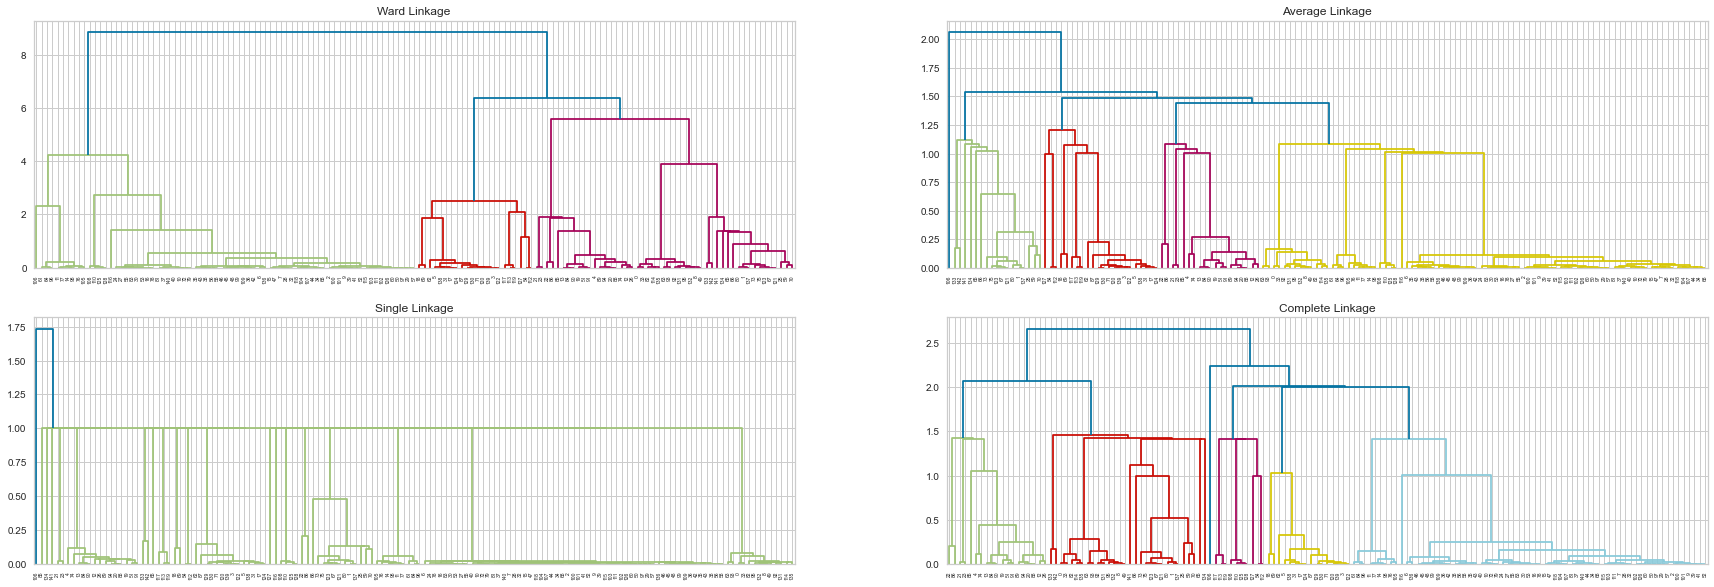

In [23]:
import scipy.cluster.hierarchy as shc
rows = 2
columns = 2
figure = plt.figure(figsize=(30, 10))  
figure.add_subplot(rows, columns, 1)
plt.title("Ward Linkage")  
shc.dendrogram(shc.linkage(data_scaled, method='ward'))
figure.add_subplot(rows, columns, 2)
plt.title("Average Linkage")  
shc.dendrogram(shc.linkage(data_scaled, method='average'))
figure.add_subplot(rows, columns, 3)
plt.title("Single Linkage")  
shc.dendrogram(shc.linkage(data_scaled, method='single'))
figure.add_subplot(rows, columns, 4)
plt.title("Complete Linkage")  
shc.dendrogram(shc.linkage(data_scaled, method='complete'))
figure.savefig('DendogramsElecVeB1.png', dpi=300, bbox_inches='tight')

## Applying Hierarchical clustering for the clusters

In [24]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward') 
team_models = cluster.fit_predict(data_scaled)

Evaluating Quality of cluster with Shilhoute Score

### Feature Selection and Understanding Clusters
### <a name="UseCaseBClusterUnderstanding">3.2 Feature Selection and Understanding Clusters</a> 
[Back to Table of Contents](#table)

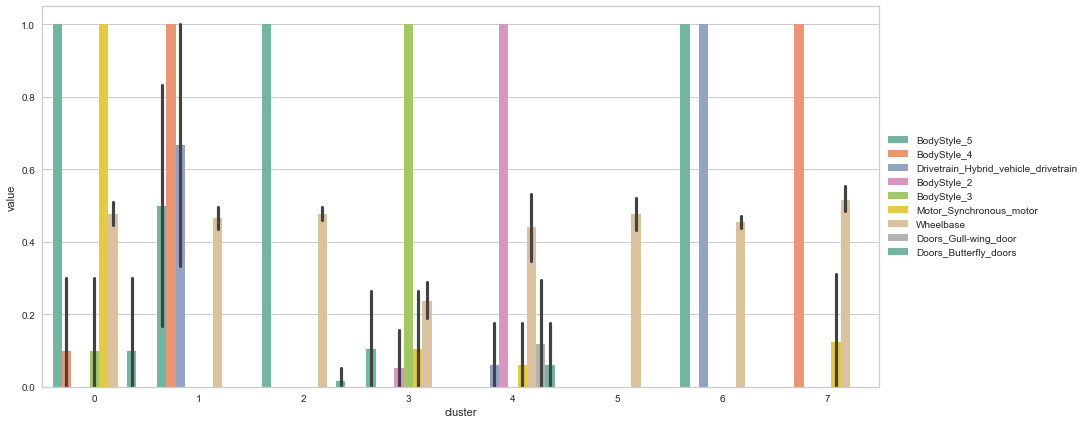

In [25]:
# Grouping rows of data based on Hierarchical cluster
cluster = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')  
team_models = cluster.fit_predict(data_scaled)
minMaxscaler = MinMaxScaler()
scaledDataFrame = pd.DataFrame(minMaxscaler.fit_transform(df1_electric_vehicles))
scaledDataFrame.columns = df1_electric_vehicles.columns
scaledDataFrame['cluster'] = cluster.labels_
# Largest standard deviation likely to have largest importance
meansDataFrame = scaledDataFrame.groupby('cluster').mean().reset_index()
variablesDeviations = pd.DataFrame(columns=['Vars', 'Deviation'])
i = 0
while i < len(meansDataFrame.columns[1:]):
    variablesDeviations.loc[len(variablesDeviations), :] = [meansDataFrame.columns[1:][i], np.std(meansDataFrame[meansDataFrame.columns[1:][i]])]
    i+=1 
includedColumns = list(variablesDeviations.sort_values('Deviation', ascending=False).head(10).Vars.values) + ['cluster']
finalData = scaledDataFrame[includedColumns].melt(id_vars='cluster')
figure, axix = plt.subplots(figsize=(15, 7))
sns.barplot(x='cluster', y='value', hue='variable', data=finalData, palette='Set2')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("clustersFromElectronicVehiclesB.jpg", dpi=300)

##### Visualizing the clusters


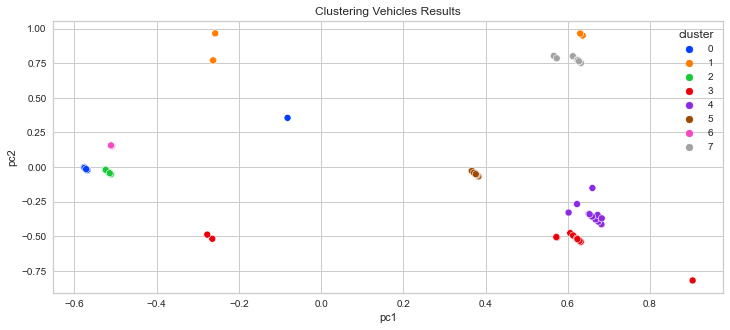

In [26]:
from sklearn.decomposition import PCA
fig, (sub1) = plt.subplots(1, figsize=(12, 5))
pca_vehicle_data = PCA(n_components=2)
principalComponents_vehicles = pca_vehicle_data.fit_transform(data_scaled)
sns.scatterplot(x=principalComponents_vehicles[:,0], y=principalComponents_vehicles[:,1], hue=team_models, palette='bright',ax=sub1);
sub1.set(xlabel="pc1", ylabel="pc2", title="Clustering Vehicles Results")
sub1.legend(title='cluster');
fig.savefig('PCAElecVehB1.png', dpi=300, bbox_inches='tight')



### <a name="UseCaseBSilhoutteResults">3.3 Analysing Cluster Results with Different linkage criteria and number of clusters</a> 
[Back to Table of Contents](#table)

In [27]:

sil_scores = []
dav_scores = []
calin_scores = []
n_clusters = []
for i in range(2,17):
    cluster1 = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')  
    team_models1 = cluster1.fit_predict(data_scaled)
    hierarchical_clustering = pd.DataFrame(team_models1)
    dav_scores.append(davies_bouldin_score(data_scaled,hierarchical_clustering[0]))
    sil_scores.append(silhouette_score(data_scaled,hierarchical_clustering[0],metric='euclidean'))
    calin_scores.append(calinski_harabasz_score(data_scaled,hierarchical_clustering[0]))
    n_clusters.append(i)
hierarchicial_clustering_results_df = {'Num Clusters': n_clusters,'Silhouette Score': sil_scores, 'Davies Bouldin Score': dav_scores,'Calinski Harabasz Score': calin_scores}  
df_measures = pd.DataFrame(hierarchicial_clustering_results_df)  
print(df_measures.to_latex())


\begin{tabular}{lrrrr}
\toprule
{} &  Num Clusters &  Silhouette Score &  Davies Bouldin Score &  Calinski Harabasz Score \\
\midrule
0  &             2 &          0.436326 &              1.174829 &                70.490492 \\
1  &             3 &          0.522967 &              1.082799 &                72.092158 \\
2  &             4 &          0.589268 &              0.903920 &                82.420125 \\
3  &             5 &          0.634023 &              0.818515 &                87.007023 \\
4  &             6 &          0.661354 &              0.580766 &                97.524615 \\
5  &             7 &          0.699881 &              0.535496 &                98.343608 \\
6  &             8 &          0.726402 &              0.735624 &               100.708714 \\
7  &             9 &          0.737069 &              0.672594 &               104.953547 \\
8  &            10 &          0.759025 &              0.483688 &               109.321033 \\
9  &            11 &         

In [28]:
cluster1 = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')  
team_models1 = cluster1.fit_predict(data_scaled)
hierarchical_clustering1 = pd.DataFrame(team_models1)
davies_bouldin_score1 = davies_bouldin_score(data_scaled,hierarchical_clustering1[0])
silhouette_score1 = silhouette_score(data_scaled,hierarchical_clustering1[0],metric='euclidean')
calinski_harabasz_score1 = calinski_harabasz_score(data_scaled,hierarchical_clustering1[0])

cluster2 = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='average')  
team_models2 = cluster2.fit_predict(data_scaled)
hierarchical_clustering2 = pd.DataFrame(team_models2)
davies_bouldin_score2 = davies_bouldin_score(data_scaled,hierarchical_clustering2[0])
silhouette_score2 = silhouette_score(data_scaled,hierarchical_clustering2[0],metric='euclidean')
calinski_harabasz_score2 = calinski_harabasz_score(data_scaled,hierarchical_clustering2[0])

cluster3 = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='complete')  
team_models3 = cluster3.fit_predict(data_scaled)
hierarchical_clustering3 = pd.DataFrame(team_models3)
davies_bouldin_score3 = davies_bouldin_score(data_scaled,hierarchical_clustering3[0])
silhouette_score3 = silhouette_score(data_scaled,hierarchical_clustering3[0],metric='euclidean')
calinski_harabasz_score3 = calinski_harabasz_score(data_scaled,hierarchical_clustering3[0])

cluster4 = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='single') 
team_models4 = cluster4.fit_predict(data_scaled)
hierarchical_clustering4 = pd.DataFrame(team_models4)
davies_bouldin_score4 = davies_bouldin_score(data_scaled,hierarchical_clustering4[0])
silhouette_score4 = silhouette_score(data_scaled,hierarchical_clustering4[0],metric='euclidean')
calinski_harabasz_score4 = calinski_harabasz_score(data_scaled,hierarchical_clustering4[0])

hierarchicial_clustering_results_df = {'Linkage Type': ['Ward','Average','Complete','Single'],'Silhouette Score': [silhouette_score1,silhouette_score2,silhouette_score3,silhouette_score4], 'Davies Bouldin Score': [davies_bouldin_score1, davies_bouldin_score2, davies_bouldin_score3, davies_bouldin_score4],'Calinski Harabasz Score': [calinski_harabasz_score1, calinski_harabasz_score2, calinski_harabasz_score3, calinski_harabasz_score4]}  
df_measures = pd.DataFrame(hierarchicial_clustering_results_df)  
print(df_measures.to_latex())


\begin{tabular}{llrrr}
\toprule
{} & Linkage Type &  Silhouette Score &  Davies Bouldin Score &  Calinski Harabasz Score \\
\midrule
0 &         Ward &          0.726402 &              0.735624 &               100.708714 \\
1 &      Average &          0.624127 &              0.563071 &                66.512915 \\
2 &     Complete &          0.593247 &              0.789962 &                54.500218 \\
3 &       Single &          0.319884 &              0.544700 &                 8.694639 \\
\bottomrule
\end{tabular}



#### Determining the number of clusters for K-means Algorithm using Silhouette Visualizer

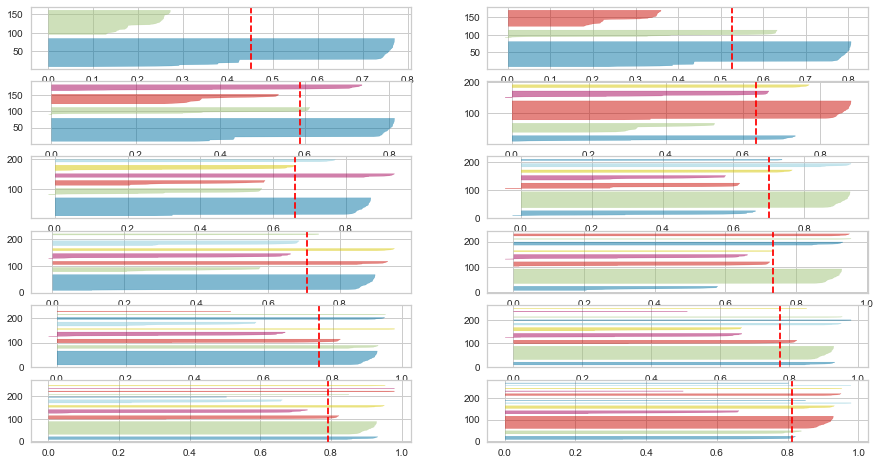

In [29]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(6, 2, figsize=(15,8))
for i in [2, 3, 4, 5,6,7,8,9,10,11,12,13]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data_scaled)

#### Using the Elbow Plot method as the number of clusters is not clear from the silhouette visualizer

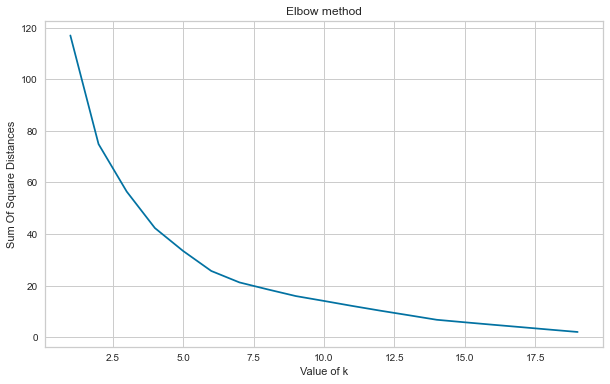

In [30]:
sum_of_squared_distances = []
cluster_range = range(1,20)
for cluster_num in cluster_range:
    kModel = KMeans(n_clusters=cluster_num)
    kModel.fit(data_scaled)
    sum_of_squared_distances.append(kModel.inertia_)
plt.figure(figsize=(10,6))
plt.plot(cluster_range, sum_of_squared_distances, 'bx-')
plt.xlabel('Value of k')
plt.ylabel('Sum Of Square Distances')
plt.title('Elbow method')
plt.show()

#### Criteria for DBSCAN

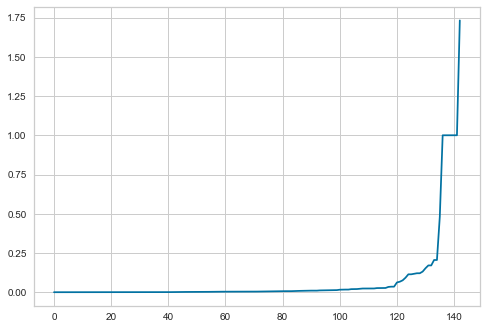

In [31]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(data_scaled)
distances, indices = nbrs.kneighbors(data_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

#### Comparing the cell types

In [32]:
#Hierarchical clustering, K-means clustering with cosine k-means, .....
kmeans_norm = KMeans(n_clusters=4).fit(data_scaled)
dbs_data = DBSCAN(eps=0.12, min_samples=2).fit(data_scaled)

silhouette_score1 = silhouette_score(data_scaled, hierarchical_clustering1[0],metric='euclidean')
silhouette_score2 = silhouette_score(data_scaled, kmeans_norm.labels_, metric='euclidean')
silhouette_score3 = silhouette_score(data_scaled, kmeans_norm.labels_, metric='cosine')
silhouette_score4 = silhouette_score(data_scaled, dbs_data.labels_)

davies_bouldin_score1 = davies_bouldin_score(data_scaled,hierarchical_clustering1[0])
davies_bouldin_score2 = davies_bouldin_score(data_scaled,kmeans_norm.labels_)
davies_bouldin_score3 = davies_bouldin_score(data_scaled,kmeans_norm.labels_)
davies_bouldin_score4 = davies_bouldin_score(data_scaled,dbs_data.labels_)

calinski_harabasz_score1 = calinski_harabasz_score(data_scaled,hierarchical_clustering1[0])
calinski_harabasz_score2 = calinski_harabasz_score(data_scaled,kmeans_norm.labels_)
calinski_harabasz_score3 = calinski_harabasz_score(data_scaled,kmeans_norm.labels_)
calinski_harabasz_score4 = calinski_harabasz_score(data_scaled,dbs_data.labels_)

clustering_results_df = {'Linkage Type': ['Agglomerative Hierarchical clustering(linkage = Average)','Kmeans','Cosine Based Kmeans','DBSCAN'],'Silhouette Score': [silhouette_score1,silhouette_score2,silhouette_score3,silhouette_score4], 'Davies Bouldin Score': [davies_bouldin_score1, davies_bouldin_score2, davies_bouldin_score3, davies_bouldin_score4],'Calinski Harabasz Score': [calinski_harabasz_score1, calinski_harabasz_score2, calinski_harabasz_score3, calinski_harabasz_score4]}  
df_of_results = pd.DataFrame(clustering_results_df)  
print(df_of_results.to_latex())

\begin{tabular}{llrrr}
\toprule
{} &                                       Linkage Type &  Silhouette Score &  Davies Bouldin Score &  Calinski Harabasz Score \\
\midrule
0 &  Agglomerative Hierarchical clustering(linkage ... &          0.726402 &              0.735624 &               100.708714 \\
1 &                                             Kmeans &          0.589455 &              0.927709 &                83.144322 \\
2 &                                Cosine Based Kmeans &          0.735266 &              0.927709 &                83.144322 \\
3 &                                             DBSCAN &          0.751428 &              1.222817 &                45.578362 \\
\bottomrule
\end{tabular}



#### Cluster Rules Table

In [33]:
dct_of_clusters = {"cluster numbers":[1,2,3,4,5,6,7,8],"cluster descriptions":        
            ["Vehicles with body style 5 and synchronous motors","Vehicles with body style 4 and a hybrid vehicle drivetrain",
        "Vehicles with body style 5 that don't have a synchronous motor","Vehicles with body style 3",
        "Vehicles with body style 2","Vehicles that don't have any of the body styles listed",
        "Vehicles with body style 5 and a hybrid vehicle drivetrain","Vehicles with body style 4 and not a hybrid vehicle drivetrain"]}
df_of_results = pd.DataFrame(dct_of_clusters)  
print(df_of_results.to_latex()) 

\begin{tabular}{lrl}
\toprule
{} &  cluster numbers &                               cluster descriptions \\
\midrule
0 &                1 &  Vehicles with body style 5 and synchronous motors \\
1 &                2 &  Vehicles with body style 4 and a hybrid vehicl... \\
2 &                3 &  Vehicles with body style 5 that don't have a s... \\
3 &                4 &                         Vehicles with body style 3 \\
4 &                5 &                         Vehicles with body style 2 \\
5 &                6 &  Vehicles that don't have any of the body style... \\
6 &                7 &  Vehicles with body style 5 and a hybrid vehicl... \\
7 &                8 &  Vehicles with body style 4 and not a hybrid ve... \\
\bottomrule
\end{tabular}




### <a name="UseCaseBVisualization">3.4 Visualization of clusters for use case B</a> 
[Back to Table of Contents](#table)

In [34]:
import io
import sys
import folium
from PyQt5 import QtCore, QtGui, QtWidgets
from PyQt5.QtWebEngineWidgets import QWebEngineView 
from PyQt5.QtWebEngineWidgets import QWebEngineSettings as QWebSettings
from folium import IFrame
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import collections, numpy
from matplotlib import animation
from pyclustertend import hopkins
from scipy import stats
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans, DBSCAN
from sklearn import preprocessing
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import folium


class Window(QtWidgets.QMainWindow):
    def __init__(self,dataset):
        self._dataset = dataset
        self._df_including_cordinates = self._dataset.copy()
        self._dataset.drop('Longitude', inplace=True, axis=1)
        self._dataset.drop('Latitude', inplace=True, axis=1)
        self._dataset.drop('Name', inplace=True, axis=1)
        super().__init__()
        self.initWindow()

    def initWindow(self):
        self.setWindowTitle(self.tr("Clustering of electronic vehicles by area served"))
        self.setFixedSize(1500, 800)
        self.comboBox1 = QtWidgets.QComboBox(self)
        self.comboBox2 = QtWidgets.QComboBox(self)
        self.comboBox3 = QtWidgets.QComboBox(self)
        self.comboBox4 = QtWidgets.QComboBox(self)
        self.editField6 = QtWidgets.QLineEdit(self)
        self.label5 = QtWidgets.QLabel('red',self)
        self.label5.setHidden(True)
        self.m = folium.Map(location=[51.5074, 0.1278], zoom_start=6)
        self.buttonUI()

    def buttonUI(self):
        submitButton = QtWidgets.QPushButton(self.tr("Submit"))
        submitButton.clicked.connect(self.calculateClusterPressed)
        self.editField6.setFixedSize(120, 50)
        submitButton.move(20, 260)
        label1 = QtWidgets.QLabel(self)
        label1.setText("Drivetrain:")
        label1.setFixedSize(120, 50)
        self.comboBox1.setFixedSize(120, 50)
        self.comboBox1.addItem("Hybrid vehicle drivetrain")
        self.comboBox1.addItem("Not Hybrid Drivetrain")
        self.comboBox2.setFixedSize(120, 50)
        self.comboBox2.addItem("Synchronous")
        self.comboBox2.addItem("Not-Synchronous")
        self.comboBox3.setFixedSize(120, 50)
        self.comboBox3.addItem("Butterfly Doors")
        self.comboBox3.addItem("Gull Wing Doors")
        self.comboBox4.setFixedSize(120, 50)
        self.comboBox4.addItem("Body Style 2")
        self.comboBox4.addItem("Body Style 3")
        self.comboBox4.addItem("Body Style 4")
        self.comboBox4.addItem("Body Style 5")
        label2 = QtWidgets.QLabel(self)
        label2.setText("Motor:")
        label2.setFixedSize(120, 50)
        label3 = QtWidgets.QLabel(self)
        label3.setText("Doors:")
        label3.setFixedSize(120, 50)
        label4 = QtWidgets.QLabel(self)
        label4.setText("Body Style:")
        label4.setFixedSize(120, 50)
        label6 = QtWidgets.QLabel(self)
        label6.setText("Wheelbase:")
        label6.setFixedSize(120, 50)
        self.label5.setText("Data is an outlier")
        self.label5.setFixedSize(120, 50)
        self.label5.setStyleSheet("background-color: red")
        self.view = QWebEngineView()
        self.view.setContentsMargins(50, 50, 50, 50)
        central_widget = QtWidgets.QWidget()
        self.setCentralWidget(central_widget)
        lay = QtWidgets.QHBoxLayout(central_widget)
        button_container = QtWidgets.QWidget()
        vlay = QtWidgets.QVBoxLayout(button_container)
        vlay.setSpacing(20)
        vlay.addStretch()
        vlay.addWidget(label1)
        vlay.addWidget(self.comboBox1)
        vlay.addWidget(label2)
        vlay.addWidget(self.comboBox2)
        vlay.addWidget(label3)
        vlay.addWidget(self.comboBox3)
        vlay.addWidget(label4)
        vlay.addWidget(self.comboBox4)
        vlay.addWidget(label6)
        vlay.addWidget(self.editField6)
        vlay.addWidget(submitButton)
        vlay.addWidget(self.label5)
        vlay.addStretch()
        lay.addWidget(button_container)
        lay.addWidget(self.view, stretch=1)
        data = io.BytesIO()
        self.m.save(data, close_file=False)
        self.view.setHtml(data.getvalue().decode())
    
    def calculateClusterPressed(self):
        drivetrain = str(self.comboBox1.currentText())
        motor_property = str(self.comboBox2.currentText())
        doors = str(self.comboBox3.currentText())
        body_style = str(self.comboBox4.currentText())
        synchronous = 0.0
        drivetrain = 0.0
        if motor_property == "Synchronous":
            synchronous = 1.0
            
        if drivetrain == "Hybrid vehicle drivetrain":
            drivetrain = 1.0
        buttefly_doors = 0.0
        vehicle_canopy = 0.0
        scissor_doors = 0.0
        suicide_doors = 0.0
        gull_wing_doors = 0.0
        if doors == "Butterfly Doors":
            buttefly_doors = 1.0
        else:
            gull_wing_doors = 1.0
        bodyStyle2 = 0.0
        bodyStyle3 = 0.0
        bodyStyle4 = 0.0
        bodyStyle5 = 0.0
        if body_style == "Body Style 2":
            bodyStyle2 = 1.0
            
        elif body_style == "Body Style 3":
            bodyStyle3 = 1.0
            
        elif body_style == "Body Style 4":
            bodyStyle4 = 1.0
            
        elif body_style == "Body Style 5":
            bodyStyle5 = 1.0
        insertData = {'Wheelbase':float(self.editField6.text()),
            "BodyStyle_2":bodyStyle2, "BodyStyle_3":bodyStyle3, "BodyStyle_4":bodyStyle4, "BodyStyle_5":bodyStyle5, 
            "Drivetrain_Hybrid_vehicle_drivetrain":drivetrain, "Doors_Butterfly_doors":buttefly_doors, 
            "Doors_Gull-wing_door":gull_wing_doors, "Motor_Synchronous_motor":synchronous}    
        
        self._dataset = self._dataset.append(insertData, ignore_index=True)
        scaler = MinMaxScaler()
        data_scaled = pd.DataFrame(scaler.fit_transform(self._dataset), columns=self._dataset.columns)

        cluster = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward') 
        team_models = cluster.fit_predict(data_scaled)
        hierarchical_clustering = pd.DataFrame(team_models)
        dct_of_colour =  {0:"red", 1:"green", 2:"blue", 3:"purple", 4:"orange",5:"grey",6:"yellow",7:"black"}
        new_item_cluster = team_models[-1]
        if np.count_nonzero(team_models == new_item_cluster) == 1:
            self.label5.setHidden(False)            
        else:
            self.label5.setHidden(True)
            i = 0
            for index, row in self._df_including_cordinates.iterrows():
                if hierarchical_clustering[0][i] == team_models[-1]:
                    html="""
                    <h1>""" + row['Name'] + """'s data</h1><br>
                    <p>
                    </p>
                    <b> Vehicle Name: </b> """ + row['Name'] + """ <br>
                    <b> Body Style: </b> """ + str(body_style) + """ <br>
                    <b> Synchronous Motor: </b> """ + str(synchronous) + """ <br>
                    <b> Doors: </b> """ + str(doors) + """ <br>
                    <b> Drivetrain: </b> """ + str(drivetrain) + """ <br>
                    <b> Wheelbase: </b> """ + str(row['Wheelbase']) + """ <br>
                    
                    """
                    frame = IFrame(html=html, width=500, height=300)
                    pop_text = folium.Popup(frame, max_width=2650)
                    folium.Marker(
                    [row['Latitude'], row['Longitude']], 
                    popup = pop_text, 
                    icon=folium.Icon(color = dct_of_colour[hierarchical_clustering[0][i]], icon="fa-futbol"),
                    ).add_to(self.m)
                i += 1
                self.m
                data = io.BytesIO()
                self.m.save(data, close_file=False)
                self.view.setHtml(data.getvalue().decode())
        
if __name__ == "__main__":
    electrical_cars_df = pd.read_excel("electronic_vehicles_final.xlsx", sheet_name="Sheet1")
    df1_electrical_cars = edit_data_frame_with_columns(['Name','Latitude','Longitude','Drivetrain', 'Motor', 'Doors', 'Body Style', 'Wheelbase'],electrical_cars_df)
    App = QtCore.QCoreApplication.instance()
    if App is None:
        App = QtWidgets.QApplication(sys.argv)
    window = Window(df1_electrical_cars)
    window.show()
    sys.exit(App.exec())


SystemExit: 0

/Users/colmclery/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3445: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)




### <a name="UseCaseBTimeExperiment">3.5 Experimenting Time To Load Cluster items</a> 
[Back to Table of Contents](#table)

In [35]:
import time

num_clusters = 8
affin = 'euclidean'
link = 'ward'
electrical_cars_df = pd.read_excel("electronic_vehicles_final.xlsx", sheet_name="Sheet1")
electrical_cars_df = edit_data_frame_with_columns(['Name','Latitude','Longitude','Drivetrain', 'Motor', 'Doors', 'Body Style', 'Wheelbase'],electrical_cars_df)
df1_electric_vehicles = electrical_cars_df.copy()
electrical_cars_df.drop('Longitude', inplace=True, axis=1)
electrical_cars_df.drop('Latitude', inplace=True, axis=1)
electrical_cars_df.drop('Name', inplace=True, axis=1)
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(electrical_cars_df), columns=electrical_cars_df.columns)
cluster = AgglomerativeClustering(n_clusters=num_clusters, affinity=affin, linkage=link) 
team_models = cluster.fit_predict(data_scaled)
hierarchical_clustering = pd.DataFrame(team_models)
data_scaled.insert((data_scaled.shape[1]),'agglomerative',hierarchical_clustering)
dct_of_colour =  {0:"red", 1:"green", 2:"blue", 3:"purple", 4:"orange",5:"grey",6:"yellow",7:"black"}    
times_dct = {"Cluster ID":[],"Number Of Vehicles":[],"Time To Load":[],}
m = folium.Map(location=[51.5074, 0.1278], zoom_start=6)
cluster_id = 0
for cluster in range(num_clusters):
    i = 0
    t1 = time.time()
    count_per_cluster = 0
    for index, row in df1_electric_vehicles.iterrows():           
        if team_models[i] == cluster_id:
            count_per_cluster += 1
            html="""
            <h1>""" + row['Name'] + """'s data</h1><br>
            <p>
            </p>
            <b> Vehicle Name: </b> """ + row['Name'] + """ <br>
            <b> Wheelbase: </b> """ + str(row['Wheelbase']) + """ <br>
            """
            frame = IFrame(html=html, width=500, height=300)
            pop_text = folium.Popup(frame, max_width=2650)
            folium.Marker(
            [row['Latitude'], row['Longitude']], 
            popup = pop_text, 
            icon=folium.Icon(color = dct_of_colour[hierarchical_clustering[0][i]],),
            ).add_to(m)
        i += 1
    t2 = time.time()
    times_dct["Time To Load"].append(t2 - t1)
    cluster_id+=1
    times_dct["Number Of Vehicles"].append(count_per_cluster)
    times_dct["Cluster ID"].append(cluster_id)
df = pd.DataFrame(times_dct)
print(df.to_latex())
data = io.BytesIO()
m.save(data, close_file=False)
m

<ipython-input-35-5be2786ba210>:41: UserWarning: color argument of Icon should be one of: {'darkgreen', 'white', 'lightgray', 'orange', 'darkred', 'pink', 'beige', 'purple', 'darkblue', 'lightblue', 'blue', 'lightred', 'darkpurple', 'red', 'cadetblue', 'lightgreen', 'gray', 'black', 'green'}.
  icon=folium.Icon(color = dct_of_colour[hierarchical_clustering[0][i]],),


\begin{tabular}{lrrr}
\toprule
{} &  Cluster ID &  Number Of Vehicles &  Time To Load \\
\midrule
0 &           1 &                  10 &      0.015849 \\
1 &           2 &                   6 &      0.013083 \\
2 &           3 &                  58 &      0.048556 \\
3 &           4 &                  19 &      0.021370 \\
4 &           5 &                  17 &      0.019740 \\
5 &           6 &                  13 &      0.018094 \\
6 &           7 &                   4 &      0.011471 \\
7 &           8 &                  16 &      0.018830 \\
\bottomrule
\end{tabular}



## <a name="UseCaseC"> 4. Use Case C: Clustering of Electric Vehicle Data to find Data for Users with specific needs. </a>

### <a name="UseCaseCFeatureSelection">4.1. FeatureSelection</a> 
[Back to Table of Contents](#table)

In [36]:
electrical_cars_df = pd.read_excel("electronic_vehicles_final.xlsx", sheet_name="Sheet1")
print(find_best_features(['Layout', 'Height', 'Width', 'Length', 'Wheelbase','Engine'],4,electrical_cars_df,True))

(['Layout', 'Wheelbase', 'Height', 'Width'], 'complete', 16, 0.702397119558617)


In [37]:
electrical_cars_df = edit_data_frame_with_columns(['Layout', 'Wheelbase', 'Height', 'Width', 'Length'],electrical_cars_df)
df1_electric_vehicles = electrical_cars_df
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(df1_electric_vehicles), columns=df1_electric_vehicles.columns)
data_scaled.head()

,Wheelbase,Height,Length,Width,"Layout_Front-engine,_front-wheel-drive_layout",Layout_Rear-wheel_drive,Layout_Mid-engine_design,"Layout_Front-engine,_rear-wheel-drive_layout",Layout_Front-wheel_drive,Layout_All-wheel_drive,"Layout_Rear-engine,_rear-wheel-drive_layout","Layout_Front-engine,_four-wheel-drive_layout","Layout_Rear_mid-engine,_rear-wheel-drive_layout"
0,0.528006,0.584730,0.496691,0.510236,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.700192,0.622487,0.754909,0.548452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.660636,0.391861,0.752241,0.620752,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.736407,0.673409,0.770331,0.740276,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.651328,0.627589,0.701546,0.610424,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


##### Identifying and removing outliers

In [38]:
data_scaled[(np.abs(stats.zscore(data_scaled)) < 3).all(axis=1)]

,Wheelbase,Height,Length,Width,"Layout_Front-engine,_front-wheel-drive_layout",Layout_Rear-wheel_drive,Layout_Mid-engine_design,"Layout_Front-engine,_rear-wheel-drive_layout",Layout_Front-wheel_drive,Layout_All-wheel_drive,"Layout_Rear-engine,_rear-wheel-drive_layout","Layout_Front-engine,_four-wheel-drive_layout","Layout_Rear_mid-engine,_rear-wheel-drive_layout"
0,0.528006,0.584730,0.496691,0.510236,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.700192,0.622487,0.754909,0.548452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.660636,0.391861,0.752241,0.620752,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.555928,0.494928,0.593338,0.532959,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.593157,0.508194,0.553019,0.558780,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,0.623871,0.383697,0.637511,0.573241,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
101,0.530333,0.321448,0.577033,0.522630,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102,0.724586,0.390881,0.804970,0.569749,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103,0.653655,0.413291,0.759356,0.553616,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Testing to determine the clustering tendency of a data set.

In [39]:

hopkins(df1_electric_vehicles,len(df1_electric_vehicles))


0.1413272610614947

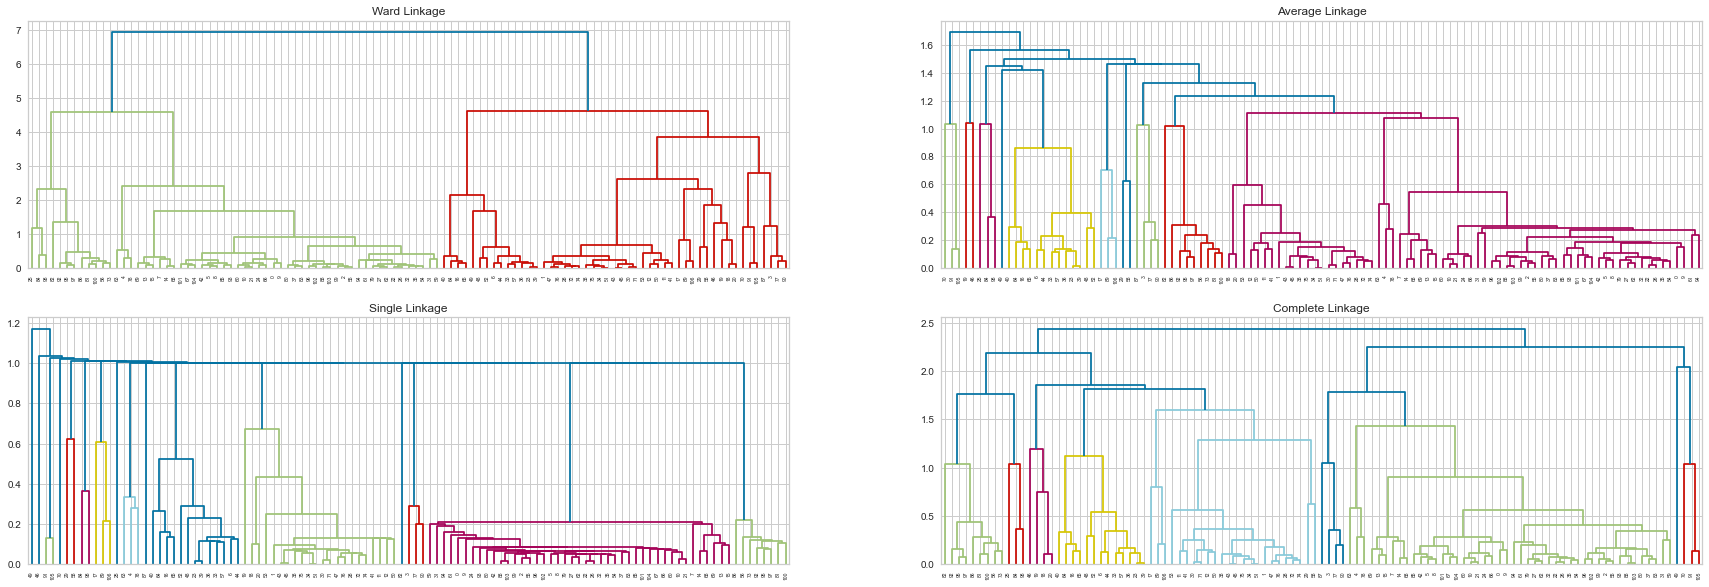

In [40]:
import scipy.cluster.hierarchy as shc
rows = 2
columns = 2
figure = plt.figure(figsize=(30, 10))  
figure.add_subplot(rows, columns, 1)
plt.title("Ward Linkage")  
shc.dendrogram(shc.linkage(data_scaled, method='ward'))
figure.add_subplot(rows, columns, 2)
plt.title("Average Linkage")  
shc.dendrogram(shc.linkage(data_scaled, method='average'))
figure.add_subplot(rows, columns, 3)
plt.title("Single Linkage")  
shc.dendrogram(shc.linkage(data_scaled, method='single'))
figure.add_subplot(rows, columns, 4)
plt.title("Complete Linkage")  
shc.dendrogram(shc.linkage(data_scaled, method='complete'))
figure.savefig('DendogramsElecVehC1.png', dpi=300, bbox_inches='tight')


## Applying Hierarchical clustering for the clusters

In [41]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward') 
team_models = cluster.fit_predict(data_scaled)


View Cluster

Evaluating Quality of cluster with Shilhoute Score


### <a name="UseCaseCClusterUnderstanding">4.2 Feature Selection and Understanding Clusters</a> 
[Back to Table of Contents](#table)

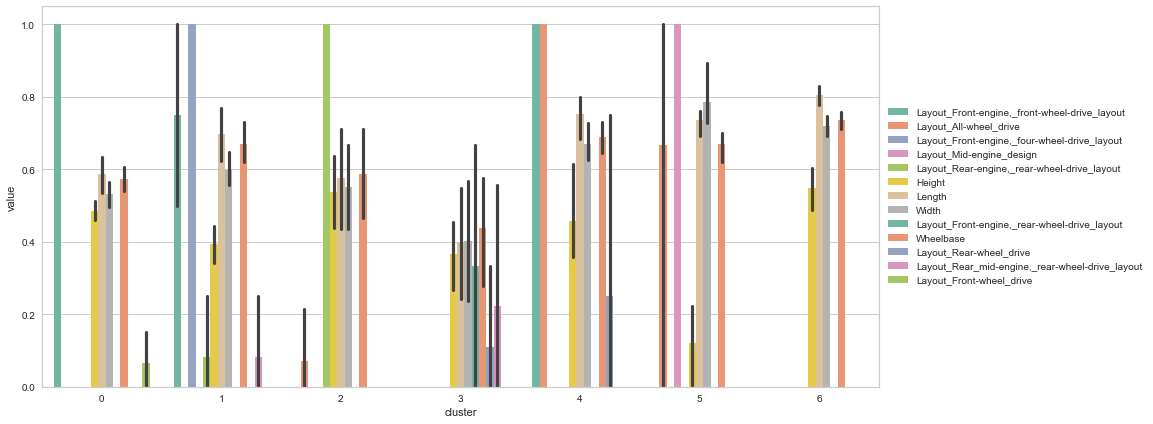

In [42]:
# Grouping rows of data based on Hierarchical cluster
cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')  
team_models = cluster.fit_predict(data_scaled)
minMaxscaler = MinMaxScaler()
scaledDataFrame = pd.DataFrame(minMaxscaler.fit_transform(df1_electric_vehicles))
scaledDataFrame.columns = df1_electric_vehicles.columns
scaledDataFrame['cluster'] = cluster.labels_
# Largest standard deviation likely to have largest importance
meansDataFrame = scaledDataFrame.groupby('cluster').mean().reset_index()
#print("meansDataFrame is: ",meansDataFrame)
variablesDeviations = pd.DataFrame(columns=['Vars', 'Deviation'])
i = 0
while i < len(meansDataFrame.columns[1:]):
    variablesDeviations.loc[len(variablesDeviations), :] = [meansDataFrame.columns[1:][i], np.std(meansDataFrame[meansDataFrame.columns[1:][i]])]
    i+=1
includedColumns = list(variablesDeviations.sort_values('Deviation', ascending=False).head(15).Vars.values) + ['cluster']
finalData = scaledDataFrame[includedColumns].melt(id_vars='cluster')
figure, axix = plt.subplots(figsize=(15, 7))
sns.barplot(x='cluster', y='value', hue='variable', data=finalData, palette='Set2')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("clustersFromElectronicVehiclesC.jpg", dpi=300)

##### Visualizing the clusters


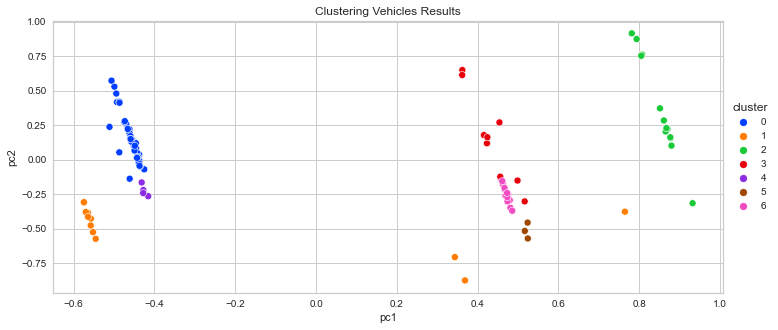

In [43]:
from sklearn.decomposition import PCA
fig, (sub1) = plt.subplots(1, figsize=(12, 5))
pca_vehicle_data = PCA(n_components=2)
principalComponents_vehicles = pca_vehicle_data.fit_transform(data_scaled)
sns.scatterplot(x=principalComponents_vehicles[:,0], y=principalComponents_vehicles[:,1], hue=team_models, palette='bright',ax=sub1);
sub1.set(xlabel="pc1", ylabel="pc2", title="Clustering Vehicles Results")
sub1.legend(title='cluster',loc='center left', bbox_to_anchor=(1, 0.5))
fig.savefig('PCAElecVehC1.png', dpi=300, bbox_inches='tight')


### <a name="UseCaseCSilhoutteResults">4.3 Analysing Cluster Results with Different linkage criteria and number of clusters</a> 
[Back to Table of Contents](#table)

In [44]:
sil_scores = []
dav_scores = []
calin_scores = []
n_clusters = []

for i in range(2,17):
    cluster1 = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')  
    team_models1 = cluster1.fit_predict(data_scaled)
    hierarchical_clustering = pd.DataFrame(team_models1)
    dav_scores.append(davies_bouldin_score(data_scaled,hierarchical_clustering[0]))
    sil_scores.append(silhouette_score(data_scaled,hierarchical_clustering[0],metric='euclidean'))
    calin_scores.append(calinski_harabasz_score(data_scaled,hierarchical_clustering[0]))
    n_clusters.append(i)    
hierarchicial_clustering_results_df = {'Num Clusters': n_clusters,'Silhouette Score': sil_scores, 'Davies Bouldin Score': dav_scores,'Calinski Harabasz Score': calin_scores}  
df_measures = pd.DataFrame(hierarchicial_clustering_results_df)  
print(df_measures.to_latex())


\begin{tabular}{lrrrr}
\toprule
{} &  Num Clusters &  Silhouette Score &  Davies Bouldin Score &  Calinski Harabasz Score \\
\midrule
0  &             2 &          0.370212 &              1.360221 &                43.077094 \\
1  &             3 &          0.417292 &              1.249351 &                37.749771 \\
2  &             4 &          0.480332 &              1.064610 &                41.751764 \\
3  &             5 &          0.518336 &              1.055750 &                44.969848 \\
4  &             6 &          0.542449 &              0.799532 &                44.083592 \\
5  &             7 &          0.543554 &              1.026160 &                44.412519 \\
6  &             8 &          0.567932 &              0.973531 &                45.376775 \\
7  &             9 &          0.594619 &              0.945951 &                47.573116 \\
8  &            10 &          0.613747 &              0.817901 &                51.814862 \\
9  &            11 &         

In [45]:

cluster1 = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')  
team_models1 = cluster1.fit_predict(data_scaled)
hierarchical_clustering1 = pd.DataFrame(team_models1)
davies_bouldin_score1 = davies_bouldin_score(data_scaled,hierarchical_clustering1[0])
silhouette_score1 = silhouette_score(data_scaled,hierarchical_clustering1[0],metric='euclidean')
calinski_harabasz_score1 = calinski_harabasz_score(data_scaled,hierarchical_clustering1[0])


cluster2 = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='average')  
team_models2 = cluster2.fit_predict(data_scaled)
hierarchical_clustering2 = pd.DataFrame(team_models2)
davies_bouldin_score2 = davies_bouldin_score(data_scaled,hierarchical_clustering2[0])
silhouette_score2 = silhouette_score(data_scaled,hierarchical_clustering2[0],metric='euclidean')
calinski_harabasz_score2 = calinski_harabasz_score(data_scaled,hierarchical_clustering2[0])

cluster3 = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='complete')  
team_models3 = cluster3.fit_predict(data_scaled)
hierarchical_clustering3 = pd.DataFrame(team_models3)
davies_bouldin_score3 = davies_bouldin_score(data_scaled,hierarchical_clustering3[0])
silhouette_score3 = silhouette_score(data_scaled,hierarchical_clustering3[0],metric='euclidean')
calinski_harabasz_score3 = calinski_harabasz_score(data_scaled,hierarchical_clustering3[0])

cluster4 = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='single') 
team_models4 = cluster4.fit_predict(data_scaled)
hierarchical_clustering4 = pd.DataFrame(team_models4)
davies_bouldin_score4 = davies_bouldin_score(data_scaled,hierarchical_clustering4[0])
silhouette_score4 = silhouette_score(data_scaled,hierarchical_clustering4[0],metric='euclidean')
calinski_harabasz_score4 = calinski_harabasz_score(data_scaled,hierarchical_clustering4[0])

hierarchicial_clustering_results_df = {'Linkage Type': ['Ward','Average','Complete','Single'],'Silhouette Score': [silhouette_score1,silhouette_score2,silhouette_score3,silhouette_score4], 'Davies Bouldin Score': [davies_bouldin_score1, davies_bouldin_score2, davies_bouldin_score3, davies_bouldin_score4],'Calinski Harabasz Score': [calinski_harabasz_score1, calinski_harabasz_score2, calinski_harabasz_score3, calinski_harabasz_score4]}  
df_measures = pd.DataFrame(hierarchicial_clustering_results_df)  
print(df_measures.to_latex())


\begin{tabular}{llrrr}
\toprule
{} & Linkage Type &  Silhouette Score &  Davies Bouldin Score &  Calinski Harabasz Score \\
\midrule
0 &         Ward &          0.543554 &              1.026160 &                44.412519 \\
1 &      Average &          0.387264 &              0.815233 &                14.430012 \\
2 &     Complete &          0.508646 &              0.794559 &                36.662021 \\
3 &       Single &          0.218763 &              0.669474 &                 4.213754 \\
\bottomrule
\end{tabular}



#### Determining the number of clusters for K-means Algorithm using Silhouette Visualizer

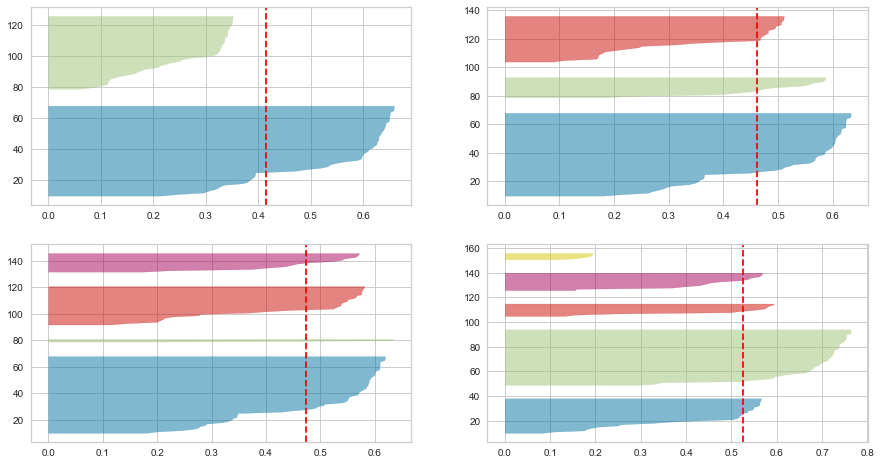

In [46]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data_scaled)

#### Criteria for DBSCAN

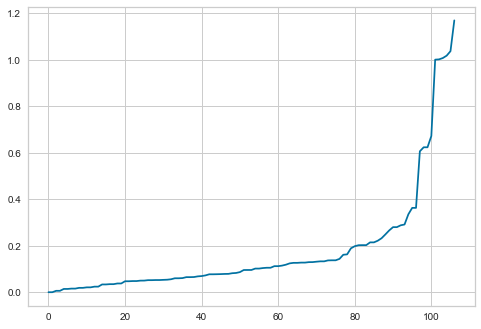

In [47]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(data_scaled)
distances, indices = nbrs.kneighbors(data_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

#### Comparing the cell types

In [48]:
#Hierarchical clustering, K-means clustering with cosine k-means, .....
kmeans_norm = KMeans(n_clusters=4).fit(data_scaled)
dbs_data = DBSCAN(eps=0.4, min_samples=2).fit(data_scaled)

silhouette_score1 = silhouette_score(data_scaled, hierarchical_clustering1[0],metric='euclidean')
silhouette_score2 = silhouette_score(data_scaled, kmeans_norm.labels_, metric='euclidean')
silhouette_score3 = silhouette_score(data_scaled, kmeans_norm.labels_, metric='cosine')
silhouette_score4 = silhouette_score(data_scaled, dbs_data.labels_)

davies_bouldin_score1 = davies_bouldin_score(data_scaled,hierarchical_clustering1[0])
davies_bouldin_score2 = davies_bouldin_score(data_scaled,kmeans_norm.labels_)
davies_bouldin_score3 = davies_bouldin_score(data_scaled,kmeans_norm.labels_)
davies_bouldin_score4 = davies_bouldin_score(data_scaled,dbs_data.labels_)

calinski_harabasz_score1 = calinski_harabasz_score(data_scaled,hierarchical_clustering1[0])
calinski_harabasz_score2 = calinski_harabasz_score(data_scaled,kmeans_norm.labels_)
calinski_harabasz_score3 = calinski_harabasz_score(data_scaled,kmeans_norm.labels_)
calinski_harabasz_score4 = calinski_harabasz_score(data_scaled,dbs_data.labels_)

clustering_results_df = {'Linkage Type': ['Agglomerative Hierarchical clustering(linkage = Average)','Kmeans','Cosine Based Kmeans','DBSCAN'],'Silhouette Score': [silhouette_score1,silhouette_score2,silhouette_score3,silhouette_score4], 'Davies Bouldin Score': [davies_bouldin_score1, davies_bouldin_score2, davies_bouldin_score3, davies_bouldin_score4],'Calinski Harabasz Score': [calinski_harabasz_score1, calinski_harabasz_score2, calinski_harabasz_score3, calinski_harabasz_score4]}  
df_of_results = pd.DataFrame(clustering_results_df)  
print(df_of_results.to_latex())





\begin{tabular}{llrrr}
\toprule
{} &                                       Linkage Type &  Silhouette Score &  Davies Bouldin Score &  Calinski Harabasz Score \\
\midrule
0 &  Agglomerative Hierarchical clustering(linkage ... &          0.543554 &              1.026160 &                44.412519 \\
1 &                                             Kmeans &          0.489479 &              0.924259 &                48.444141 \\
2 &                                Cosine Based Kmeans &          0.625580 &              0.924259 &                48.444141 \\
3 &                                             DBSCAN &          0.601936 &              1.421436 &                28.176424 \\
\bottomrule
\end{tabular}



#### Cluster Rules Table

In [49]:
dct_of_clusters = {"cluster numbers":[1,2,3,4,5,6,7],"cluster descriptions": ["Vehicles with Layout_Front-engine,_front-wheel-drive_layout",
        "Vehicles with Layout_Front-engine,_front-wheel-drive_layout and length > 4.397429943084717 ",
        "Vehicles with Layout_Rear-engine,_rear-wheel-drive_layout",
        "Vehicles smaller in length than 4.397429943084717",
        "Vehicles with Layout_Front-engine,_front-wheel-drive_layout and Layout_All-wheel_drive ",
        "Vehicles with a length bigger than 4.4m and a lyout mid engine design",
        "Vehicles with a length bigger than 4.4m  and a height bigger than 1.46"]}
df_of_results = pd.DataFrame(dct_of_clusters)  
print(df_of_results.to_latex())

\begin{tabular}{lrl}
\toprule
{} &  cluster numbers &                               cluster descriptions \\
\midrule
0 &                1 &  Vehicles with Layout\_Front-engine,\_front-wheel... \\
1 &                2 &  Vehicles with Layout\_Front-engine,\_front-wheel... \\
2 &                3 &  Vehicles with Layout\_Rear-engine,\_rear-wheel-d... \\
3 &                4 &  Vehicles smaller in length than 4.397429943084717 \\
4 &                5 &  Vehicles with Layout\_Front-engine,\_front-wheel... \\
5 &                6 &  Vehicles with a length bigger than 4.4m and a ... \\
6 &                7 &  Vehicles with a length bigger than 4.4m  and a... \\
\bottomrule
\end{tabular}



### <a name="UseCaseCVisualization">4.4 Visualization of clusters for use case C</a> 
[Back to Table of Contents](#table)


In [50]:
import io
import sys
import folium
from PyQt5 import QtCore, QtGui, QtWidgets
from PyQt5.QtWebEngineWidgets import QWebEngineView 
from PyQt5.QtWebEngineWidgets import QWebEngineSettings as QWebSettings
from folium import IFrame
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import collections, numpy
from matplotlib import animation
from pyclustertend import hopkins
from scipy import stats
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans, DBSCAN
from sklearn import preprocessing
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import folium

class Window(QtWidgets.QMainWindow):
    def __init__(self,dataset):
        self._dataset = dataset
        self._df_including_cordinates = self._dataset.copy()
        self._dataset.drop('Longitude', inplace=True, axis=1)
        self._dataset.drop('Latitude', inplace=True, axis=1)
        self._dataset.drop('Name', inplace=True, axis=1)
        super().__init__()
        self.initWindow()

    def initWindow(self):
        self.setWindowTitle(self.tr("Clustering of electronic vehicles by area served"))
        self.setFixedSize(1500, 800)
        self.comboBox1 = QtWidgets.QComboBox(self)
        self.editField2 = QtWidgets.QLineEdit(self)
        self.editField3 = QtWidgets.QLineEdit(self)
        self.editField4 = QtWidgets.QLineEdit(self)
        self.editField6 = QtWidgets.QLineEdit(self)
        self.label5 = QtWidgets.QLabel('red',self)
        self.label5.setHidden(True)
        self.m = folium.Map(location=[51.5074, 0.1278], zoom_start=6)
        self.buttonUI()

    def buttonUI(self):
        submitButton = QtWidgets.QPushButton(self.tr("Submit"))
        submitButton.clicked.connect(self.calculateClusterPressed)
        self.editField2.setFixedSize(120, 50)
        self.editField3.setFixedSize(120, 50)
        self.editField4.setFixedSize(120, 50)
        self.editField6.setFixedSize(120, 50)
        submitButton.move(20, 260)
        label1 = QtWidgets.QLabel(self)
        label1.setText("Layout:")
        label1.setFixedSize(120, 50)
        self.comboBox1.setFixedSize(120, 50)
        self.comboBox1.addItem("Layout_Front-engine,_front-wheel-drive_layout")
        self.comboBox1.addItem("Layout_Rear-wheel_drive")
        self.comboBox1.addItem("Layout_Mid-engine_design")
        self.comboBox1.addItem("Layout_Front-engine,_rear-wheel-drive_layout")
        self.comboBox1.addItem("Layout_Front-wheel_drive")
        self.comboBox1.addItem("Layout_All-wheel_drive")
        self.comboBox1.addItem("Layout_Rear-engine,_rear-wheel-drive_layout")
        self.comboBox1.addItem("Layout_Front-engine,_four-wheel-drive_layout")
        self.comboBox1.addItem("Layout_Rear_mid-engine,_rear-wheel-drive_layout")
        label2 = QtWidgets.QLabel(self)
        label2.setText("Wheelbase:")
        label2.setFixedSize(120, 50)
        label3 = QtWidgets.QLabel(self)
        label3.setText("Height:")
        label3.setFixedSize(120, 50)
        label4 = QtWidgets.QLabel(self)
        label4.setText("Width:")
        label4.setFixedSize(120, 50)    
        label6 = QtWidgets.QLabel(self)
        label6.setText("Length:")
        label6.setFixedSize(120, 50)    
        self.label5.setText("Data is an outlier")
        self.label5.setFixedSize(120, 50)
        self.label5.setStyleSheet("background-color: red")
        self.view = QWebEngineView()
        self.view.setContentsMargins(50, 50, 50, 50)
        central_widget = QtWidgets.QWidget()
        self.setCentralWidget(central_widget)
        lay = QtWidgets.QHBoxLayout(central_widget)
        button_container = QtWidgets.QWidget()
        vlay = QtWidgets.QVBoxLayout(button_container)
        vlay.setSpacing(20)
        vlay.addStretch()
        vlay.addWidget(label1)
        vlay.addWidget(self.comboBox1)
        vlay.addWidget(label2)
        vlay.addWidget(self.editField2)
        vlay.addWidget(label3)
        vlay.addWidget(self.editField3)
        vlay.addWidget(label4)
        vlay.addWidget(self.editField4)
        vlay.addWidget(label6)
        vlay.addWidget(self.editField6)
        vlay.addWidget(submitButton)
        vlay.addWidget(self.label5)
        vlay.addStretch()
        lay.addWidget(button_container)
        lay.addWidget(self.view, stretch=1)
        data = io.BytesIO()
        self.m.save(data, close_file=False)
        self.view.setHtml(data.getvalue().decode())
    
    def calculateClusterPressed(self):
        layout = str(self.comboBox1.currentText())
        layout_front_engine_front_wheel = 0.0
        layout_rear_wheel_drive = 0.0
        layout_mid_engine_design = 0.0
        layout_front_engine_real_wheel_drive = 0.0
        layout_front_wheel_drive = 0.0
        layout_all_wheel_drive = 0.0
        layout_rear_engine_rear_wheel_drive_layout = 0.0
        layout_front_engine_four_wheel_drive_layout = 0.0
        layout_rear_mid_engine_rear_wheel_drive_layout = 0.0
        if layout == "Layout_Front-engine,_front-wheel-drive_layout":
            layout_front_engine_front_wheel = 1.0
        elif layout == "Layout_Rear-wheel_drive":
            layout_rear_wheel_drive = 1.0
        elif layout == "Layout_Mid-engine_design":
            layout_mid_engine_design = 1.0
        elif layout == "Layout_Front-engine,_rear-wheel-drive_layout":
            layout_front_engine_real_wheel_drive = 1.0
        elif layout == "Layout_Front-wheel_drive":
            layout_front_wheel_drive = 1.0
        elif layout == "Layout_All-wheel_drive":
            layout_all_wheel_drive = 1.0
        elif layout == "Layout_Rear-engine,_rear-wheel-drive_layout":
            layout_rear_engine_rear_wheel_drive_layout = 1.0
        elif layout == "Layout_Front-engine,_four-wheel-drive_layout":
            layout_front_engine_four_wheel_drive_layout = 1.0          
        elif layout == "Layout_Rear_mid-engine,_rear-wheel-drive_layout":
            layout_rear_mid_engine_rear_wheel_drive_layout = 1.0
        insertData = {"Wheelbase":float(self.editField2.text()),"Height":float(self.editField3.text()),"Width":float(self.editField4.text()),"Length":float(self.editField6.text()),
                     "Layout_Front-engine,_front-wheel-drive_layout":layout_front_engine_front_wheel,
                    "Layout_Rear-wheel_drive": layout_rear_wheel_drive,
                    "Layout_Mid-engine_design": layout_mid_engine_design,
                    "Layout_Front-engine,_rear-wheel-drive_layout": layout_front_engine_real_wheel_drive,
                    "Layout_Front-wheel_drive": layout_front_wheel_drive,
                    "Layout_All-wheel_drive": layout_all_wheel_drive,
                    "Layout_Rear-engine,_rear-wheel-drive_layout": layout_rear_engine_rear_wheel_drive_layout,
                    "Layout_Front-engine,_four-wheel-drive_layout": layout_front_engine_four_wheel_drive_layout,
                    "Layout_Rear_mid-engine,_rear-wheel-drive_layout": layout_rear_mid_engine_rear_wheel_drive_layout}  

        self._dataset = self._dataset.append(insertData, ignore_index=True)
        scaler = MinMaxScaler()
        data_scaled = pd.DataFrame(scaler.fit_transform(self._dataset), columns=self._dataset.columns)
        cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward') 
        team_models = cluster.fit_predict(data_scaled)
        hierarchical_clustering = pd.DataFrame(team_models)
        dct_of_colour =  {0:"red", 1:"green", 2:"blue", 3:"purple", 4:"orange",5:"grey",6:"yellow"}
        new_item_cluster = team_models[-1]
        if np.count_nonzero(team_models == new_item_cluster) == 1:
            self.label5.setHidden(False)            
        else:
            self.label5.setHidden(True)
            i = 0
            for index, row in self._df_including_cordinates.iterrows():
                if hierarchical_clustering[0][i] == team_models[-1]:
                    html="""
                    <h1>""" + row['Name'] + """'s data</h1><br>
                    <p>
                    </p>
                    <b> Vehicle Name: </b> """ + row['Name'] + """ <br>
                    <b> Width: </b> """ + str(row['Width']) + """ <br>
                    <b> Height: </b> """ + str(row['Height']) + """ <br>
                    <b> Length: </b> """ + str(row['Length']) + """ <br>
                    <b> Wheelbase: </b> """ + str(row['Wheelbase']) + """ <br>
                    """
                    frame = IFrame(html=html, width=500, height=300)
                    pop_text = folium.Popup(frame, max_width=2650)
                    folium.Marker(
                    [row['Latitude'], row['Longitude']], 
                    popup = pop_text, 
                    icon=folium.Icon(color = dct_of_colour[hierarchical_clustering[0][i]], icon="fa-futbol"),
                    ).add_to(self.m)
                i += 1
                self.m
                data = io.BytesIO()
                self.m.save(data, close_file=False)
                self.view.setHtml(data.getvalue().decode())
        
if __name__ == "__main__":
    electrical_cars_df = pd.read_excel("electronic_vehicles_final.xlsx", sheet_name="Sheet1")
    df1_electrical_cars = edit_data_frame_with_columns(['Name','Latitude','Longitude','Layout', 'Wheelbase', 'Height', 'Width', 'Length'],electrical_cars_df)
    App = QtCore.QCoreApplication.instance()
    if App is None:
        App = QtWidgets.QApplication(sys.argv)
    window = Window(df1_electrical_cars)
    window.show()
    sys.exit(App.exec())


SystemExit: 0

/Users/colmclery/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3445: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)




### <a name="UseCaseCTimeExperiment">4.5 Experimenting Time To Load Cluster items</a> 
[Back to Table of Contents](#table)

In [ ]:
import time

num_clusters = 7
affin = 'euclidean'
link = 'ward'
electrical_cars_df = pd.read_excel("electronic_vehicles_final.xlsx", sheet_name="Sheet1")
electrical_cars_df =  edit_data_frame_with_columns(['Name','Latitude','Longitude','Layout', 'Wheelbase', 'Height', 'Width', 'Length'],electrical_cars_df)
df1_electric_vehicles = electrical_cars_df.copy()
electrical_cars_df.drop('Longitude', inplace=True, axis=1)
electrical_cars_df.drop('Latitude', inplace=True, axis=1)
electrical_cars_df.drop('Name', inplace=True, axis=1)
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(electrical_cars_df), columns=electrical_cars_df.columns)
cluster = AgglomerativeClustering(n_clusters=num_clusters, affinity=affin, linkage=link) 
team_models = cluster.fit_predict(data_scaled)
hierarchical_clustering = pd.DataFrame(team_models)
data_scaled.insert((data_scaled.shape[1]),'agglomerative',hierarchical_clustering)
dct_of_colour =  {0:"red", 1:"green", 2:"blue", 3:"purple", 4:"orange",5:"grey",6:"yellow"}
times_dct = {"Cluster ID":[],"Number Of Vehicles":[],"Time To Load":[],}
m = folium.Map(location=[51.5074, 0.1278], zoom_start=6)
cluster_id = 0
for cluster in range(num_clusters):
    i = 0
    t1 = time.time()
    count_per_cluster = 0
    for index, row in df1_electric_vehicles.iterrows():
        if team_models[i] == cluster_id:
            count_per_cluster += 1
            html="""
            <h1>""" + row['Name'] + """'s data</h1><br>
            <p>
             This electronic vehicles is in the following cluster 
            </p>
             <b> Vehicle Name: </b> """ + row['Name'] + """ <br>
            <b> Width: </b> """ + str(row['Width']) + """ <br>
            <b> Height: </b> """ + str(row['Height']) + """ <br>
            <b> Length: </b> """ + str(row['Length']) + """ <br>
            <b> Wheelbase: </b> """ + str(row['Wheelbase']) + """ <br>
            """
            frame = IFrame(html=html, width=500, height=300)
            pop_text = folium.Popup(frame, max_width=2650)
            folium.Marker(
            [row['Latitude'], row['Longitude']], 
            popup = pop_text, 
            icon=folium.Icon(color = dct_of_colour[hierarchical_clustering[0][i]],),
            ).add_to(m)
        i += 1
    t2 = time.time()
    times_dct["Time To Load"].append(t2 - t1)
    cluster_id+=1
    times_dct["Number Of Vehicles"].append(count_per_cluster)
    times_dct["Cluster ID"].append(cluster_id)
df = pd.DataFrame(times_dct)
print(df.to_latex())
data = io.BytesIO()
m.save(data, close_file=False)
m





## <a name="UseCaseD">5. Use Case D: Clustering of Electric Vehicle Data for Automobile Owners and Manufacturers to find vehicles with equipment </a>

### <a name="UseCaseDFeatureSelection">5.1. FeatureSelection</a> 
[Back to Table of Contents](#table)

In [51]:
electrical_cars_df = pd.read_excel("electronic_vehicles_final.xlsx", sheet_name="Sheet1")
print(find_best_features( [ 'Doors', 'Width', 'Length','Wheelbase'],4,electrical_cars_df,True))

(['Doors', 'Wheelbase', 'Width', 'Length'], 'single', 3, 0.672099551094515)


In [52]:
electrical_cars_df = pd.read_excel("electronic_vehicles_final.xlsx", sheet_name="Sheet1")
electrical_cars_df = edit_data_frame_with_columns(['Doors', 'Wheelbase', 'Width', 'Length'],electrical_cars_df)
df1_electric_vehicles = electrical_cars_df
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(df1_electric_vehicles), columns=df1_electric_vehicles.columns)
data_scaled.head()

,Wheelbase,Length,Width,Doors_Butterfly_doors,Doors_Gull-wing_door
0,0.528006,0.496691,0.491054,0.0,0.0
1,0.700192,0.754909,0.527833,0.0,0.0
2,0.660636,0.752241,0.597416,0.0,0.0
3,0.736407,0.770331,0.712445,0.0,0.0
4,0.788612,0.861636,0.671968,0.0,0.0


##### Identifying and removing outliers

In [53]:
data_scaled[(np.abs(stats.zscore(data_scaled)) < 3).all(axis=1)]

,Wheelbase,Length,Width,Doors_Butterfly_doors,Doors_Gull-wing_door
0,0.528006,0.496691,0.491054,0.0,0.0
1,0.700192,0.754909,0.527833,0.0,0.0
2,0.660636,0.752241,0.597416,0.0,0.0
3,0.736407,0.770331,0.712445,0.0,0.0
4,0.788612,0.861636,0.671968,0.0,0.0
...,...,...,...,...,...
123,0.623871,0.637511,0.551690,0.0,0.0
124,0.530333,0.577033,0.502982,0.0,0.0
125,0.724586,0.804970,0.548330,0.0,0.0
126,0.653655,0.759356,0.532803,0.0,0.0


##### Testing to determine the clustering tendency of a data set.

In [54]:

hopkins(df1_electric_vehicles,len(df1_electric_vehicles))


0.09235449784928157

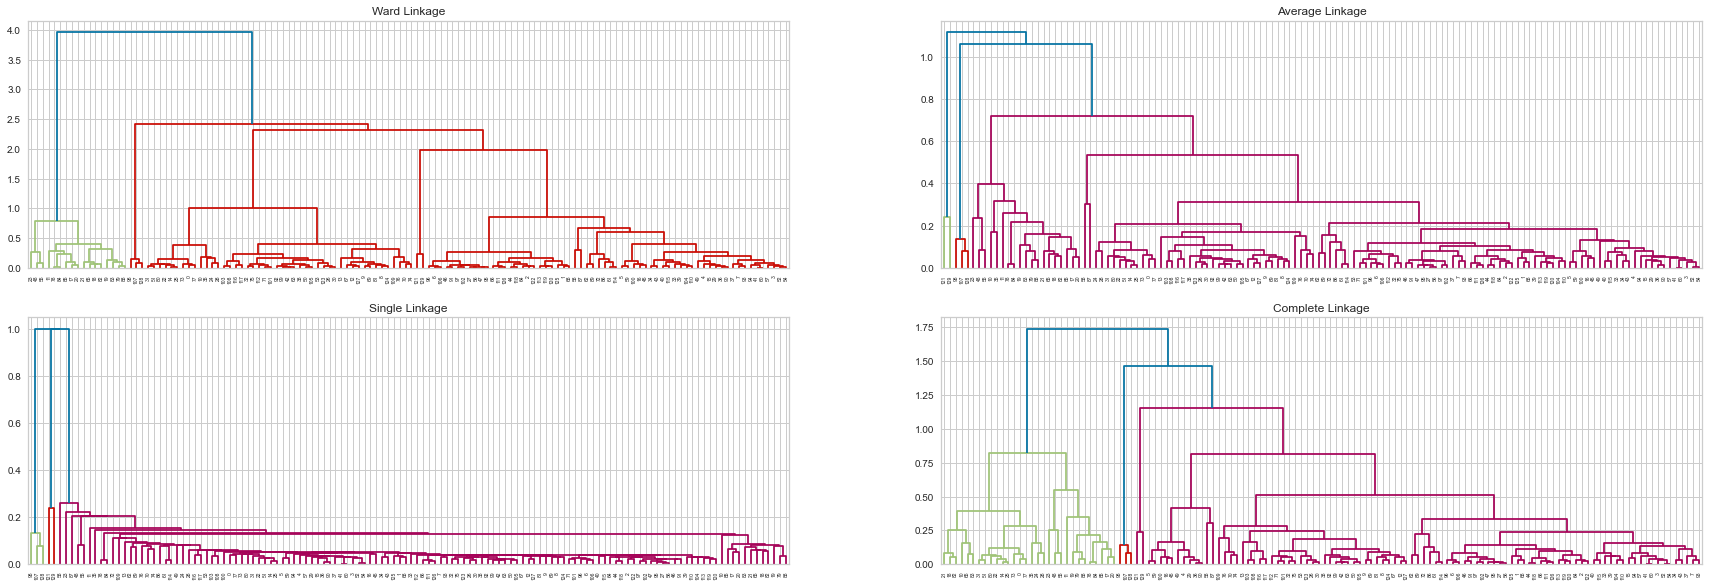

In [55]:
import scipy.cluster.hierarchy as shc
rows = 2
columns = 2
figure = plt.figure(figsize=(30, 10))  
figure.add_subplot(rows, columns, 1)
plt.title("Ward Linkage")  
shc.dendrogram(shc.linkage(data_scaled, method='ward'))
figure.add_subplot(rows, columns, 2)
plt.title("Average Linkage")  
shc.dendrogram(shc.linkage(data_scaled, method='average'))
figure.add_subplot(rows, columns, 3)
plt.title("Single Linkage")  
shc.dendrogram(shc.linkage(data_scaled, method='single'))
figure.add_subplot(rows, columns, 4)
plt.title("Complete Linkage")  
shc.dendrogram(shc.linkage(data_scaled, method='complete'))
figure.savefig('DendogramsElecVehD1.png', dpi=300, bbox_inches='tight')

## Applying Hierarchical clustering for the clusters

In [56]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='cosine', linkage='single') 
team_models = cluster.fit_predict(data_scaled)

Evaluating Quality of cluster with Shilhoute Score


### <a name="UseCaseDClusterUnderstanding">5.2 Feature Selection and Understanding Clusters</a> 
[Back to Table of Contents](#table)

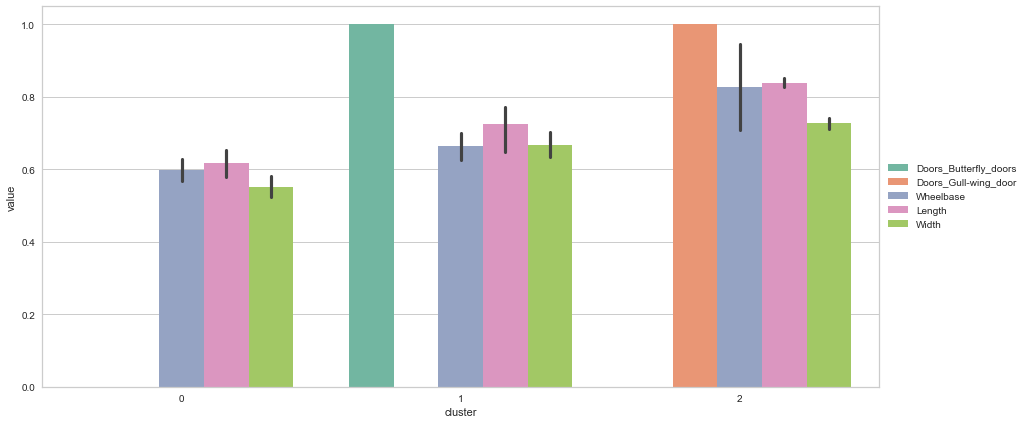

In [57]:
# Grouping rows of data based on Hierarchical cluster
cluster = AgglomerativeClustering(n_clusters=3, affinity='cosine', linkage='single')  
team_models = cluster.fit_predict(data_scaled)
minMaxscaler = MinMaxScaler()
scaledDataFrame = pd.DataFrame(minMaxscaler.fit_transform(df1_electric_vehicles))
scaledDataFrame.columns = df1_electric_vehicles.columns
scaledDataFrame['cluster'] = cluster.labels_
meansDataFrame = scaledDataFrame.groupby('cluster').mean().reset_index()
variablesDeviations = pd.DataFrame(columns=['Vars', 'Deviation'])
i = 0
while i < len(meansDataFrame.columns[1:]):
    variablesDeviations.loc[len(variablesDeviations), :] = [meansDataFrame.columns[1:][i], np.std(meansDataFrame[meansDataFrame.columns[1:][i]])]
    i+=1
includedColumns = list(variablesDeviations.sort_values('Deviation', ascending=False).head(20).Vars.values) + ['cluster']
finalData = scaledDataFrame[includedColumns].melt(id_vars='cluster')
figure, axix = plt.subplots(figsize=(15, 7))
sns.barplot(x='cluster', y='value', hue='variable', data=finalData, palette='Set2')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("clustersFromElectronicVehiclesD.jpg", dpi=300)

##### Visualizing the clusters


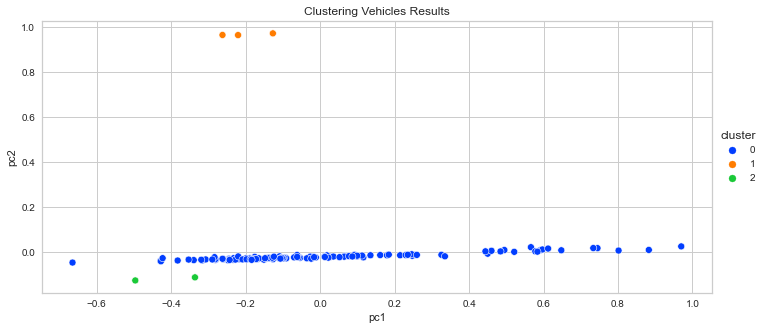

In [58]:
from sklearn.decomposition import PCA
fig, (sub1) = plt.subplots(1, figsize=(12, 5))
pca_vehicle_data = PCA(n_components=2)
principalComponents_vehicles = pca_vehicle_data.fit_transform(data_scaled)
sns.scatterplot(x=principalComponents_vehicles[:,0], y=principalComponents_vehicles[:,1], hue=team_models, palette='bright',ax=sub1);
sub1.set(xlabel="pc1", ylabel="pc2", title="Clustering Vehicles Results")
sub1.legend(title='cluster',loc='center left', bbox_to_anchor=(1, 0.5))
fig.savefig('PCAElecVehD1.png', dpi=300, bbox_inches='tight')


### <a name="UseCaseDSilhoutteResults">5.3 Analysing Cluster Results with Different linkage criteria and number of clusters</a> 
[Back to Table of Contents](#table)

In [59]:
sil_scores = []
dav_scores = []
calin_scores = []
n_clusters = []

for i in range(2,17):
    cluster1 = AgglomerativeClustering(n_clusters=i, affinity='cosine', linkage='single')  
    team_models1 = cluster1.fit_predict(data_scaled)
    hierarchical_clustering = pd.DataFrame(team_models1)
    dav_scores.append(davies_bouldin_score(data_scaled,hierarchical_clustering[0]))
    sil_scores.append(silhouette_score(data_scaled,hierarchical_clustering[0],metric='euclidean'))
    calin_scores.append(calinski_harabasz_score(data_scaled,hierarchical_clustering[0]))
    n_clusters.append(i)

hierarchicial_clustering_results_df = {'Num Clusters': n_clusters,'Silhouette Score': sil_scores, 'Davies Bouldin Score': dav_scores,'Calinski Harabasz Score': calin_scores}  
df_measures = pd.DataFrame(hierarchicial_clustering_results_df)  
print(df_measures.to_latex())


\begin{tabular}{lrrrr}
\toprule
{} &  Num Clusters &  Silhouette Score &  Davies Bouldin Score &  Calinski Harabasz Score \\
\midrule
0  &             2 &          0.653654 &              0.331227 &                25.620038 \\
1  &             3 &          0.672100 &              0.341001 &                25.958783 \\
2  &             4 &          0.546177 &              0.314716 &                21.852539 \\
3  &             5 &          0.533881 &              0.300243 &                19.724036 \\
4  &             6 &          0.441447 &              0.311976 &                17.238833 \\
5  &             7 &          0.448733 &              0.300012 &                16.630465 \\
6  &             8 &          0.259308 &              0.352720 &                14.703193 \\
7  &             9 &          0.247264 &              0.324814 &                12.841675 \\
8  &            10 &          0.289831 &              0.307213 &                16.240987 \\
9  &            11 &         

In [60]:
cluster1 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
team_models1 = cluster1.fit_predict(data_scaled)
hierarchical_clustering1 = pd.DataFrame(team_models1)
davies_bouldin_score1 = davies_bouldin_score(data_scaled,hierarchical_clustering1[0])
silhouette_score1 = silhouette_score(data_scaled,hierarchical_clustering1[0],metric='euclidean')
calinski_harabasz_score1 = calinski_harabasz_score(data_scaled,hierarchical_clustering1[0])

cluster2 = AgglomerativeClustering(n_clusters=3, affinity='cosine', linkage='average')  
team_models2 = cluster2.fit_predict(data_scaled)
hierarchical_clustering2 = pd.DataFrame(team_models2)
davies_bouldin_score2 = davies_bouldin_score(data_scaled,hierarchical_clustering2[0])
silhouette_score2 = silhouette_score(data_scaled,hierarchical_clustering2[0],metric='euclidean')
calinski_harabasz_score2 = calinski_harabasz_score(data_scaled,hierarchical_clustering2[0])

cluster3 = AgglomerativeClustering(n_clusters=3, affinity='cosine', linkage='complete')  
team_models3 = cluster3.fit_predict(data_scaled)
hierarchical_clustering3 = pd.DataFrame(team_models3)
davies_bouldin_score3 = davies_bouldin_score(data_scaled,hierarchical_clustering3[0])
silhouette_score3 = silhouette_score(data_scaled,hierarchical_clustering3[0],metric='euclidean')
calinski_harabasz_score3 = calinski_harabasz_score(data_scaled,hierarchical_clustering3[0])

cluster4 = AgglomerativeClustering(n_clusters=3, affinity='cosine', linkage='single') 
team_models4 = cluster4.fit_predict(data_scaled)
hierarchical_clustering4 = pd.DataFrame(team_models4)
davies_bouldin_score4 = davies_bouldin_score(data_scaled,hierarchical_clustering4[0])
silhouette_score4 = silhouette_score(data_scaled,hierarchical_clustering4[0],metric='euclidean')
calinski_harabasz_score4 = calinski_harabasz_score(data_scaled,hierarchical_clustering4[0])

hierarchicial_clustering_results_df = {'Linkage Type': ['Ward','Average','Complete','Single'],'Silhouette Score': [silhouette_score1,silhouette_score2,silhouette_score3,silhouette_score4], 'Davies Bouldin Score': [davies_bouldin_score1, davies_bouldin_score2, davies_bouldin_score3, davies_bouldin_score4],'Calinski Harabasz Score': [calinski_harabasz_score1, calinski_harabasz_score2, calinski_harabasz_score3, calinski_harabasz_score4]}  
df_measures = pd.DataFrame(hierarchicial_clustering_results_df)  
print(df_measures.to_latex())


\begin{tabular}{llrrr}
\toprule
{} & Linkage Type &  Silhouette Score &  Davies Bouldin Score &  Calinski Harabasz Score \\
\midrule
0 &         Ward &          0.617927 &              0.408897 &                93.814859 \\
1 &      Average &          0.526462 &              0.305167 &                17.853921 \\
2 &     Complete &          0.486339 &              1.066645 &                30.081341 \\
3 &       Single &          0.672100 &              0.341001 &                25.958783 \\
\bottomrule
\end{tabular}



#### Determining the number of clusters for K-means Algorithm using Silhouette Visualizer

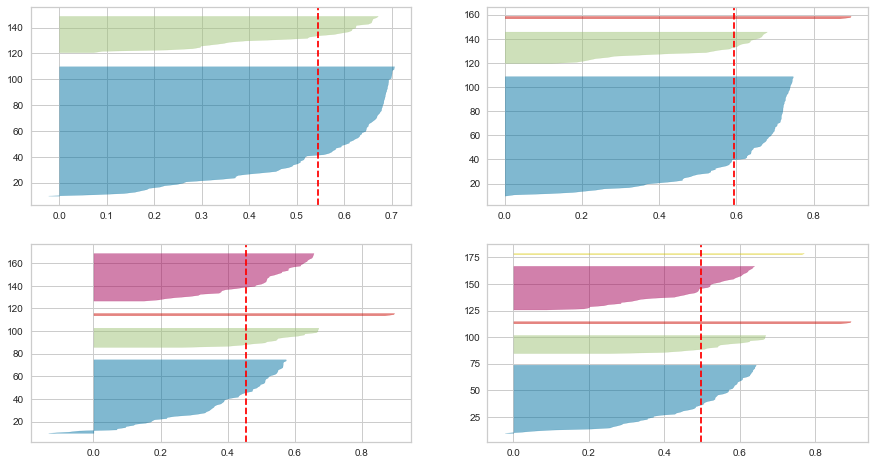

In [61]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data_scaled)

#### Criteria for DBSCAN

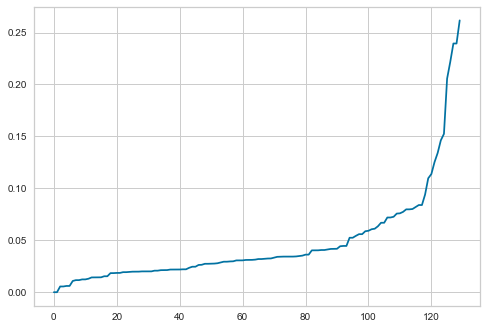

In [62]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(data_scaled)
distances, indices = nbrs.kneighbors(data_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

#### Comparing the cell types

In [64]:
#Hierarchical clustering, K-means clustering with cosine k-means, .....
kmeans_norm = KMeans(n_clusters=3).fit(data_scaled)
#test_sample = data_scaled.shape[1]+1 
dbs_data = DBSCAN(eps=0.12, min_samples=2).fit(data_scaled)
#print("dbs_data.labels_ is:",dbs_data.labels_)

silhouette_score1 = silhouette_score(data_scaled, hierarchical_clustering4[0],metric='euclidean')
silhouette_score2 = silhouette_score(data_scaled, kmeans_norm.labels_, metric='euclidean')
silhouette_score3 = silhouette_score(data_scaled, kmeans_norm.labels_, metric='cosine')
silhouette_score4 = silhouette_score(data_scaled, dbs_data.labels_)

davies_bouldin_score1 = davies_bouldin_score(data_scaled,hierarchical_clustering4[0])
davies_bouldin_score2 = davies_bouldin_score(data_scaled,kmeans_norm.labels_)
davies_bouldin_score3 = davies_bouldin_score(data_scaled,kmeans_norm.labels_)
davies_bouldin_score4 = davies_bouldin_score(data_scaled,dbs_data.labels_)

calinski_harabasz_score1 = calinski_harabasz_score(data_scaled,hierarchical_clustering4[0])
calinski_harabasz_score2 = calinski_harabasz_score(data_scaled,kmeans_norm.labels_)
calinski_harabasz_score3 = calinski_harabasz_score(data_scaled,kmeans_norm.labels_)
calinski_harabasz_score4 = calinski_harabasz_score(data_scaled,dbs_data.labels_)

clustering_results_df = {'Linkage Type': ['Agglomerative Hierarchical clustering(linkage = Average)','Kmeans','Cosine Based Kmeans','DBSCAN'],'Silhouette Score': [silhouette_score1,silhouette_score2,silhouette_score3,silhouette_score4], 'Davies Bouldin Score': [davies_bouldin_score1, davies_bouldin_score2, davies_bouldin_score3, davies_bouldin_score4],'Calinski Harabasz Score': [calinski_harabasz_score1, calinski_harabasz_score2, calinski_harabasz_score3, calinski_harabasz_score4]}  
df_of_results = pd.DataFrame(clustering_results_df)  
print(df_of_results.to_latex())

\begin{tabular}{llrrr}
\toprule
{} &                                       Linkage Type &  Silhouette Score &  Davies Bouldin Score &  Calinski Harabasz Score \\
\midrule
0 &  Agglomerative Hierarchical clustering(linkage ... &          0.672100 &              0.341001 &                25.958783 \\
1 &                                             Kmeans &          0.587536 &              0.499045 &               110.623224 \\
2 &                                Cosine Based Kmeans &          0.555795 &              0.499045 &               110.623224 \\
3 &                                             DBSCAN &          0.513874 &              1.721708 &                26.399044 \\
\bottomrule
\end{tabular}



#### Cluster Rules Table

In [65]:
dct_of_clusters = {"cluster numbers":[1,2,3],"cluster descriptions": ["Vehicles with Butterfly doors","Vehicles with neiter butterfly doors or Gull-wing doors","Vehicles with Gull-wing doors"]}
df_of_results = pd.DataFrame(dct_of_clusters)  
print(df_of_results.to_latex())


\begin{tabular}{lrl}
\toprule
{} &  cluster numbers &                               cluster descriptions \\
\midrule
0 &                1 &                      Vehicles with Butterfly doors \\
1 &                2 &  Vehicles with neiter butterfly doors or Gull-w... \\
2 &                3 &                      Vehicles with Gull-wing doors \\
\bottomrule
\end{tabular}



### <a name="UseCaseDVisualization">5.4 Visualization of clusters for use case D</a> 
[Back to Table of Contents](#table)


In [ ]:
import io
import sys
import folium
from PyQt5 import QtCore, QtGui, QtWidgets
from PyQt5.QtWebEngineWidgets import QWebEngineView 
from PyQt5.QtWebEngineWidgets import QWebEngineSettings as QWebSettings
from folium import IFrame
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import collections, numpy
from matplotlib import animation
from pyclustertend import hopkins
from scipy import stats
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans, DBSCAN
from sklearn import preprocessing
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import folium
class Window(QtWidgets.QMainWindow):
    def __init__(self,dataset):
        self._dataset = dataset
        self._df_including_cordinates = self._dataset.copy()
        self._dataset.drop('Longitude', inplace=True, axis=1)
        self._dataset.drop('Latitude', inplace=True, axis=1)
        self._dataset.drop('Name', inplace=True, axis=1)
        super().__init__()
        self.initWindow()

    def initWindow(self):
        self.setWindowTitle(self.tr("Clustering of electronic vehicles by area served"))
        self.setFixedSize(1500, 800)
        self.comboBox1 = QtWidgets.QComboBox(self)
        self.editField2 = QtWidgets.QLineEdit(self)
        self.editField3 = QtWidgets.QLineEdit(self)
        self.editField4 = QtWidgets.QLineEdit(self)
        self.label5 = QtWidgets.QLabel('red',self)
        self.label5.setHidden(True)
        self.m = folium.Map(location=[51.5074, 0.1278], zoom_start=6)
        self.buttonUI()

    def buttonUI(self):
        submitButton = QtWidgets.QPushButton(self.tr("Submit"))
        submitButton.clicked.connect(self.calculateClusterPressed)
        self.editField2.setFixedSize(120, 50)
        self.editField3.setFixedSize(120, 50)
        self.editField4.setFixedSize(120, 50)
        submitButton.move(20, 260)
        label1 = QtWidgets.QLabel(self)
        label1.setText("Doors:")
        label1.setFixedSize(120, 50)
        self.comboBox1.setFixedSize(120, 50)
        self.comboBox1.addItem("Butterfly Doors")
        self.comboBox1.addItem("Gull Wing Doors")
        label2 = QtWidgets.QLabel(self)
        label2.setText("Wheelbase:")
        label2.setFixedSize(120, 50)
        label3 = QtWidgets.QLabel(self)
        label3.setText("Length:")
        label3.setFixedSize(120, 50)
        label4 = QtWidgets.QLabel(self)
        label4.setText("Width:")
        label4.setFixedSize(120, 50)
        self.label5.setText("Data is an outlier")
        self.label5.setFixedSize(120, 50)
        self.label5.setStyleSheet("background-color: red")
        self.view = QWebEngineView()
        self.view.setContentsMargins(50, 50, 50, 50)
        central_widget = QtWidgets.QWidget()
        self.setCentralWidget(central_widget)
        lay = QtWidgets.QHBoxLayout(central_widget)
        button_container = QtWidgets.QWidget()
        vlay = QtWidgets.QVBoxLayout(button_container)
        vlay.setSpacing(20)
        vlay.addStretch()
        vlay.addWidget(label1)
        vlay.addWidget(self.comboBox1)
        vlay.addWidget(label2)
        vlay.addWidget(self.editField2)
        vlay.addWidget(label3)
        vlay.addWidget(self.editField3)
        vlay.addWidget(label4)
        vlay.addWidget(self.editField4)
        vlay.addWidget(submitButton)
        vlay.addWidget(self.label5)
        vlay.addStretch()
        lay.addWidget(button_container)
        lay.addWidget(self.view, stretch=1)
        data = io.BytesIO()
        self.m.save(data, close_file=False)
        self.view.setHtml(data.getvalue().decode())
    
    def calculateClusterPressed(self):
        door = str(self.comboBox1.currentText())
        butterfly_door = 0.0
        gull_wing_door = 0.0
        self.comboBox1.addItem("Butterfly Doors")
        self.comboBox1.addItem("Gull Wing Doors")
        if door == "Butterfly Doors":
            butterfly_door = 1.0
        else:
            gull_wing_door = 1.0
       
        insertData = {"Wheelbase":float(self.editField2.text()),"Length":float(self.editField3.text()),"Width":float(self.editField4.text()),
                     "Doors_Butterfly_doors":butterfly_door,
                    "Doors_Gull-wing_door": gull_wing_door}
        self._dataset = self._dataset.append(insertData, ignore_index=True)
        scaler = MinMaxScaler()
        data_scaled = pd.DataFrame(scaler.fit_transform(self._dataset), columns=self._dataset.columns)
        cluster = AgglomerativeClustering(n_clusters=3, affinity='cosine', linkage='single') 
        team_models = cluster.fit_predict(data_scaled)
        hierarchical_clustering = pd.DataFrame(team_models)
        dct_of_colour =  {0:"red", 1:"green", 2:"blue"}
        new_item_cluster = team_models[-1]
        if np.count_nonzero(team_models == new_item_cluster) == 1:
            self.label5.setHidden(False)
            
        else:
            self.label5.setHidden(True)
            i = 0
            for index, row in self._df_including_cordinates.iterrows():
                if hierarchical_clustering[0][i] == team_models[-1]:
                    html="""
                    <h1>""" + row['Name'] + """'s data</h1><br>
                    <b> Vehicle Name: </b> """ + row['Name'] + """ <br>
                    <b> Width: </b> """ + str(row['Width']) + """ <br>
                    <b> Doors: </b> """ + door + """ <br>
                    <b> Length: </b> """ + str(row['Length']) + """ <br>
                    <b> Wheelbase: </b> """ + str(row['Wheelbase']) + """ <br>
                    """
                    frame = IFrame(html=html, width=500, height=300)
                    pop_text = folium.Popup(frame, max_width=2650)
                    folium.Marker(
                    [row['Latitude'], row['Longitude']], 
                    popup = pop_text, 
                    icon=folium.Icon(color = dct_of_colour[hierarchical_clustering[0][i]], icon="fa-futbol"),
                    ).add_to(self.m)
                i += 1
                self.m
                data = io.BytesIO()
                self.m.save(data, close_file=False)
                self.view.setHtml(data.getvalue().decode())
        
if __name__ == "__main__":
    electrical_cars_df = pd.read_excel("electronic_vehicles_final.xlsx", sheet_name="Sheet1")
    df1_electrical_cars = edit_data_frame_with_columns(['Name','Latitude','Longitude','Doors', 'Wheelbase', 'Width', 'Length'],electrical_cars_df)
    App = QtCore.QCoreApplication.instance()
    if App is None:
        App = QtWidgets.QApplication(sys.argv)
    window = Window(df1_electrical_cars)
    window.show()
    sys.exit(App.exec())




### <a name="UseCaseDTimeExperiment">5.5 Experimenting Time To Load Cluster items</a> 
[Back to Table of Contents](#table)

In [66]:
import time
num_clusters = 3
affin = 'cosine'
link = 'single'
electrical_cars_df = pd.read_excel("electronic_vehicles_final.xlsx", sheet_name="Sheet1")
electrical_cars_df =  edit_data_frame_with_columns(['Name','Latitude','Longitude','Doors', 'Wheelbase', 'Width', 'Length'],electrical_cars_df)
df1_electric_vehicles = electrical_cars_df.copy()
electrical_cars_df.drop('Longitude', inplace=True, axis=1)
electrical_cars_df.drop('Latitude', inplace=True, axis=1)
electrical_cars_df.drop('Name', inplace=True, axis=1)
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(electrical_cars_df), columns=electrical_cars_df.columns)
cluster = AgglomerativeClustering(n_clusters=num_clusters, affinity=affin, linkage=link) 
team_models = cluster.fit_predict(data_scaled)
hierarchical_clustering = pd.DataFrame(team_models)
data_scaled.insert((data_scaled.shape[1]),'agglomerative',hierarchical_clustering)
dct_of_colour =  {0:"red", 1:"green", 2:"blue"}    
times_dct = {"Cluster ID":[],"Number Of Vehicles":[],"Time To Load":[],}
m = folium.Map(location=[51.5074, 0.1278], zoom_start=6)
cluster_id = 0
for cluster in range(num_clusters):
    i = 0
    t1 = time.time()
    count_per_cluster = 0
    for index, row in df1_electric_vehicles.iterrows():
        if team_models[i] == cluster_id:
            count_per_cluster += 1
            html="""
            <h1>""" + row['Name'] + """'s data</h1><br>
            <b> Vehicle Name: </b> """ + row['Name'] + """ <br>
            <b> Width: </b> """ + str(row['Width']) + """ <br>
            <b> Length: </b> """ + str(row['Length']) + """ <br>
            <b> Wheelbase: </b> """ + str(row['Wheelbase']) + """ <br>
            """
            frame = IFrame(html=html, width=500, height=300)
            pop_text = folium.Popup(frame, max_width=2650)
            folium.Marker(
            [row['Latitude'], row['Longitude']], 
            popup = pop_text, 
            icon=folium.Icon(color = dct_of_colour[hierarchical_clustering[0][i]],),
            ).add_to(m)
        i += 1
    t2 = time.time()
    times_dct["Time To Load"].append(t2 - t1)
    cluster_id+=1
    times_dct["Number Of Vehicles"].append(count_per_cluster)
    times_dct["Cluster ID"].append(cluster_id)
df = pd.DataFrame(times_dct)
print(df.to_latex())
data = io.BytesIO()
m.save(data, close_file=False)
m


\begin{tabular}{lrrr}
\toprule
{} &  Cluster ID &  Number Of Vehicles &  Time To Load \\
\midrule
0 &           1 &                 125 &      0.087021 \\
1 &           2 &                   3 &      0.010354 \\
2 &           3 &                   2 &      0.009393 \\
\bottomrule
\end{tabular}



## <a name="UseCaseE">6. Use Case E: Clustering of Electric Vehicle Data for Automobile Manufacturers to find  vehicles manufacturered in the same country </a>

### <a name="UseCaseEFeatureSelection">6.1. FeatureSelection</a> 
[Back to Table of Contents](#table)

In [67]:
electrical_cars_df = pd.read_excel("electronic_vehicles_final.xlsx", sheet_name="Sheet1")
print(find_best_features( [ 'Location Country', 'Production Start Year', 'Production End Year'],3,electrical_cars_df,True))

(['Location Country', 'Production End Year', 'Production Start Year'], 'single', 10, 0.800403825538001)


In [68]:
electrical_cars_df = pd.read_excel("electronic_vehicles_final.xlsx", sheet_name="Sheet1")
electrical_cars_df = edit_data_frame_with_columns([ 'Location Country', 'Production Start Year', 'Production End Year'],electrical_cars_df)
df1_electric_vehicles = electrical_cars_df
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(df1_electric_vehicles), columns=df1_electric_vehicles.columns)
data_scaled.head()

,Production End Year,Production Start Year,LocationCountry_China,LocationCountry_South Korea,LocationCountry_Germany,LocationCountry_Japan,LocationCountry_United_States,LocationCountry_Italy,LocationCountry_France
0,0.955882,0.911765,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.691176,0.632353,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.941176,0.941176,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.823529,0.823529,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.602941,0.602941,0.0,0.0,0.0,0.0,0.0,0.0,1.0


##### Identifying and removing outliers

In [69]:
data_scaled[(np.abs(stats.zscore(data_scaled)) < 3).all(axis=1)]

,Production End Year,Production Start Year,LocationCountry_China,LocationCountry_South Korea,LocationCountry_Germany,LocationCountry_Japan,LocationCountry_United_States,LocationCountry_Italy,LocationCountry_France
0,0.955882,0.911765,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.691176,0.632353,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.941176,0.941176,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.823529,0.823529,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.602941,0.602941,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
94,0.926471,0.808824,0.0,0.0,0.0,1.0,0.0,0.0,0.0
95,0.794118,0.794118,0.0,0.0,0.0,0.0,0.0,0.0,1.0
96,0.823529,0.823529,0.0,0.0,0.0,0.0,0.0,0.0,1.0
97,0.970588,0.970588,1.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Testing to determine the clustering tendency of a data set.

In [70]:
hopkins(df1_electric_vehicles,len(df1_electric_vehicles))

0.13280222693569615

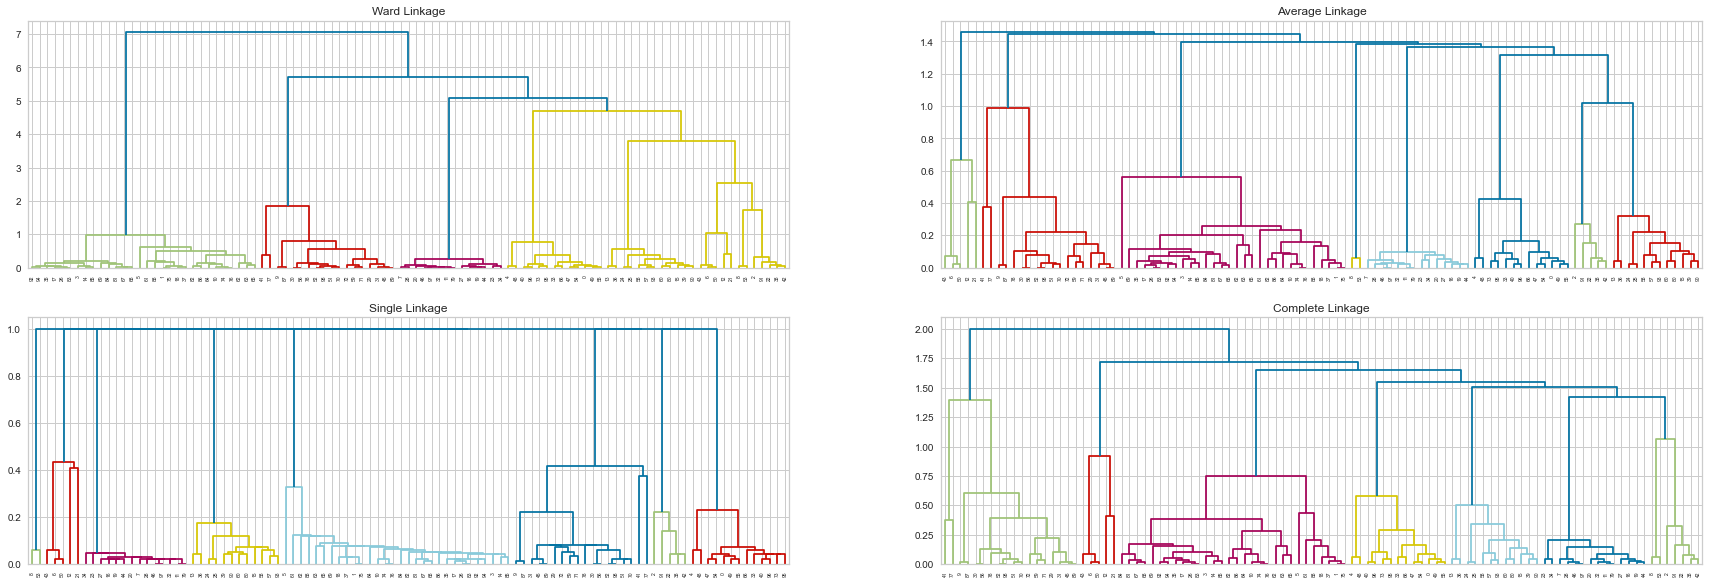

In [71]:
import scipy.cluster.hierarchy as shc
rows = 2
columns = 2
figure = plt.figure(figsize=(30, 10))  
figure.add_subplot(rows, columns, 1)
plt.title("Ward Linkage")  
shc.dendrogram(shc.linkage(data_scaled, method='ward'))
figure.add_subplot(rows, columns, 2)
plt.title("Average Linkage")  
shc.dendrogram(shc.linkage(data_scaled, method='average'))
figure.add_subplot(rows, columns, 3)
plt.title("Single Linkage")  
shc.dendrogram(shc.linkage(data_scaled, method='single'))
figure.add_subplot(rows, columns, 4)
plt.title("Complete Linkage")  
shc.dendrogram(shc.linkage(data_scaled, method='complete'))
figure.savefig('DendogramsElecVehE1.png', dpi=300, bbox_inches='tight')



## Applying Hierarchical clustering for the clusters

In [72]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='single') 
team_models = cluster.fit_predict(data_scaled)


Evaluating Quality of cluster with Shilhoute Score


### <a name="UseCaseEClusterUnderstanding">6.2 Feature Selection and Understanding Clusters</a> 
[Back to Table of Contents](#table)

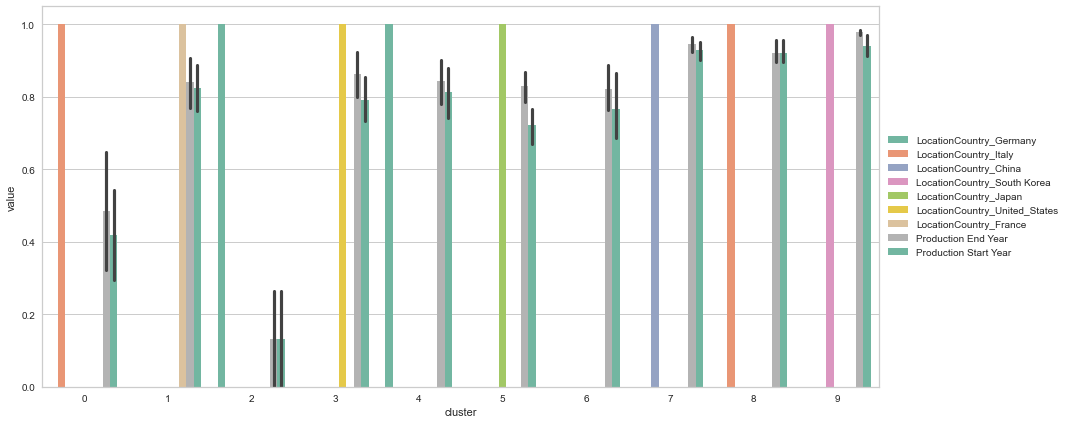

In [73]:
# Grouping rows of data based on Hierarchical cluster
electrical_cars_df = pd.read_excel("electronic_vehicles_final.xlsx", sheet_name="Sheet1")
cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='single')  
team_models = cluster.fit_predict(data_scaled)
minMaxscaler = MinMaxScaler()
scaledDataFrame = pd.DataFrame(minMaxscaler.fit_transform(df1_electric_vehicles))
scaledDataFrame.columns = df1_electric_vehicles.columns
scaledDataFrame['cluster'] = cluster.labels_
meansDataFrame = scaledDataFrame.groupby('cluster').mean().reset_index()
variablesDeviations = pd.DataFrame(columns=['Vars', 'Deviation'])
i = 0
while i < len(meansDataFrame.columns[1:]):
    variablesDeviations.loc[len(variablesDeviations), :] = [meansDataFrame.columns[1:][i], np.std(meansDataFrame[meansDataFrame.columns[1:][i]])]
    i+=1
includedColumns = list(variablesDeviations.sort_values('Deviation', ascending=False).head(20).Vars.values) + ['cluster']
finalData = scaledDataFrame[includedColumns].melt(id_vars='cluster')
figure, axix = plt.subplots(figsize=(15, 7))
sns.barplot(x='cluster', y='value', hue='variable', data=finalData, palette='Set2')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("electricalVehiclesEClusUnd.jpg", dpi=300)

##### Visualizing the clusters


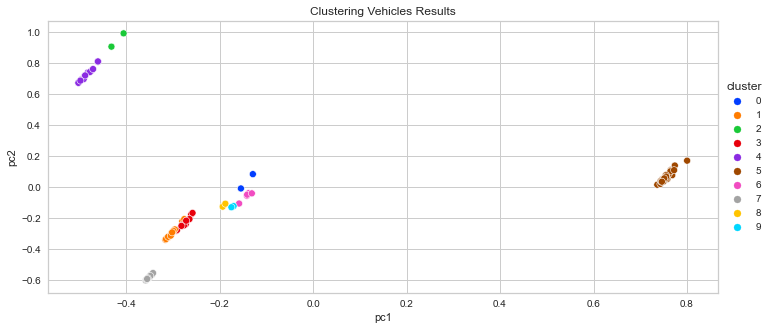

In [74]:
from sklearn.decomposition import PCA
fig, (sub1) = plt.subplots(1, figsize=(12, 5))
pca_vehicle_data = PCA(n_components=2)
principalComponents_vehicles = pca_vehicle_data.fit_transform(data_scaled)
sns.scatterplot(x=principalComponents_vehicles[:,0], y=principalComponents_vehicles[:,1], hue=team_models, palette='bright',ax=sub1);
sub1.set(xlabel="pc1", ylabel="pc2", title="Clustering Vehicles Results")
sub1.legend(title='cluster',loc='center left', bbox_to_anchor=(1, 0.5))
fig.savefig('PCAElecVehE1.png', dpi=300, bbox_inches='tight')

### <a name="UseCaseESilhoutteResults">6.3 Analysing Cluster Results with Different linkage criteria and number of clusters</a> 
[Back to Table of Contents](#table)

In [75]:
sil_scores = []
dav_scores = []
calin_scores = []
n_clusters = []
electrical_cars_df = pd.read_excel("electronic_vehicles_final.xlsx", sheet_name="Sheet1")
for i in range(2,17):
    cluster1 = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='single')  
    team_models1 = cluster1.fit_predict(data_scaled)
    hierarchical_clustering = pd.DataFrame(team_models1)
    dav_scores.append(davies_bouldin_score(data_scaled,hierarchical_clustering[0]))
    sil_scores.append(silhouette_score(data_scaled,hierarchical_clustering[0],metric='euclidean'))
    calin_scores.append(calinski_harabasz_score(data_scaled,hierarchical_clustering[0]))
    n_clusters.append(i)
hierarchicial_clustering_results_df = {'Num Clusters': n_clusters,'Silhouette Score': sil_scores, 'Davies Bouldin Score': dav_scores,'Calinski Harabasz Score': calin_scores}  
df_measures = pd.DataFrame(hierarchicial_clustering_results_df)  
print(df_measures.to_latex())


\begin{tabular}{lrrrr}
\toprule
{} &  Num Clusters &  Silhouette Score &  Davies Bouldin Score &  Calinski Harabasz Score \\
\midrule
0  &             2 &          0.178906 &              0.830005 &                 2.950297 \\
1  &             3 &          0.217208 &              0.995267 &                 5.335222 \\
2  &             4 &          0.358454 &              0.906342 &                12.818143 \\
3  &             5 &          0.472642 &              0.836552 &                19.411267 \\
4  &             6 &          0.664566 &              0.766535 &                50.030884 \\
5  &             7 &          0.774817 &              0.501473 &               134.032245 \\
6  &             8 &          0.782248 &              0.342375 &               209.674108 \\
7  &             9 &          0.787417 &              0.306312 &               205.550566 \\
8  &            10 &          0.800404 &              0.272669 &               311.458071 \\
9  &            11 &         

In [76]:
cluster1 = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')  
team_models1 = cluster1.fit_predict(data_scaled)
hierarchical_clustering1 = pd.DataFrame(team_models1)
davies_bouldin_score1 = davies_bouldin_score(data_scaled,hierarchical_clustering1[0])
silhouette_score1 = silhouette_score(data_scaled,hierarchical_clustering1[0],metric='euclidean')
calinski_harabasz_score1 = calinski_harabasz_score(data_scaled,hierarchical_clustering1[0])

cluster2 = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='average')  
team_models2 = cluster2.fit_predict(data_scaled)
hierarchical_clustering2 = pd.DataFrame(team_models2)
davies_bouldin_score2 = davies_bouldin_score(data_scaled,hierarchical_clustering2[0])
silhouette_score2 = silhouette_score(data_scaled,hierarchical_clustering2[0],metric='euclidean')
calinski_harabasz_score2 = calinski_harabasz_score(data_scaled,hierarchical_clustering2[0])

cluster3 = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='complete')  
team_models3 = cluster3.fit_predict(data_scaled)
hierarchical_clustering3 = pd.DataFrame(team_models3)
davies_bouldin_score3 = davies_bouldin_score(data_scaled,hierarchical_clustering3[0])
silhouette_score3 = silhouette_score(data_scaled,hierarchical_clustering3[0],metric='euclidean')
calinski_harabasz_score3 = calinski_harabasz_score(data_scaled,hierarchical_clustering3[0])

cluster4 = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='single') 
team_models4 = cluster4.fit_predict(data_scaled)
hierarchical_clustering4 = pd.DataFrame(team_models4)
davies_bouldin_score4 = davies_bouldin_score(data_scaled,hierarchical_clustering4[0])
silhouette_score4 = silhouette_score(data_scaled,hierarchical_clustering4[0],metric='euclidean')
calinski_harabasz_score4 = calinski_harabasz_score(data_scaled,hierarchical_clustering4[0])

hierarchicial_clustering_results_df = {'Linkage Type': ['Ward','Average','Complete','Single'],'Silhouette Score': [silhouette_score1,silhouette_score2,silhouette_score3,silhouette_score4], 'Davies Bouldin Score': [davies_bouldin_score1, davies_bouldin_score2, davies_bouldin_score3, davies_bouldin_score4],'Calinski Harabasz Score': [calinski_harabasz_score1, calinski_harabasz_score2, calinski_harabasz_score3, calinski_harabasz_score4]}  
df_measures = pd.DataFrame(hierarchicial_clustering_results_df)  
print(df_measures.to_latex())


\begin{tabular}{llrrr}
\toprule
{} & Linkage Type &  Silhouette Score &  Davies Bouldin Score &  Calinski Harabasz Score \\
\midrule
0 &         Ward &          0.800404 &              0.272669 &               311.458071 \\
1 &      Average &          0.800404 &              0.272669 &               311.458071 \\
2 &     Complete &          0.800404 &              0.272669 &               311.458071 \\
3 &       Single &          0.800404 &              0.272669 &               311.458071 \\
\bottomrule
\end{tabular}



#### Determining the number of clusters for K-means Algorithm using Silhouette Visualizer

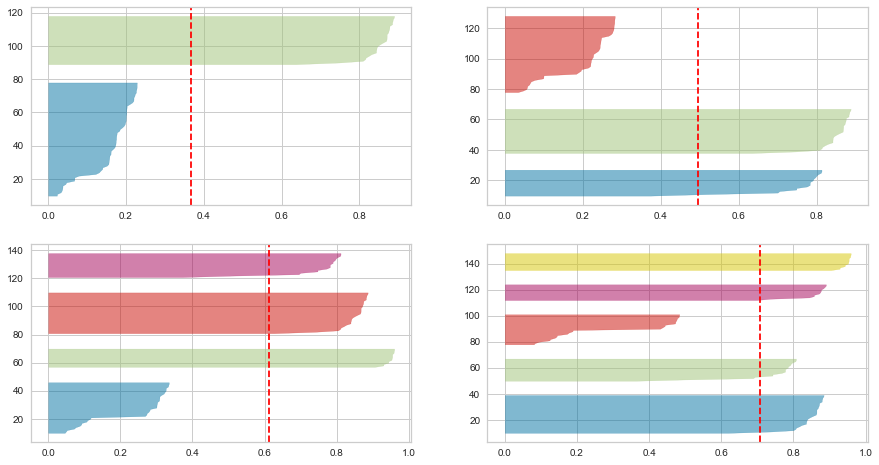

In [77]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data_scaled)

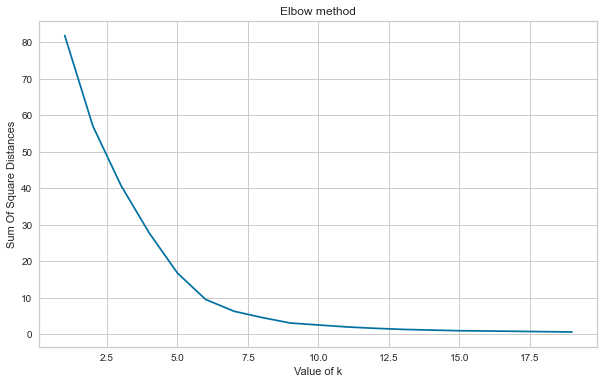

In [78]:
#Using Elbow Method when num clusters > 5
sum_of_squared_distances = []
cluster_range = range(1,20)
for cluster_num in cluster_range:
    kModel = KMeans(n_clusters=cluster_num)
    kModel.fit(data_scaled)
    sum_of_squared_distances.append(kModel.inertia_)
plt.figure(figsize=(10,6))
plt.plot(cluster_range, sum_of_squared_distances, 'bx-')
plt.xlabel('Value of k')
plt.ylabel('Sum Of Square Distances')
plt.title('Elbow method')
plt.show()

#### Criteria for DBSCAN

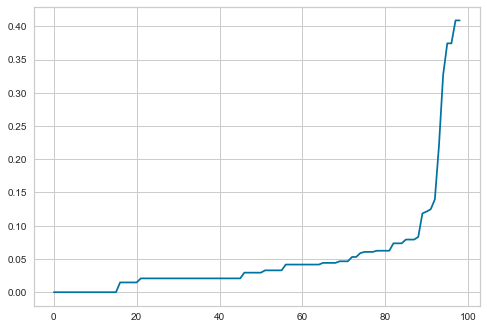

In [79]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data_scaled)
distances, indices = nbrs.kneighbors(data_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

#### Comparing the cell types

In [80]:
#Hierarchical clustering, K-means clustering with cosine k-means, .....
kmeans_norm = KMeans(n_clusters=9).fit(data_scaled)
dbs_data = DBSCAN(eps=0.41, min_samples=2).fit(data_scaled)
silhouette_score1 = silhouette_score(data_scaled, hierarchical_clustering4[0],metric='euclidean')
silhouette_score2 = silhouette_score(data_scaled, kmeans_norm.labels_, metric='euclidean')
silhouette_score3 = silhouette_score(data_scaled, kmeans_norm.labels_, metric='cosine')
silhouette_score4 = silhouette_score(data_scaled, dbs_data.labels_)

davies_bouldin_score1 = davies_bouldin_score(data_scaled,hierarchical_clustering4[0])
davies_bouldin_score2 = davies_bouldin_score(data_scaled,kmeans_norm.labels_)
davies_bouldin_score3 = davies_bouldin_score(data_scaled,kmeans_norm.labels_)
davies_bouldin_score4 = davies_bouldin_score(data_scaled,dbs_data.labels_)

calinski_harabasz_score1 = calinski_harabasz_score(data_scaled,hierarchical_clustering4[0])
calinski_harabasz_score2 = calinski_harabasz_score(data_scaled,kmeans_norm.labels_)
calinski_harabasz_score3 = calinski_harabasz_score(data_scaled,kmeans_norm.labels_)
calinski_harabasz_score4 = calinski_harabasz_score(data_scaled,dbs_data.labels_)

clustering_results_df = {'Linkage Type': ['Agglomerative Hierarchical clustering(linkage = Average)','Kmeans','Cosine Based Kmeans','DBSCAN'],'Silhouette Score': [silhouette_score1,silhouette_score2,silhouette_score3,silhouette_score4], 'Davies Bouldin Score': [davies_bouldin_score1, davies_bouldin_score2, davies_bouldin_score3, davies_bouldin_score4],'Calinski Harabasz Score': [calinski_harabasz_score1, calinski_harabasz_score2, calinski_harabasz_score3, calinski_harabasz_score4]}  
df_of_results = pd.DataFrame(clustering_results_df)  
print(df_of_results.to_latex())

\begin{tabular}{llrrr}
\toprule
{} &                                       Linkage Type &  Silhouette Score &  Davies Bouldin Score &  Calinski Harabasz Score \\
\midrule
0 &  Agglomerative Hierarchical clustering(linkage ... &          0.800404 &              0.272669 &               311.458071 \\
1 &                                             Kmeans &          0.795235 &              0.335014 &               290.653850 \\
2 &                                Cosine Based Kmeans &          0.958425 &              0.335014 &               290.653850 \\
3 &                                             DBSCAN &          0.800404 &              0.272669 &               311.458071 \\
\bottomrule
\end{tabular}



#### Cluster Rules Table

In [81]:
dct_of_clusters = {"cluster numbers":[1,2,3,4,5,6,7,8,9,10],"cluster descriptions":["Vehicles that were produced in Italy",
"Vehicles produced in France  ",
"Vehicles produced in Germany",
"Vehicles produced in United States",
"Vehicles produced in Germany that are new",
"Vehicles produced in Japan",
"Vehicles not produced in any of the listed places.",
"Vehicles produced in China",
"Vehicles produced in Italy that are older",
"Vehicles produced in South Korea"]}
df_of_results = pd.DataFrame(dct_of_clusters)  
print(df_of_results.to_latex())

\begin{tabular}{lrl}
\toprule
{} &  cluster numbers &                               cluster descriptions \\
\midrule
0 &                1 &               Vehicles that were produced in Italy \\
1 &                2 &                      Vehicles produced in France   \\
2 &                3 &                       Vehicles produced in Germany \\
3 &                4 &                 Vehicles produced in United States \\
4 &                5 &          Vehicles produced in Germany that are new \\
5 &                6 &                         Vehicles produced in Japan \\
6 &                7 &  Vehicles not produced in any of the listed pla... \\
7 &                8 &                         Vehicles produced in China \\
8 &                9 &          Vehicles produced in Italy that are older \\
9 &               10 &                   Vehicles produced in South Korea \\
\bottomrule
\end{tabular}



### <a name="UseCaseEVisualization">6.4 Visualization of clusters for use case E</a> 
[Back to Table of Contents](#table)



In [ ]:
import io
import sys
import folium
from PyQt5 import QtCore, QtGui, QtWidgets
from PyQt5.QtWebEngineWidgets import QWebEngineView 
from PyQt5.QtWebEngineWidgets import QWebEngineSettings as QWebSettings
from folium import IFrame
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import collections, numpy
from matplotlib import animation
from pyclustertend import hopkins
from scipy import stats
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans, DBSCAN
from sklearn import preprocessing
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import folium

class Window(QtWidgets.QMainWindow):
    def __init__(self,dataset):
        self._dataset = dataset
        self._df_including_cordinates = self._dataset.copy()
        self._dataset.drop('Longitude', inplace=True, axis=1)
        self._dataset.drop('Latitude', inplace=True, axis=1)
        self._dataset.drop('Name', inplace=True, axis=1)
        super().__init__()
        self.initWindow()

    def initWindow(self):
        self.setWindowTitle(self.tr("Clustering of electronic vehicles by area served"))
        self.setFixedSize(1500, 800)
        self.comboBox1 = QtWidgets.QComboBox(self)
        self.editField2 = QtWidgets.QLineEdit(self)
        self.editField3 = QtWidgets.QLineEdit(self)
        self.label5 = QtWidgets.QLabel('red',self)
        self.label5.setHidden(True)
        self.m = folium.Map(location=[51.5074, 0.1278], zoom_start=6)
        self.buttonUI()

    def buttonUI(self):
        submitButton = QtWidgets.QPushButton(self.tr("Submit"))
        submitButton.clicked.connect(self.calculateClusterPressed)
        self.editField2.setFixedSize(120, 50)
        self.editField3.setFixedSize(120, 50)
        submitButton.move(20, 260)
        label1 = QtWidgets.QLabel(self)
        label1.setText("Country Vehicle Created:")
        label1.setFixedSize(120, 50)
        self.comboBox1.setFixedSize(120, 50)
        self.comboBox1.addItem("China")
        self.comboBox1.addItem("South Korea")
        self.comboBox1.addItem("Germany")
        self.comboBox1.addItem("Japan")
        self.comboBox1.addItem("United States")
        self.comboBox1.addItem("Italy")
        self.comboBox1.addItem("France")
        label2 = QtWidgets.QLabel(self)
        label2.setText("Production Start Year:")
        label2.setFixedSize(120, 50)
        label3 = QtWidgets.QLabel(self)
        label3.setText("Production End Year:")
        label3.setFixedSize(120, 50)
        self.label5.setText("Data is an outlier")
        self.label5.setFixedSize(120, 50)
        self.label5.setStyleSheet("background-color: red")
        self.view = QWebEngineView()
        self.view.setContentsMargins(50, 50, 50, 50)
        central_widget = QtWidgets.QWidget()
        self.setCentralWidget(central_widget)
        lay = QtWidgets.QHBoxLayout(central_widget)
        button_container = QtWidgets.QWidget()
        vlay = QtWidgets.QVBoxLayout(button_container)
        vlay.setSpacing(20)
        vlay.addStretch()
        vlay.addWidget(label1)
        vlay.addWidget(self.comboBox1)
        vlay.addWidget(label2)
        vlay.addWidget(self.editField2)
        vlay.addWidget(label3)
        vlay.addWidget(self.editField3)
        vlay.addWidget(submitButton)
        vlay.addWidget(self.label5)
        vlay.addStretch()
        lay.addWidget(button_container)
        lay.addWidget(self.view, stretch=1)
        data = io.BytesIO()
        self.m.save(data, close_file=False)
        self.view.setHtml(data.getvalue().decode())
    
    def calculateClusterPressed(self):
        country_of_production = str(self.comboBox1.currentText())
        self.comboBox1.setFixedSize(120, 50)
        self.comboBox1.addItem("China")
        self.comboBox1.addItem("South Korea")
        self.comboBox1.addItem("Germany")
        self.comboBox1.addItem("Japan")
        self.comboBox1.addItem("United States")
        self.comboBox1.addItem("Italy")
        self.comboBox1.addItem("France")
        china = 0.0
        south_korea = 0.0
        germany = 0.0
        japan = 0.0
        usa = 0.0
        italy = 0.0
        france = 0.0
        self.comboBox1.addItem("Butterfly Doors")
        self.comboBox1.addItem("Gull Wing Doors")
        if country_of_production == "China":
            china = 1.0
            
        elif country_of_production == "South Korea":
            south_korea = 1.0
            
        elif country_of_production == "Germany":
            germany = 1.0
            
        elif country_of_production == "Japan":
            japan = 1.0
            
        elif country_of_production == "United States":
            usa = 1.0
            
        elif country_of_production == "Italy":
            italy = 1.0
        
        else:
            france = 1.0
       
        insertData = {"Production Start Year":float(self.editField2.text()),"Production End Year":float(self.editField3.text()),
                     "LocationCountry_China":china,
                    "LocationCountry_South Korea":south_korea,
                    "LocationCountry_Germany":germany,
                    "LocationCountry_Japan":japan,
                    "LocationCountry_United_States":usa,
                    "LocationCountry_Italy":italy,
                    "LocationCountry_France":france}

        self._dataset = self._dataset.append(insertData, ignore_index=True)
        scaler = MinMaxScaler()
        data_scaled = pd.DataFrame(scaler.fit_transform(self._dataset), columns=self._dataset.columns)
        cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='single') 
        team_models = cluster.fit_predict(data_scaled)
        hierarchical_clustering = pd.DataFrame(team_models)
        dct_of_colour =  {0:"red", 1:"green", 2:"blue",3:"grey", 4:"black", 5:"orange",6:"brown", 7:"purple", 8:"green",9:"yellow"}
        new_item_cluster = team_models[-1]
        if np.count_nonzero(team_models == new_item_cluster) == 1:
            self.label5.setHidden(False)            
        else:
            self.label5.setHidden(True)
            i = 0
            for index, row in self._df_including_cordinates.iterrows():
                if hierarchical_clustering[0][i] == team_models[-1]:
                    html="""
                    <h1>""" + row['Name'] + """'s data</h1><br>
                    
                    <b> Vehicle Name: </b> """ + row['Name'] + """ <br>
                    <b> Vehicle Produce In: </b> """ + country_of_production + """ <br>
                    <b> Production Start Year: </b> """ + str(row['Production Start Year']) + """ <br>
                    <b> Production End Year: </b> """ +str(row['Production End Year']) + """ <br>
                    
                    """
                    frame = IFrame(html=html, width=500, height=300)
                    pop_text = folium.Popup(frame, max_width=2650)
                    folium.Marker(
                    [row['Latitude'], row['Longitude']], 
                    popup = pop_text, 
                    icon=folium.Icon(color = dct_of_colour[hierarchical_clustering[0][i]], icon="fa-futbol"),
                    ).add_to(self.m)
                i += 1
                self.m
                data = io.BytesIO()
                self.m.save(data, close_file=False)
                self.view.setHtml(data.getvalue().decode())
        
        
if __name__ == "__main__":
    electrical_cars_df = pd.read_excel("electronic_vehicles_final.xlsx", sheet_name="Sheet1")
    df1_electrical_cars = edit_data_frame_with_columns(['Name','Latitude','Longitude','Location Country', 'Production Start Year', 'Production End Year'],electrical_cars_df)
    App = QtCore.QCoreApplication.instance()
    if App is None:
        App = QtWidgets.QApplication(sys.argv)
    window = Window(df1_electrical_cars)
    window.show()
    sys.exit(App.exec())




### <a name="UseCaseETimeExperiment">6.5 Experimenting Time To Load Cluster items</a> 
[Back to Table of Contents](#table)

In [82]:
import time
num_clusters = 10
affin = 'euclidean'
link = 'single'
electrical_cars_df = pd.read_excel("electronic_vehicles_final.xlsx", sheet_name="Sheet1")
electrical_cars_df = edit_data_frame_with_columns(['Name','Latitude','Longitude','Location Country', 'Production Start Year', 'Production End Year'],electrical_cars_df)
df1_electric_vehicles = electrical_cars_df.copy()
electrical_cars_df.drop('Longitude', inplace=True, axis=1)
electrical_cars_df.drop('Latitude', inplace=True, axis=1)
electrical_cars_df.drop('Name', inplace=True, axis=1)
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(electrical_cars_df), columns=electrical_cars_df.columns)
cluster = AgglomerativeClustering(n_clusters=num_clusters, affinity=affin, linkage=link) 
team_models = cluster.fit_predict(data_scaled)
hierarchical_clustering = pd.DataFrame(team_models)
data_scaled.insert((data_scaled.shape[1]),'agglomerative',hierarchical_clustering)
dct_of_colour =  {0:"red", 1:"green", 2:"blue",3:"grey", 4:"black", 5:"orange",6:"brown", 7:"purple", 8:"green",9:"yellow"}    
times_dct = {"Cluster ID":[],"Number Of Vehicles":[],"Time To Load":[],}
m = folium.Map(location=[51.5074, 0.1278], zoom_start=6)
cluster_id = 0
for cluster in range(num_clusters):
    i = 0
    t1 = time.time()
    count_per_cluster = 0
    for index, row in df1_electric_vehicles.iterrows():
        if team_models[i] == cluster_id:
            count_per_cluster += 1
            html="""
            <h1>""" + row['Name'] + """'s data</h1><br>
            <p>
             This electronic vehicles is in the following cluster 
            </p>
            <b> Vehicle Name: </b> """ + row['Name'] + """ <br>
            <b> Production Start Year: </b> """ + str(row['Production Start Year']) + """ <br>
            <b> Production End Year: </b> """ +str(row['Production End Year']) + """ <br>
            """
            frame = IFrame(html=html, width=500, height=300)
            pop_text = folium.Popup(frame, max_width=2650)
            folium.Marker(
            [row['Latitude'], row['Longitude']], 
            popup = pop_text, 
            icon=folium.Icon(color = dct_of_colour[hierarchical_clustering[0][i]],),
            ).add_to(m)
        i += 1
    t2 = time.time()
    times_dct["Time To Load"].append(t2 - t1)
    cluster_id+=1
    times_dct["Number Of Vehicles"].append(count_per_cluster)
    times_dct["Cluster ID"].append(cluster_id)
df = pd.DataFrame(times_dct)
print(df.to_latex())
data = io.BytesIO()
m.save(data, close_file=False)
m

<ipython-input-82-847135a86fa0>:42: UserWarning: color argument of Icon should be one of: {'darkgreen', 'white', 'lightgray', 'orange', 'darkred', 'pink', 'beige', 'purple', 'darkblue', 'lightblue', 'blue', 'lightred', 'darkpurple', 'red', 'cadetblue', 'lightgreen', 'gray', 'black', 'green'}.
  icon=folium.Icon(color = dct_of_colour[hierarchical_clustering[0][i]],),


\begin{tabular}{lrrr}
\toprule
{} &  Cluster ID &  Number Of Vehicles &  Time To Load \\
\midrule
0 &           1 &                   2 &      0.007776 \\
1 &           2 &                  13 &      0.014899 \\
2 &           3 &                   2 &      0.007695 \\
3 &           4 &                  12 &      0.015184 \\
4 &           5 &                  16 &      0.017167 \\
5 &           6 &                  30 &      0.026201 \\
6 &           7 &                   5 &      0.009882 \\
7 &           8 &                  14 &      0.014711 \\
8 &           9 &                   3 &      0.008004 \\
9 &          10 &                   2 &      0.007893 \\
\bottomrule
\end{tabular}

